# Data preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("./按序号_merged.xlsx", index_col=0)

In [3]:
# ignore_indices = ["提交答卷时间", "所用时间", "来源", "来源详情", "来自IP", "总分"]
df = df[df.columns[6:]]

In [4]:
df.columns

Index(['您的性别:', '您的年龄:', '您的学历水平:', '您的专业/职业类别:',
       '您是否认同或信仰某种宗教/传统文化?（可多选）(A. 佛教)', '5(B. 道教)', '5(C. 基督教)', '5(D. 伊斯兰教)',
       '5(E.其他宗教)', '5(F. 无宗教信仰，但对某一种传统文化有兴趣)', '5(G.无信仰的宗教/传统文化)',
       '您平时是否会购买带有“寓意”或“玄学”意味的商品（如招财、祈福、转运、护身符类）?',
       '如有玄学产品的购买经历，您消费过的玄学产品类别有哪些?（可多选）(A. 水晶/宝石/手链)', '7(B. 护身符/平安符)',
       '7(C. 塔罗牌/算命服务（线上或线下）)', '7(D. 星座/生肖相关周边（如饰品、文创）)', '7(E. 其他（请填写)',
       '如有玄学产品的购买经历，什么因素影响了你最终做出购买决定?（可多选）(A. 亲朋好友的推荐或影响)',
       '8(B. 网络流行趋势/社交媒体热度)', '8(C. 个人情感需求（如寻求安慰、缓解焦虑）)', '8(D. 好奇心或尝鲜心理)',
       '8(E. 产品设计感/审美吸引力)', '8(F. 价格因素（觉得划算/性价比高）)', '8(G. 品牌影响力或宣传效果)',
       '8(H. 其他（请填写）)', '您在购买玄学相关产品时，单件商品的平均消费金额大致为：',
       '我相信某些玄学物品能给自己带来好运或心理安慰。', '我购买玄学相关产品时，更多是出于好奇/尝鲜。',
       '我会因为玄学符号带来的“情绪共鸣”而更倾向购买某产品。', '我认为在消费中加入玄学元素是一种文化趣味，而非迷信。',
       '如果品牌将“祈福、转运”等符号与产品结合，我会更容易被吸引。', '我会因为品牌使用玄学元素而觉得更有创意/更亲近。',
       '我会因为品牌使用玄学元素而觉得反感或排斥。',
       '四、对品牌玄学营销的接受度以下品牌案例中，您是否觉得有吸引力?（可多选）(A. 星巴克推出“幸运豆圣杯”周边 (订购价格78元新春福袋会员星礼包即送周边“好运福袋”）)',
       '17(B. 

In [5]:
# single-choice cause
causes = ["您的性别:", "您的年龄:", "您的学历水平:", "您的专业/职业类别:"]
# multi-choice cause
belief = [
    "您是否认同或信仰某种宗教/传统文化?（可多选）(A. 佛教)",
    "5(B. 道教)",
    "5(C. 基督教)",
    "5(D. 伊斯兰教)",
    "5(E.其他宗教)",
    "5(F. 无宗教信仰，但对某一种传统文化有兴趣)",
]

In [6]:
effect_offset = 11
df_effect_columns = df.columns[effect_offset:-1]  # last one is subjective, ignore it

In [7]:
df_effect_columns

Index(['您平时是否会购买带有“寓意”或“玄学”意味的商品（如招财、祈福、转运、护身符类）?',
       '如有玄学产品的购买经历，您消费过的玄学产品类别有哪些?（可多选）(A. 水晶/宝石/手链)', '7(B. 护身符/平安符)',
       '7(C. 塔罗牌/算命服务（线上或线下）)', '7(D. 星座/生肖相关周边（如饰品、文创）)', '7(E. 其他（请填写)',
       '如有玄学产品的购买经历，什么因素影响了你最终做出购买决定?（可多选）(A. 亲朋好友的推荐或影响)',
       '8(B. 网络流行趋势/社交媒体热度)', '8(C. 个人情感需求（如寻求安慰、缓解焦虑）)', '8(D. 好奇心或尝鲜心理)',
       '8(E. 产品设计感/审美吸引力)', '8(F. 价格因素（觉得划算/性价比高）)', '8(G. 品牌影响力或宣传效果)',
       '8(H. 其他（请填写）)', '您在购买玄学相关产品时，单件商品的平均消费金额大致为：',
       '我相信某些玄学物品能给自己带来好运或心理安慰。', '我购买玄学相关产品时，更多是出于好奇/尝鲜。',
       '我会因为玄学符号带来的“情绪共鸣”而更倾向购买某产品。', '我认为在消费中加入玄学元素是一种文化趣味，而非迷信。',
       '如果品牌将“祈福、转运”等符号与产品结合，我会更容易被吸引。', '我会因为品牌使用玄学元素而觉得更有创意/更亲近。',
       '我会因为品牌使用玄学元素而觉得反感或排斥。',
       '四、对品牌玄学营销的接受度以下品牌案例中，您是否觉得有吸引力?（可多选）(A. 星巴克推出“幸运豆圣杯”周边 (订购价格78元新春福袋会员星礼包即送周边“好运福袋”）)',
       '17(B. Mstand推出木鱼周边（购买新品可获得该周边）)',
       '17(C. 日清“算命泡面”（炒面倒水时，偶尔会从排水孔漏出的面条，成了占卜的“签文”。漏水孔共21个，孔的一侧标注了“大吉”“吉”“中吉”“小吉”“凶”等文字。）)',
       '17(D. 静安寺联名祈福咖啡 （咖啡杯套里内藏签文）)', '17(E. 其他见过的类似案例（请填写____）)',
       '

In [8]:
def begin_with_number(s: str):
    for i in range(0, 22):
        if s.startswith(str(i)):
            return True
    return False


is_multiple = lambda s: "多选" in s


def normalize_name(s: str):
    a = s.find("(")
    b = s.find(")")
    return s[a + 1 : b]

In [92]:
single_choice_effects: list[int] = []
multi_choice_effects: dict[str, list[int]] = {}
sort_effects = {"您认为品牌使用“玄学营销”主要影响的是:": []}
name = ""
for col_idx, col_name in enumerate(df_effect_columns):
    col_idx += effect_offset
    if col_name.startswith("20"):
        sort_effects["您认为品牌使用“玄学营销”主要影响的是:"].append(col_idx)
    elif is_multiple(col_name):
        name, choice = col_name.split("（可多选）")
        multi_choice_effects[name] = [col_idx]
    elif begin_with_number(col_name):
        multi_choice_effects[name].append(col_idx)
    else:
        single_choice_effects.append(col_idx)

In [93]:
single_choice_effects

[11, 25, 26, 27, 28, 29, 30, 31, 32, 39, 40, 52]

In [94]:
multi_choice_effects

{'如有玄学产品的购买经历，您消费过的玄学产品类别有哪些?': [12, 13, 14, 15, 16],
 '如有玄学产品的购买经历，什么因素影响了你最终做出购买决定?': [17, 18, 19, 20, 21, 22, 23, 24],
 '四、对品牌玄学营销的接受度以下品牌案例中，您是否觉得有吸引力?': [33, 34, 35, 36, 37, 38],
 '您认为“玄学营销”比较适合应用在哪些产业/品牌': [45, 46, 47, 48, 49, 50, 51]}

In [95]:
sort_effects

{'您认为品牌使用“玄学营销”主要影响的是:': [41, 42, 43, 44]}

In [96]:
def idx_to_label(col_idx):
    col_name = df.columns[col_idx]
    label = normalize_name(col_name)
    return label

In [97]:
print([idx_to_label(col_idx) for col_idx in single_choice_effects])

['您平时是否会购买带有“寓意”或“玄学”意味的商品（如招财、祈福、转运、护身符类）', '您在购买玄学相关产品时，单件商品的平均消费金额大致为', '我相信某些玄学物品能给自己带来好运或心理安慰', '我购买玄学相关产品时，更多是出于好奇/尝鲜', '我会因为玄学符号带来的“情绪共鸣”而更倾向购买某产品', '我认为在消费中加入玄学元素是一种文化趣味，而非迷信', '如果品牌将“祈福、转运”等符号与产品结合，我会更容易被吸引', '我会因为品牌使用玄学元素而觉得更有创意/更亲近', '我会因为品牌使用玄学元素而觉得反感或排斥', '如果您喜欢某个品牌推出了玄学主题的联名产品，您的态度可能是', '您认为玄学营销会对对应的传统民俗文化/宗教文化造成影响吗', '总体上，您是否接受“玄学营销”这种方式']


In [98]:
for k, v in multi_choice_effects.items():
    print([idx_to_label(col_idx) for col_idx in v])

['A. 水晶/宝石/手链', 'B. 护身符/平安符', 'C. 塔罗牌/算命服务（线上或线下）', 'D. 星座/生肖相关周边（如饰品、文创）', 'E. 其他（请填写']
['A. 亲朋好友的推荐或影响', 'B. 网络流行趋势/社交媒体热度', 'C. 个人情感需求（如寻求安慰、缓解焦虑）', 'D. 好奇心或尝鲜心理', 'E. 产品设计感/审美吸引力', 'F. 价格因素（觉得划算/性价比高）', 'G. 品牌影响力或宣传效果', 'H. 其他（请填写）']
['A. 星巴克推出“幸运豆圣杯”周边 (订购价格78元新春福袋会员星礼包即送周边“好运福袋”）', 'B. Mstand推出木鱼周边（购买新品可获得该周边）', 'C. 日清“算命泡面”（炒面倒水时，偶尔会从排水孔漏出的面条，成了占卜的“签文”。漏水孔共21个，孔的一侧标注了“大吉”“吉”“中吉”“小吉”“凶”等文字。）', 'D. 静安寺联名祈福咖啡 （咖啡杯套里内藏签文）', 'E. 其他见过的类似案例（请填写____）', 'F.都不感兴趣']
['A. 餐饮/饮品（如咖啡店、茶饮、零食）', 'B. 时尚/饰品/美妆（如首饰、化妆品、服饰）', 'C. 文创/艺术/娱乐（如书籍、盲盒、演出、游戏）', 'D. 旅游/酒店/休闲（如祈福旅行、特色民宿）', 'E. 科技/互联网（如APP、线上占卜、虚拟产品）', 'F. 金融/理财（如带有寓意的理财产品、保险）', 'G. 其他']


In [99]:
for k, v in sort_effects.items():
    print([idx_to_label(col_idx) for col_idx in v])

['A. 产品的独特性与差异化', 'B. 心理安慰与情绪共鸣', 'C. 娱乐/社交话题性', 'D. 其他']


# Analysis

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["font.family"] = (
    "Noto Sans CJK JP"  # 思源黑体简中版from matplotlib import rcParams
)

## Single choice effect distribution versus cause

In [178]:
def plot_stacked_histogram(
    df: pd.DataFrame,
    index_axis,
    column_axis,
    index_axis_label,
    figsize=[8, 6],
    stacked=True,
    cmap="tab20",
):
    # 1. 统计每个 (y, x) 的组合出现的次数
    count_table = df.groupby([index_axis, column_axis]).size().unstack(fill_value=0)

    num_x = len(count_table.columns)
    num_y = len(count_table.index)
    width_density = 0.8 / 4
    if not stacked:
        width = min(width_density * num_x, 0.8)  # 越多类别，柱越细，但不小于 0.05
        fig_width = max(width_density * (num_x * num_y), 16)
        figsize[0] = fig_width
        # 2. 绘制堆叠柱状图
        ax = count_table.plot(
            kind="bar",
            figsize=figsize,
            stacked=stacked,
            width=width,
            colormap=cmap,  # 颜色方案，可根据喜好调整
            edgecolor=None,
        )
    else:
        fig_height = num_x * 1
        figsize[1] = max(fig_height, 8)
        ax = count_table.plot(
            kind="bar",
            figsize=figsize,
            stacked=stacked,
            colormap=cmap,  # 颜色方案，可根据喜好调整
            edgecolor=None,
        )

    if stacked:
        label_type = "center"
    else:
        label_type = "edge"

    for container in ax.containers:
        if all(v == 0 for v in container.datavalues):
            continue  # 跳过整个容器（即完全为 0 的一组）
        labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type=label_type, fontsize=9)
    # 3. 设置图形样式
    plt.xlabel(index_axis_label, labelpad=20)
    plt.ylabel("条目数")
    if stacked:
        plt.title(f"{index_axis_label}-堆叠柱状图")
    else:
        plt.title(f"{index_axis_label}-分组柱状图")
    plt.legend(title=column_axis, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

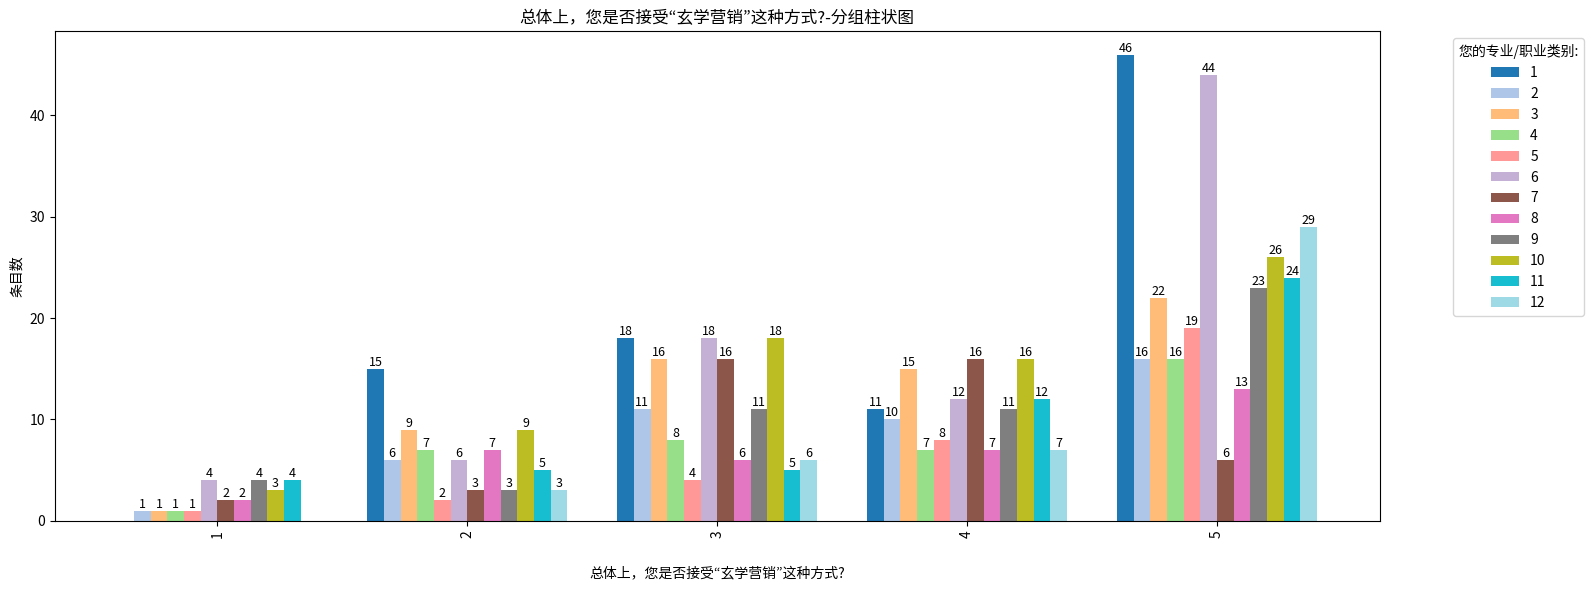

In [179]:
index_axis = df.columns[single_choice_effects[-1]]
column_axis = causes[-1]
plot_stacked_histogram(
    df, index_axis, column_axis, index_axis_label=index_axis, stacked=False
)

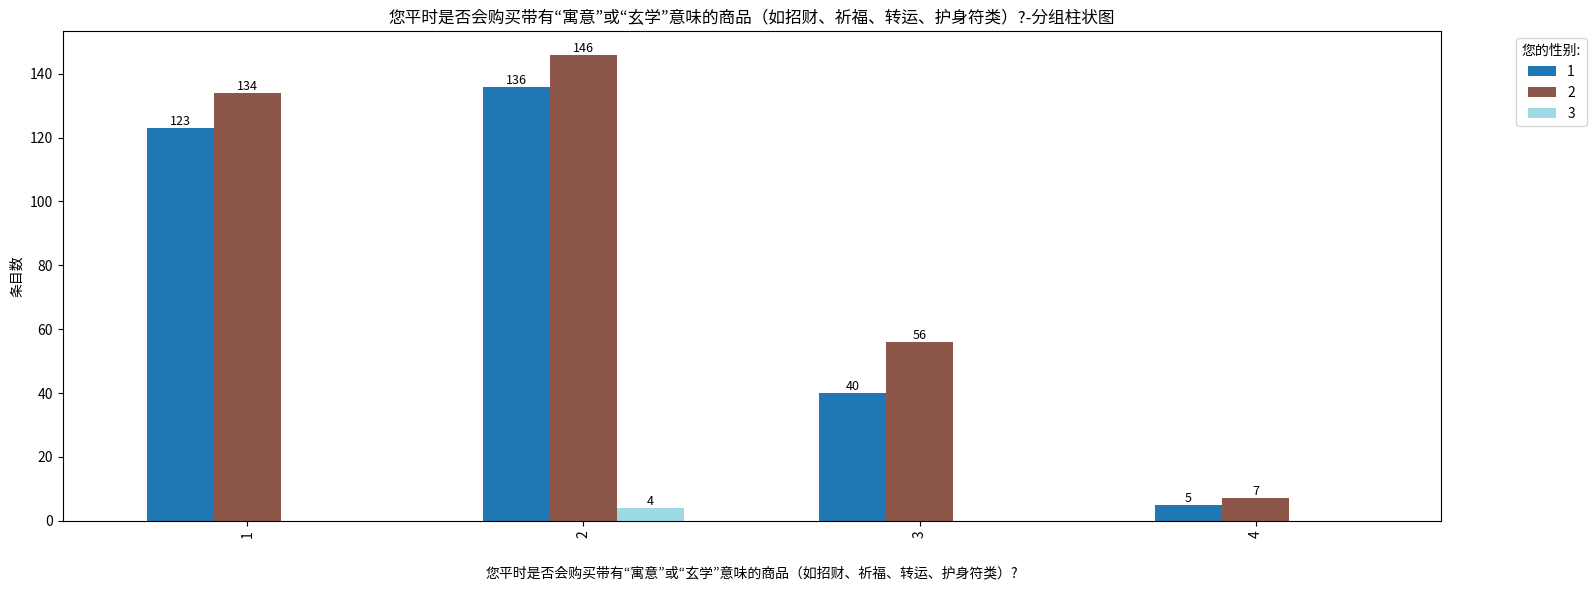

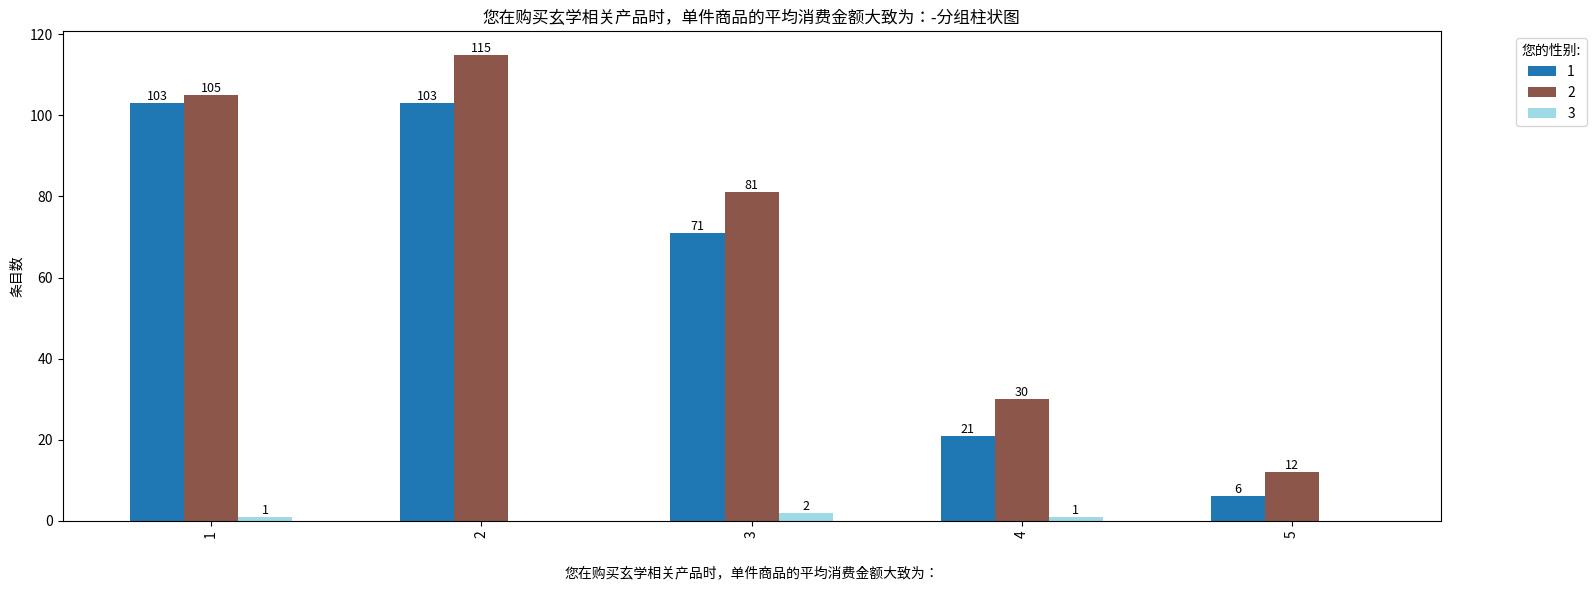

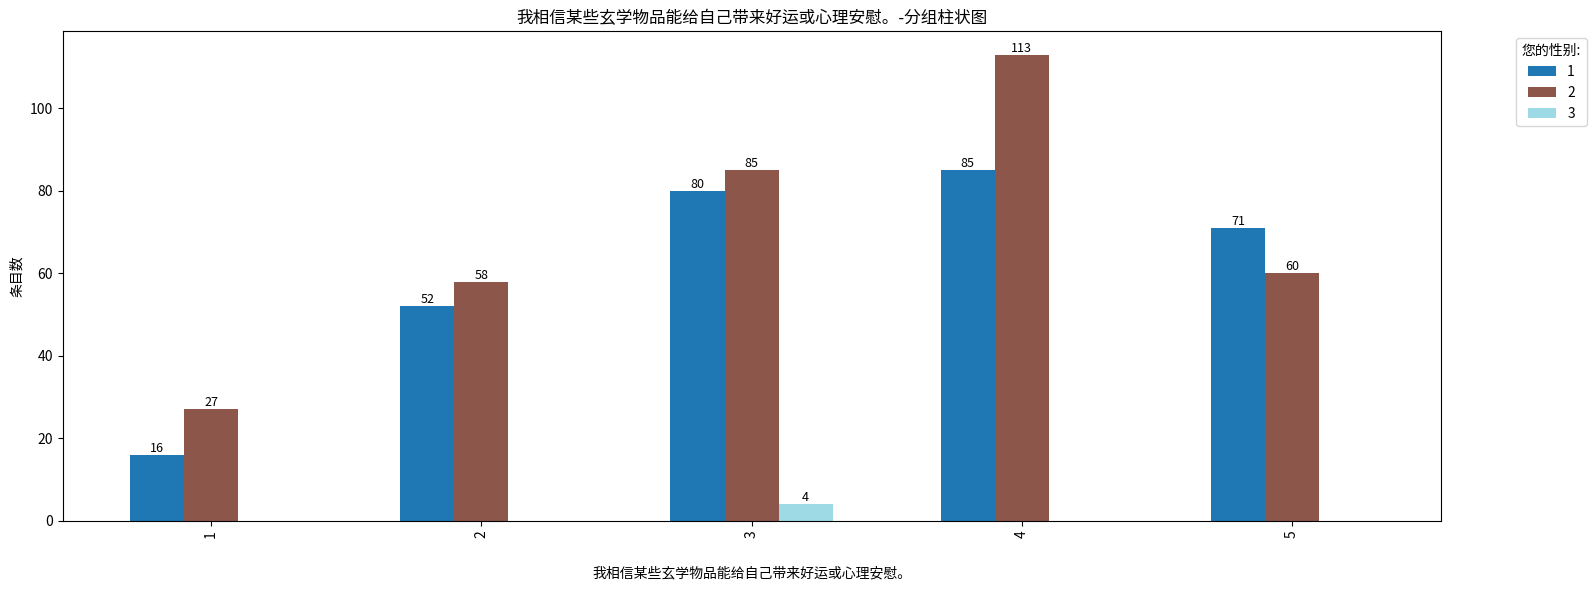

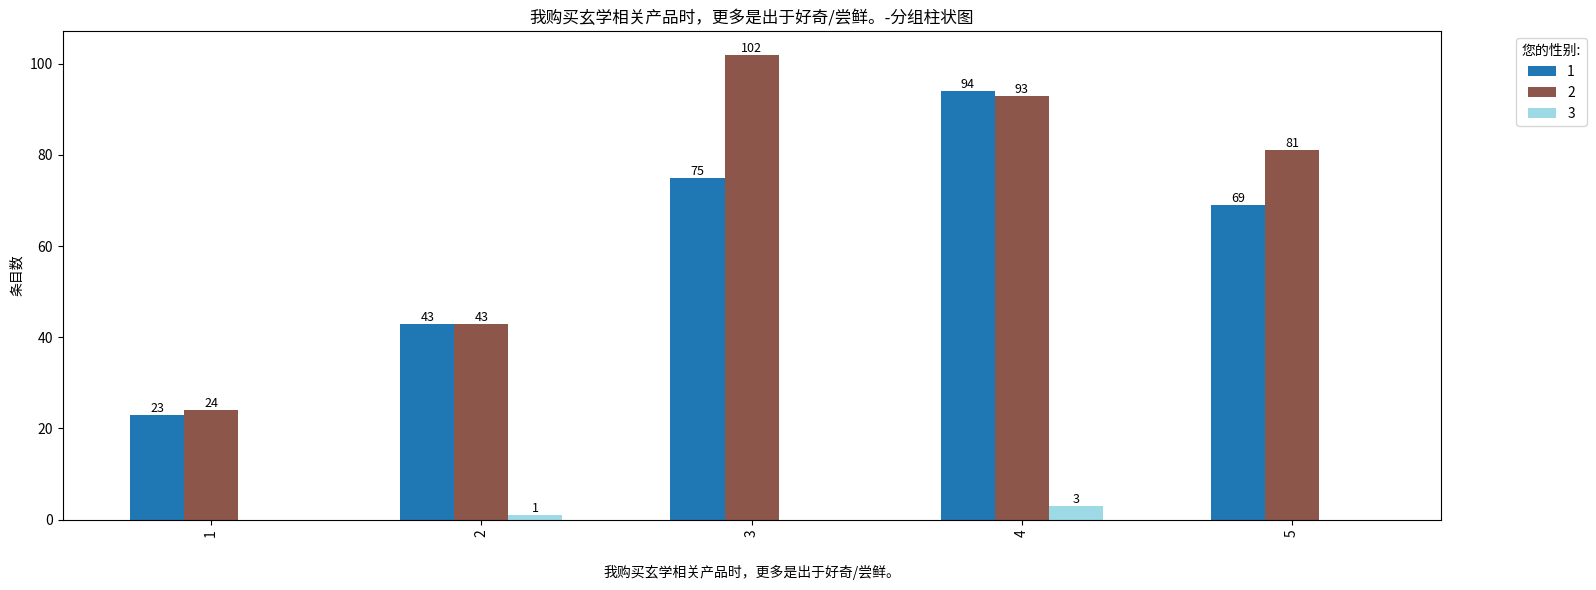

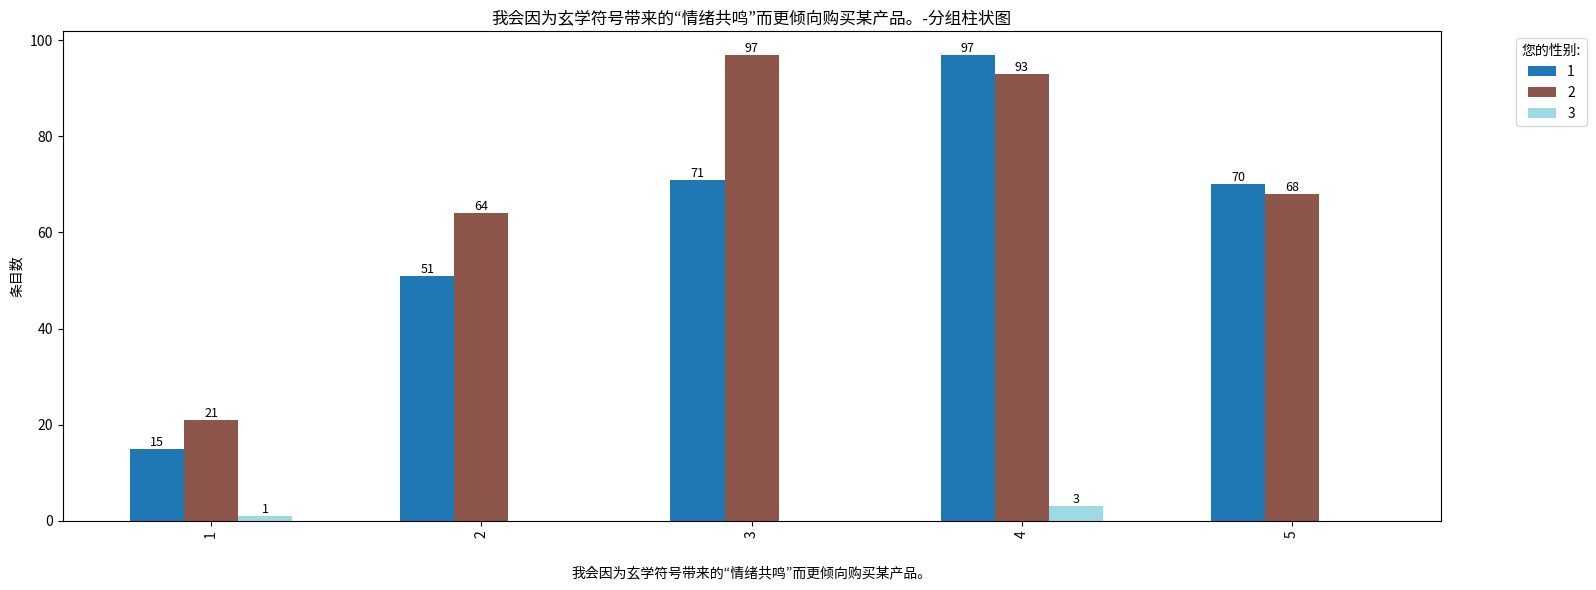

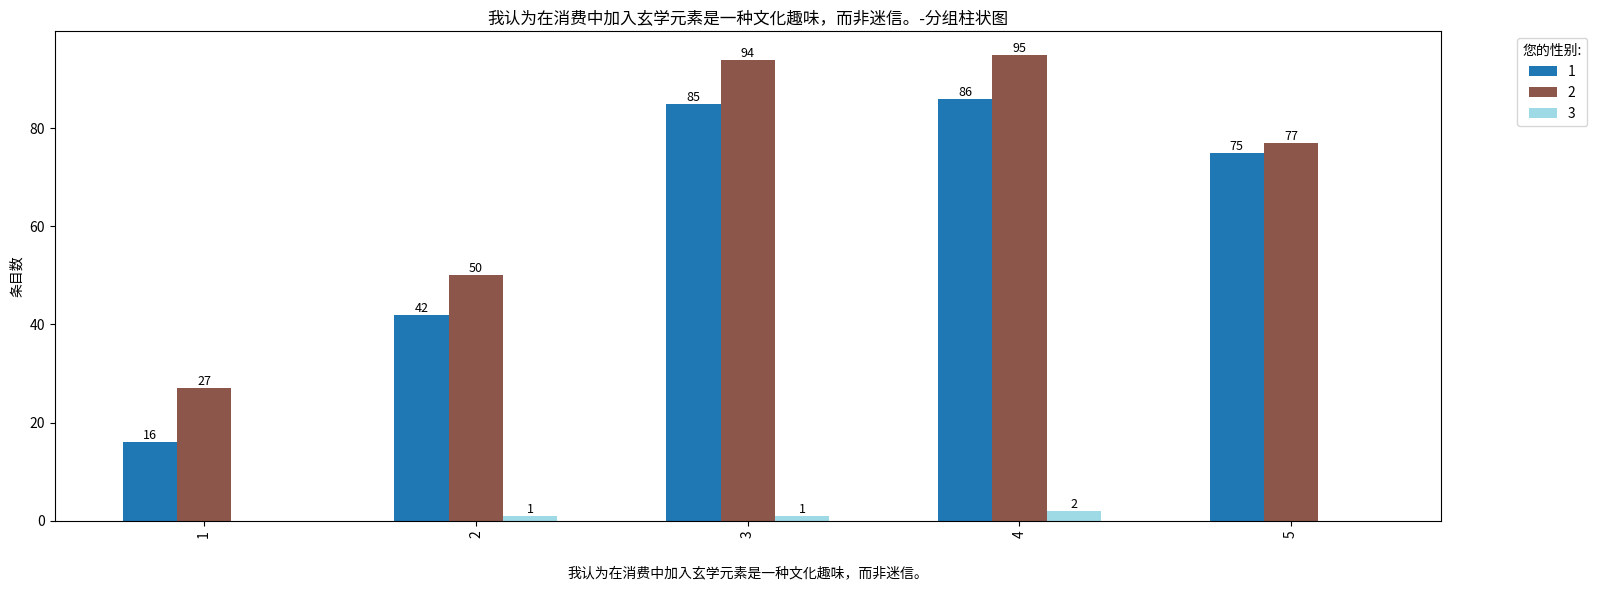

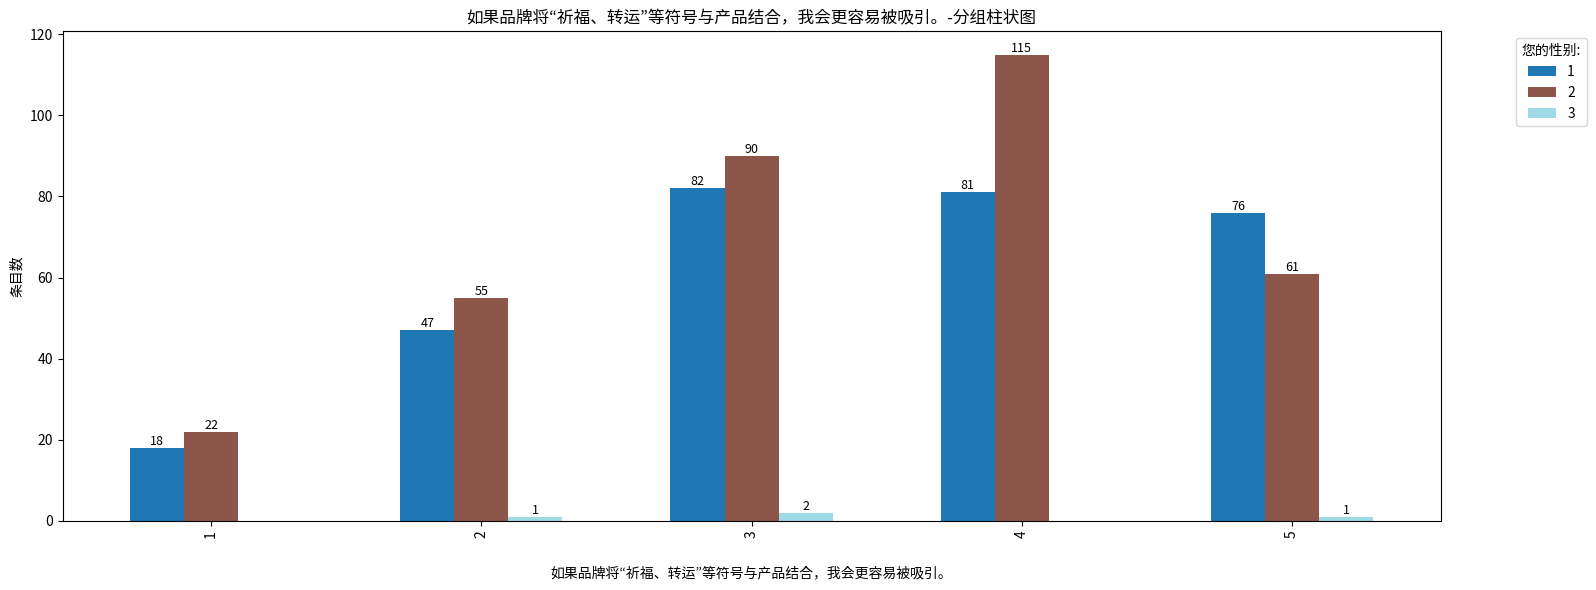

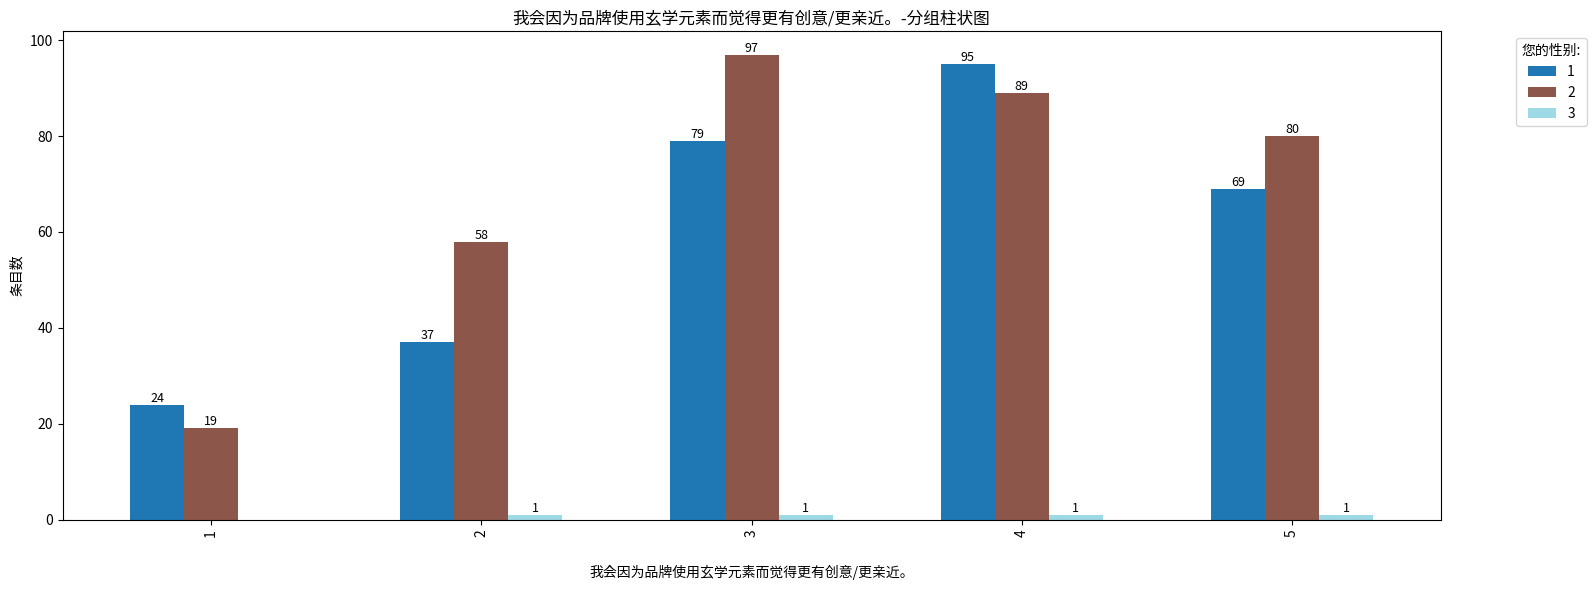

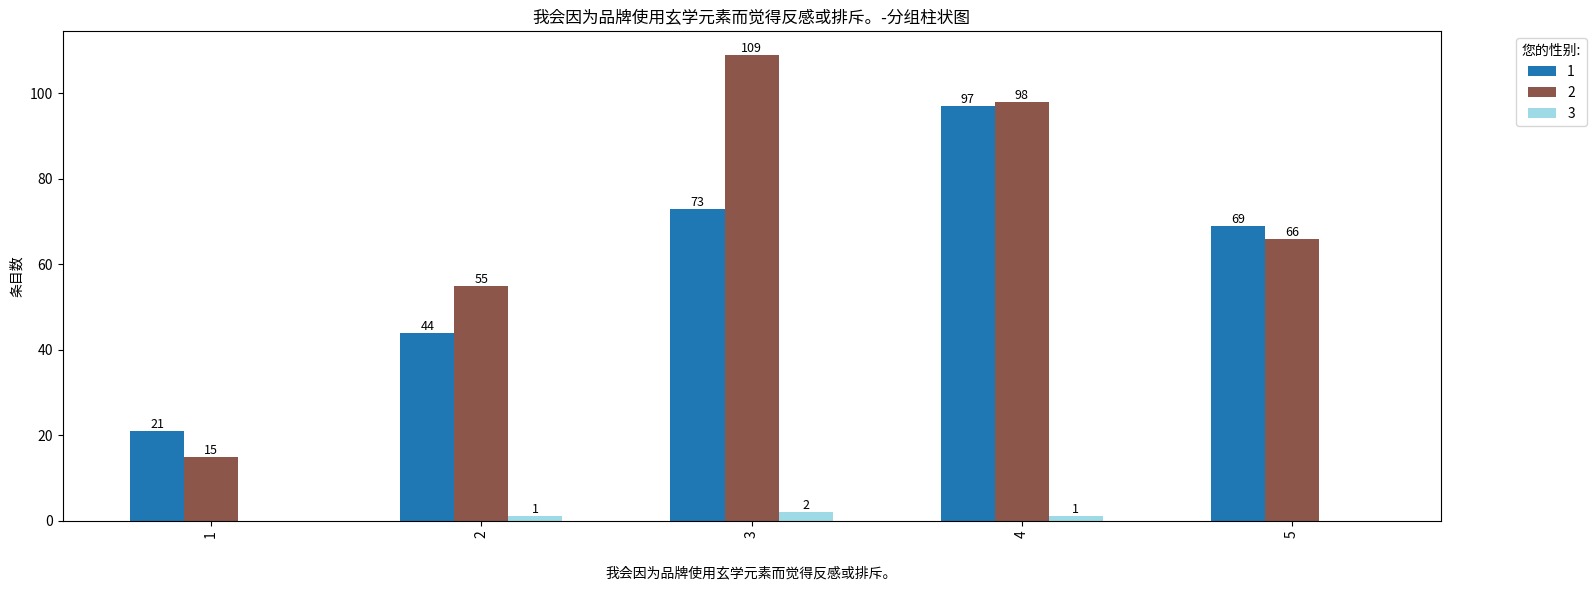

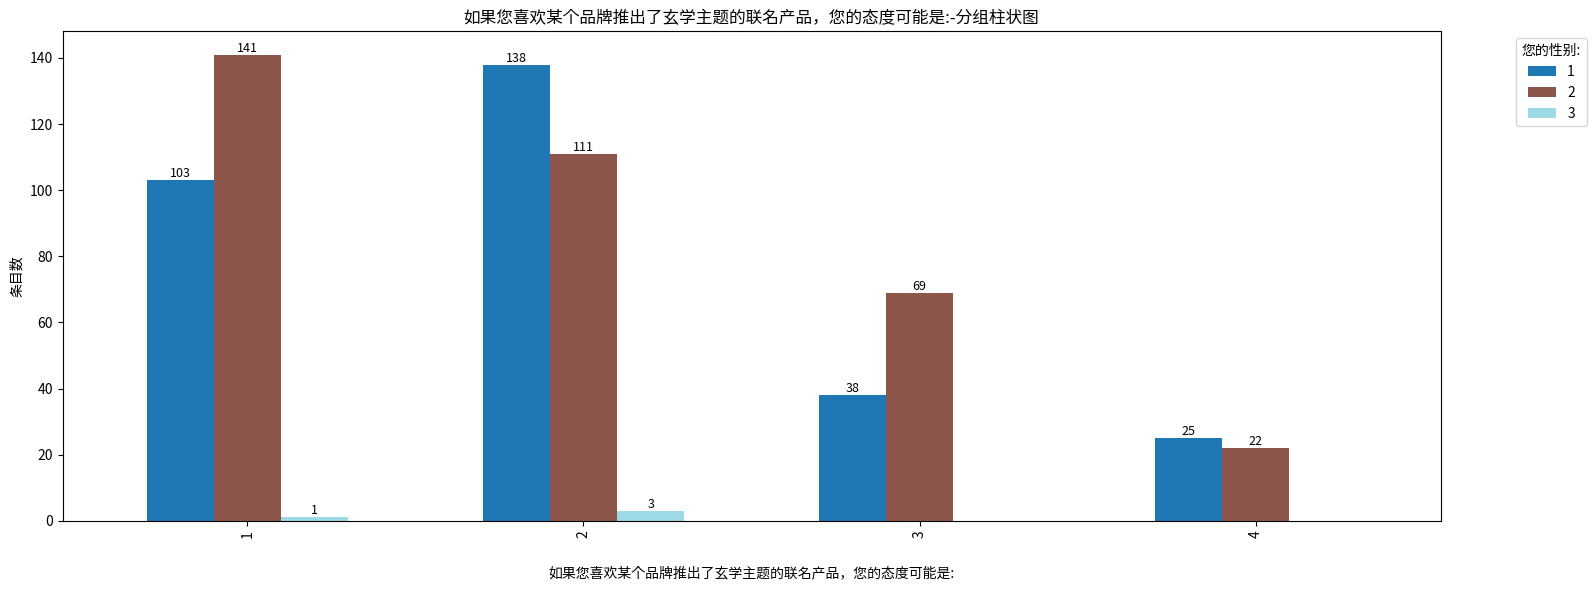

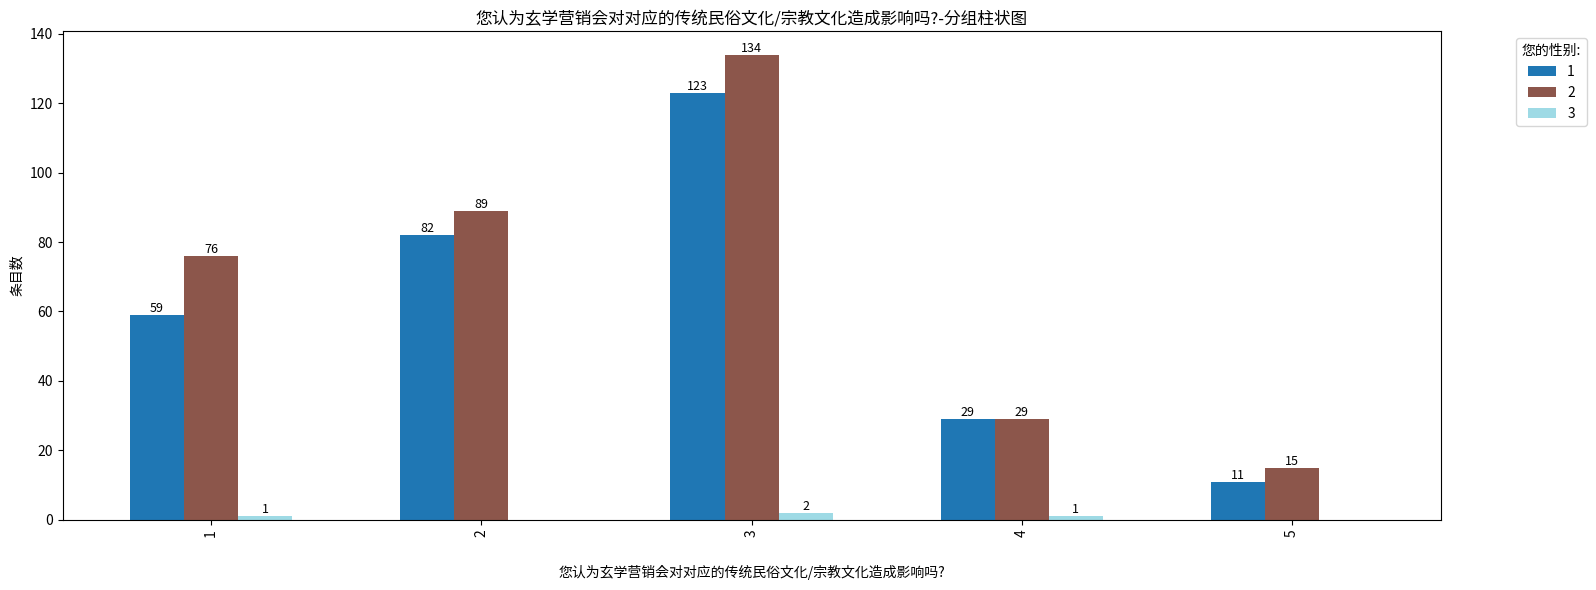

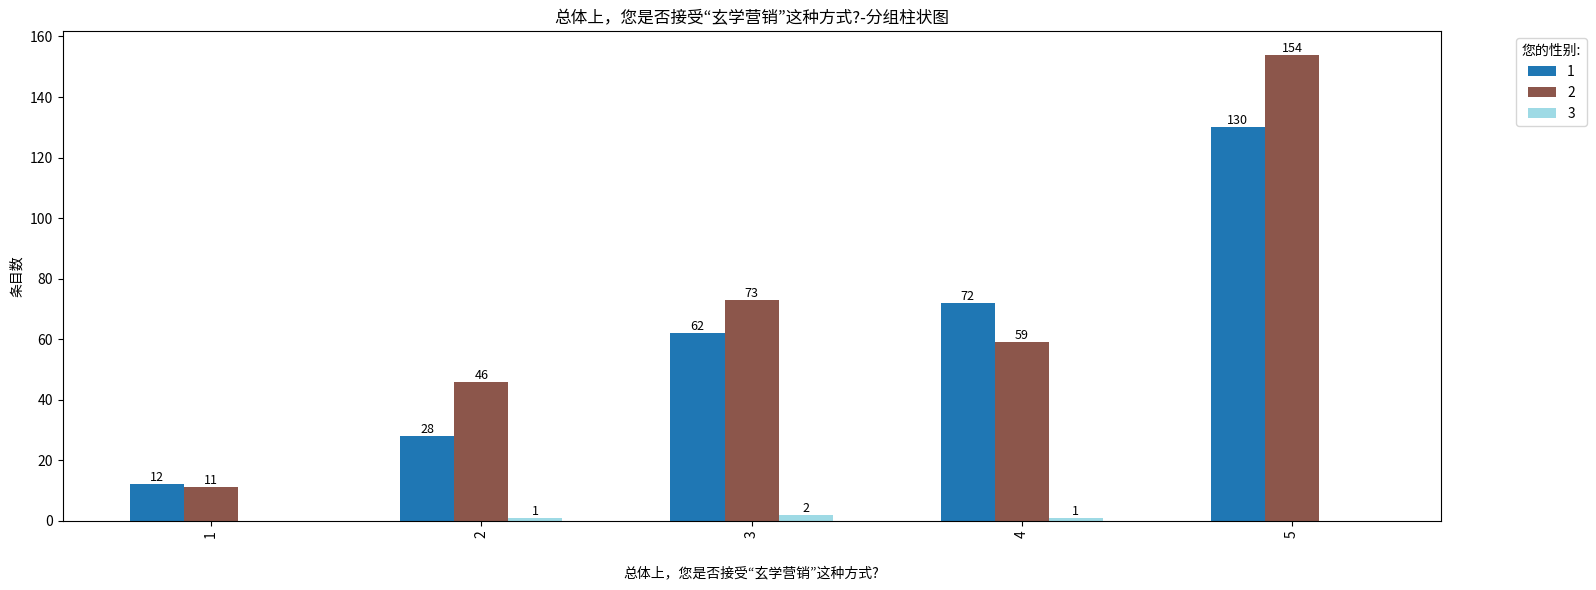

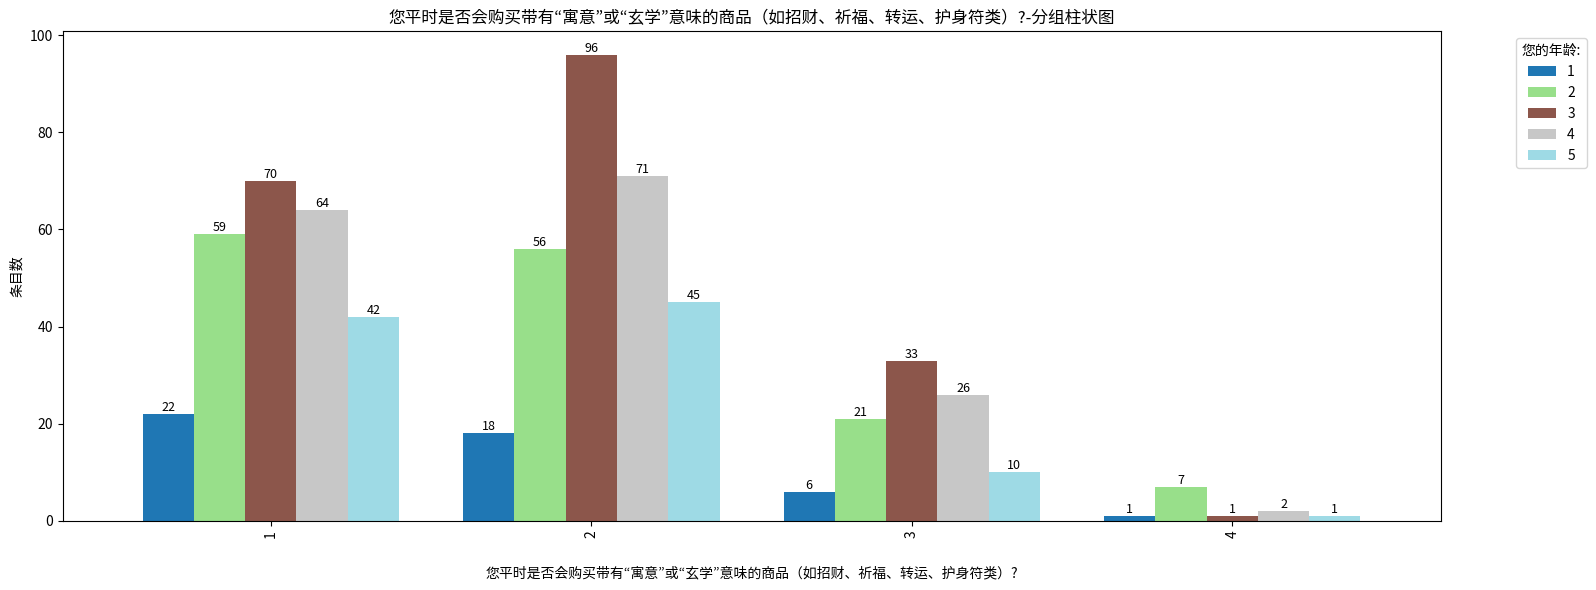

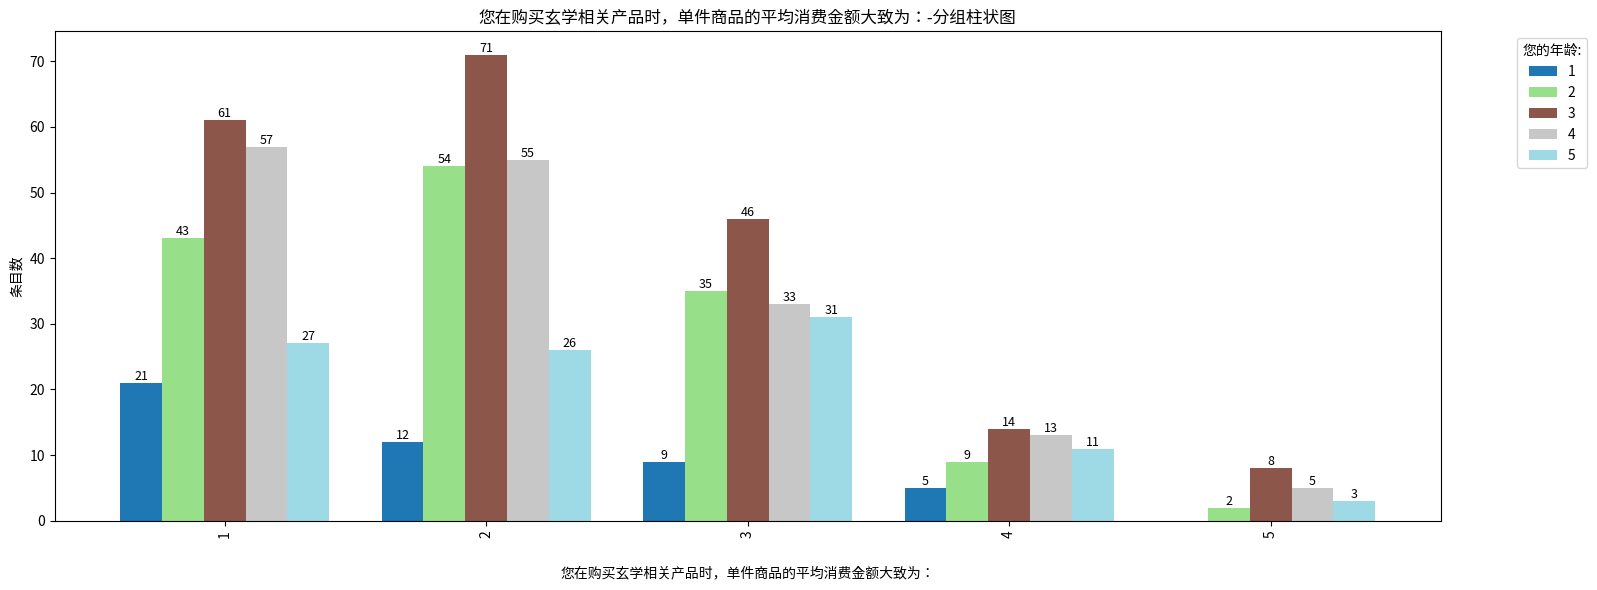

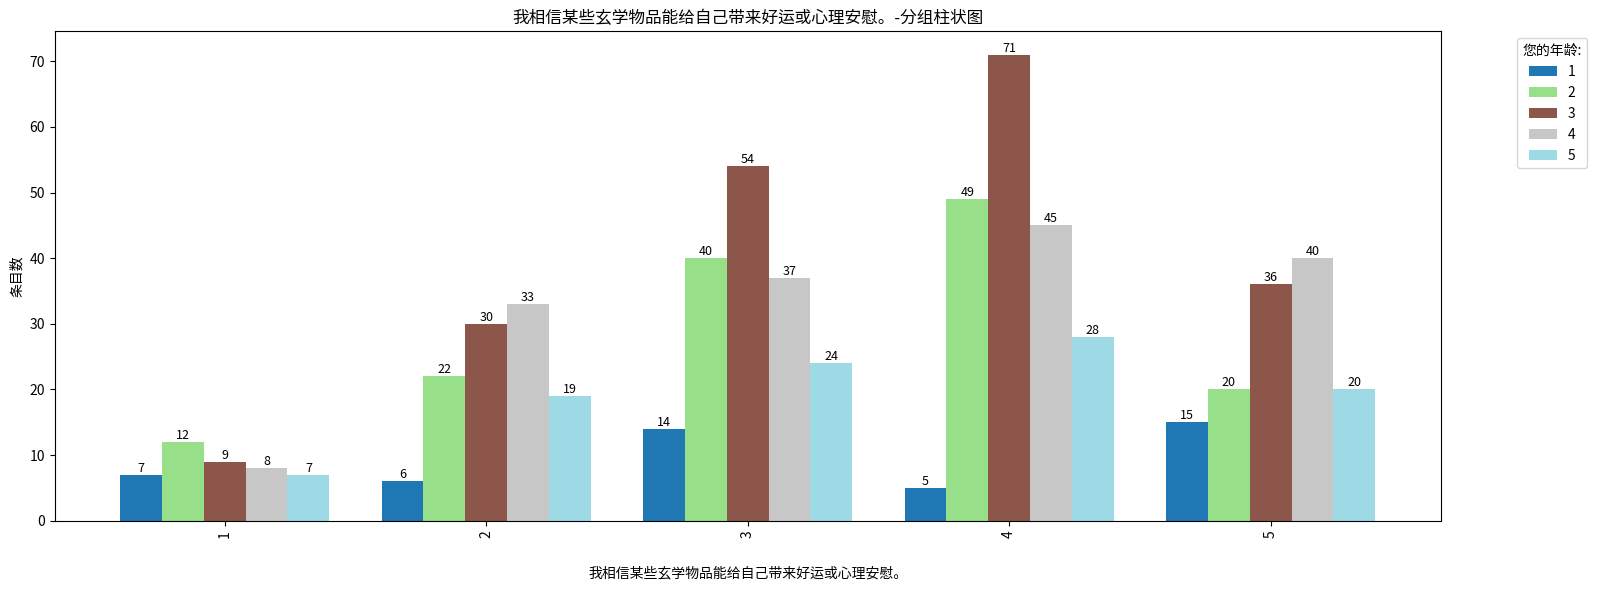

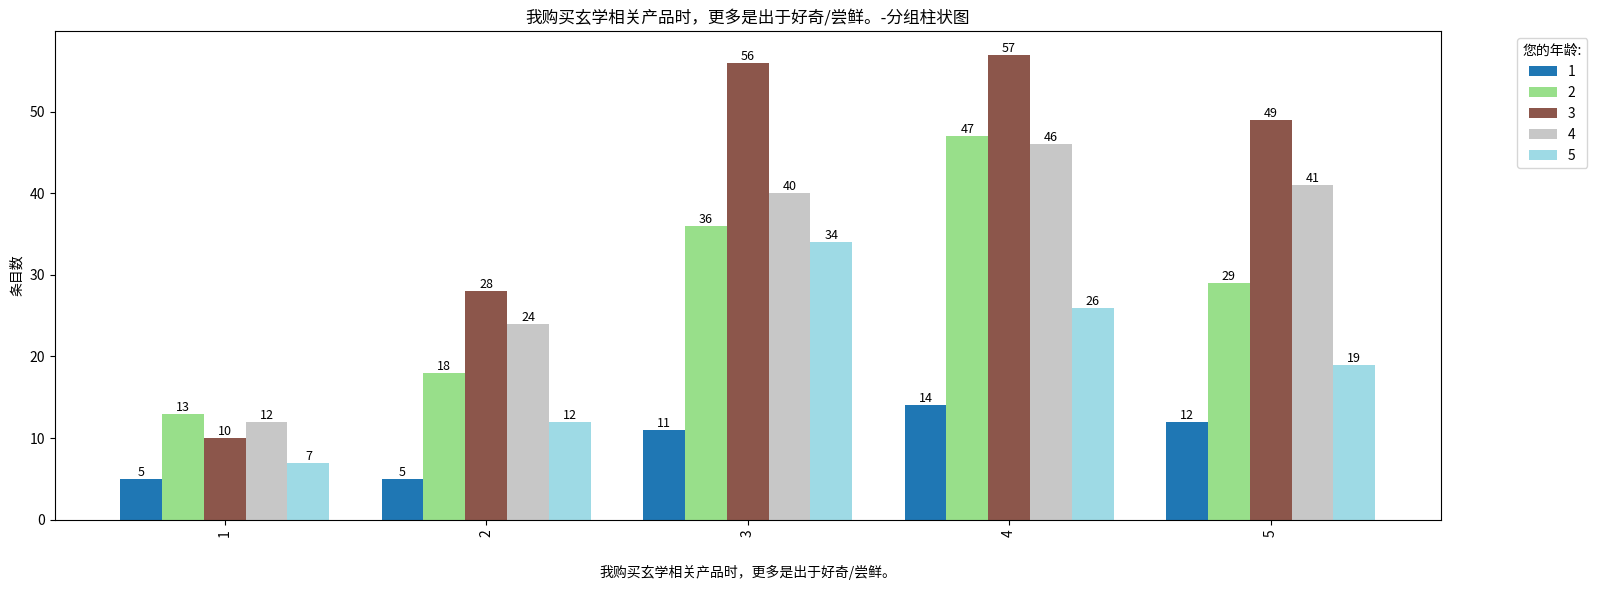

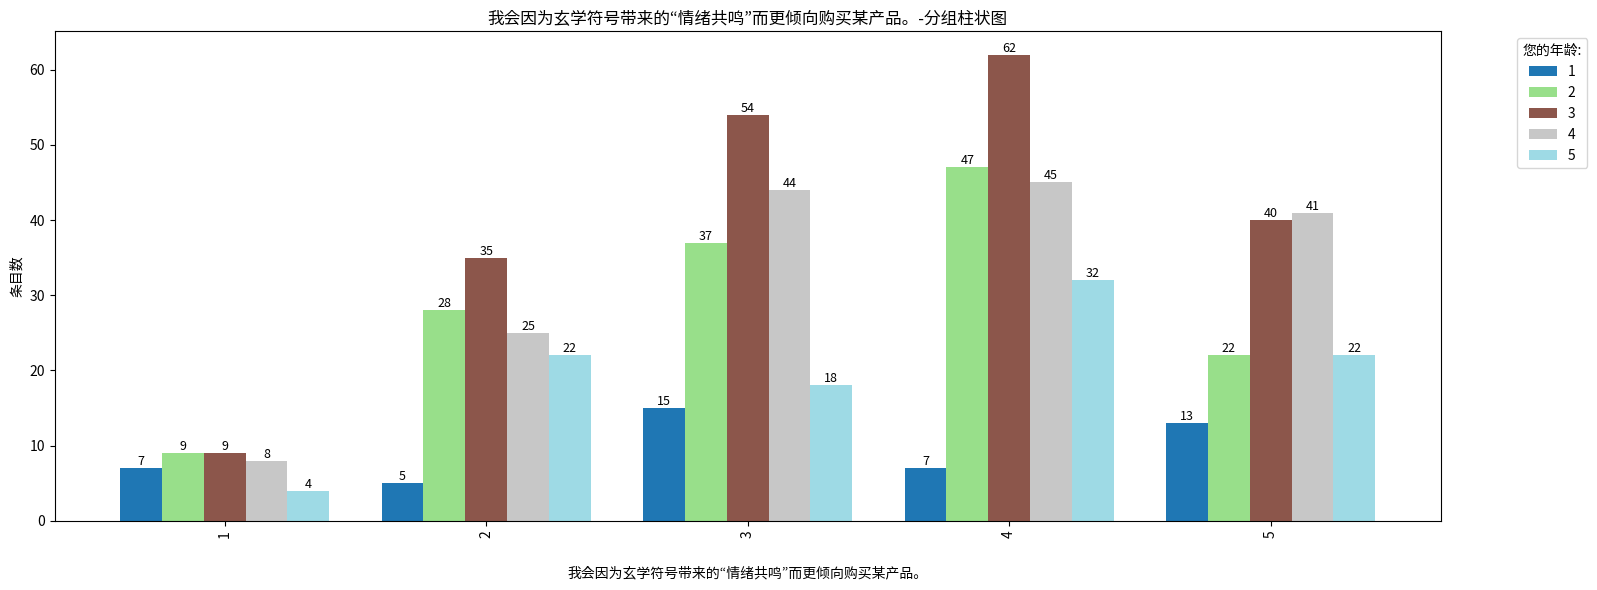

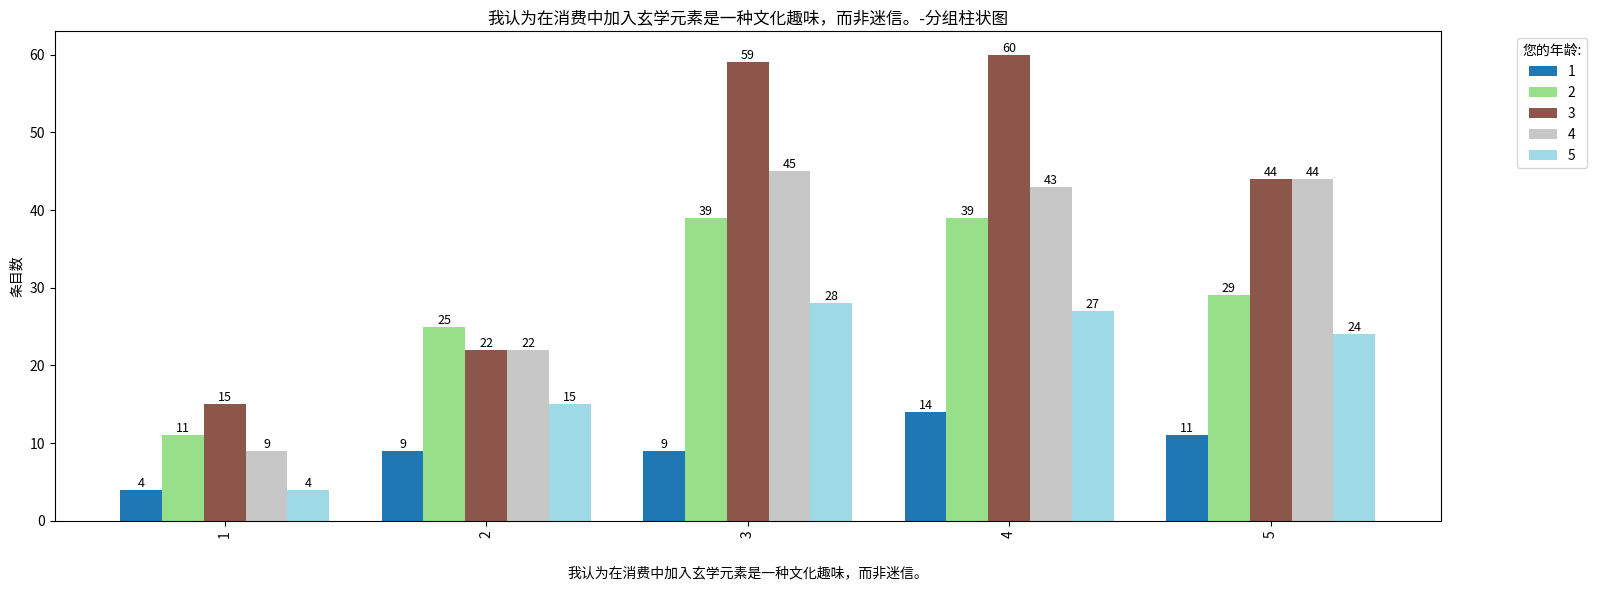

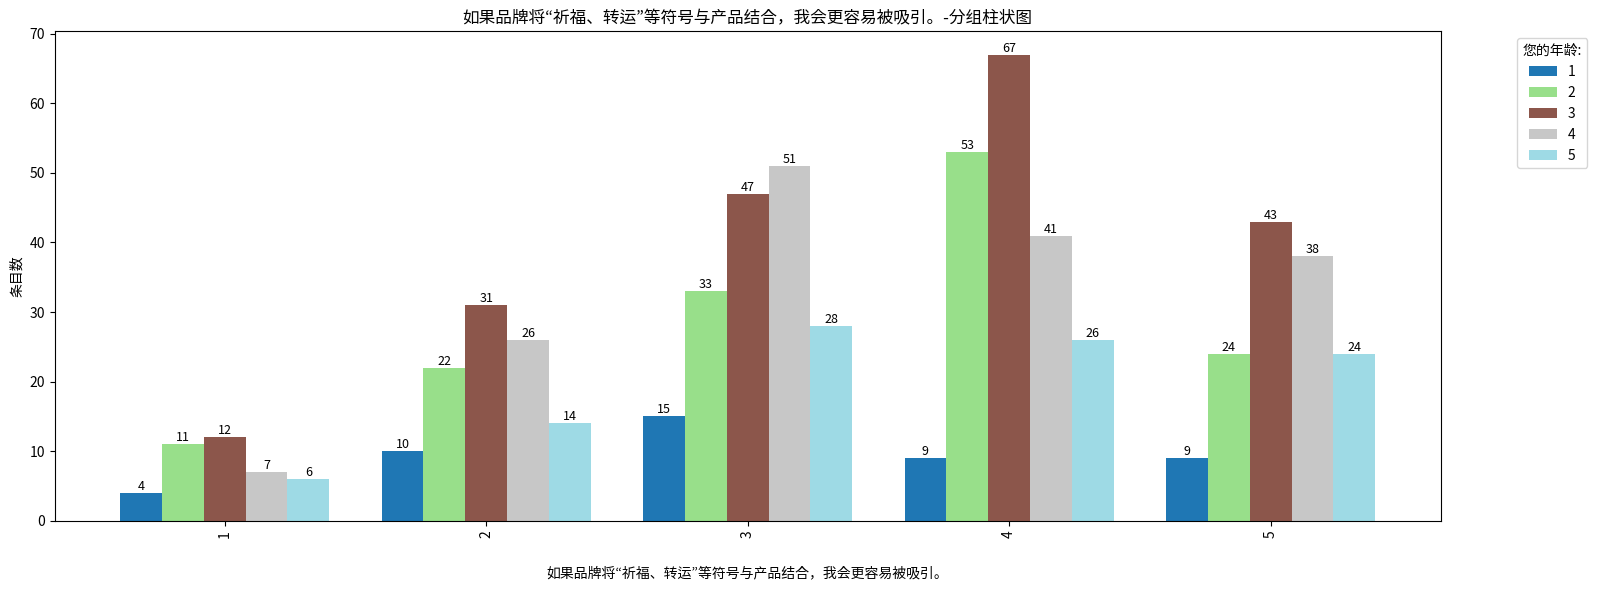

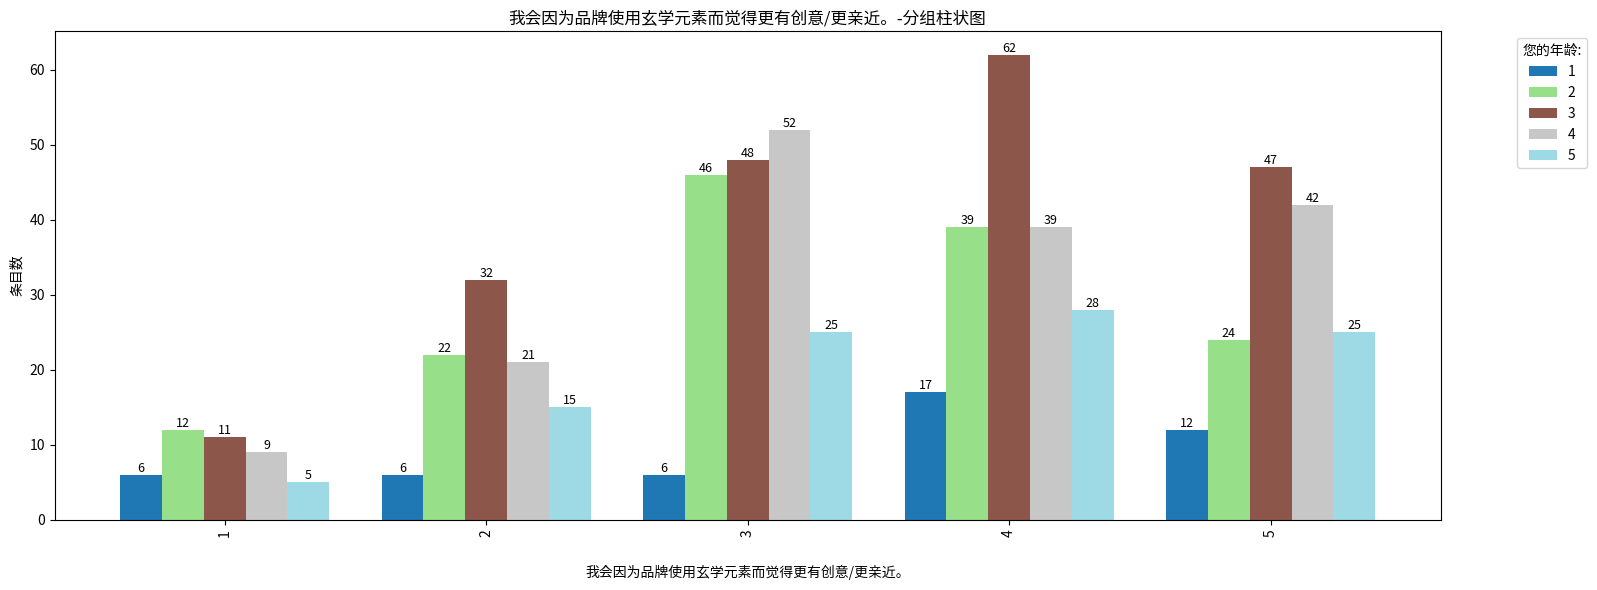

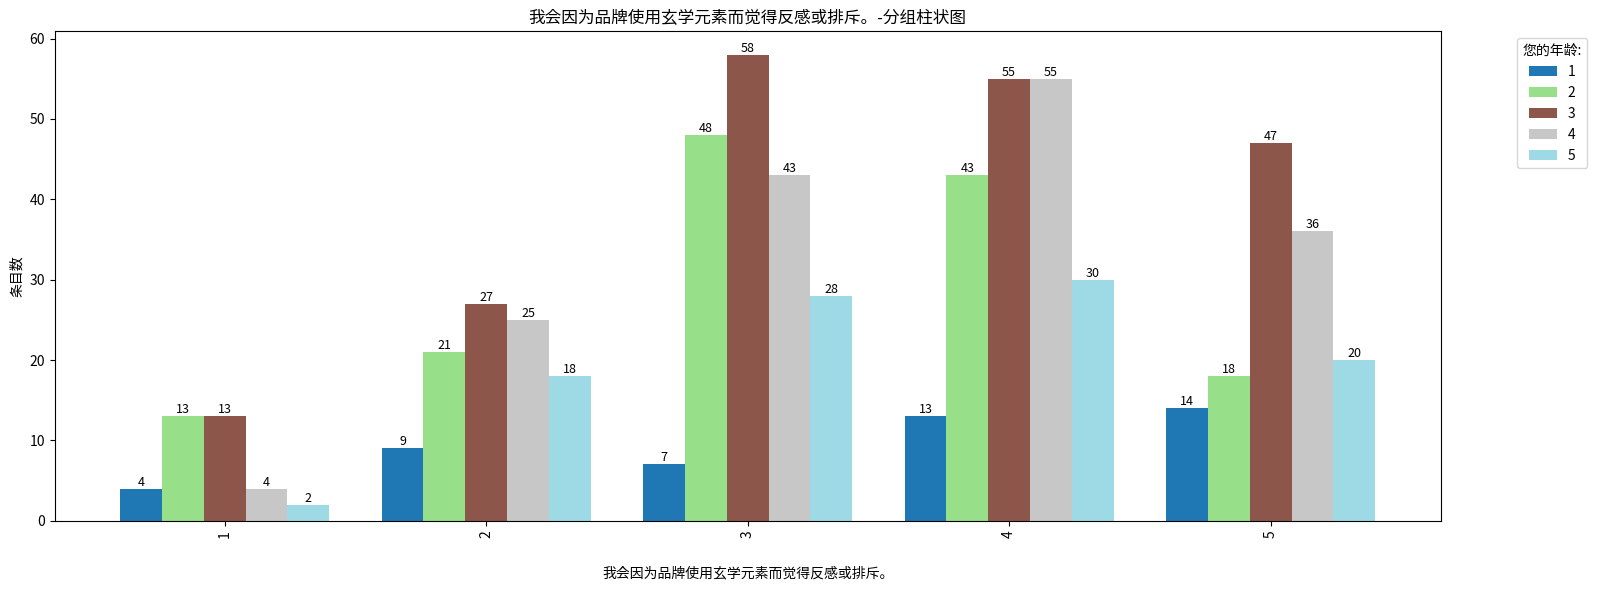

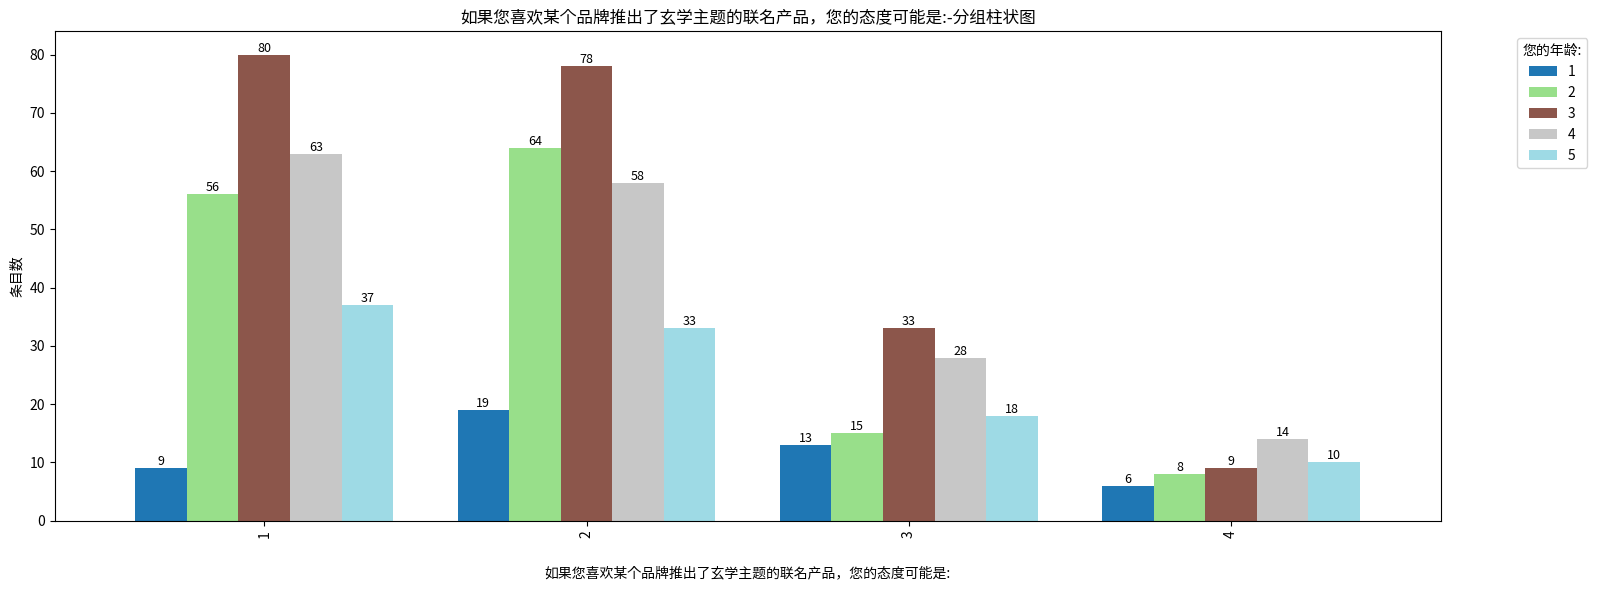

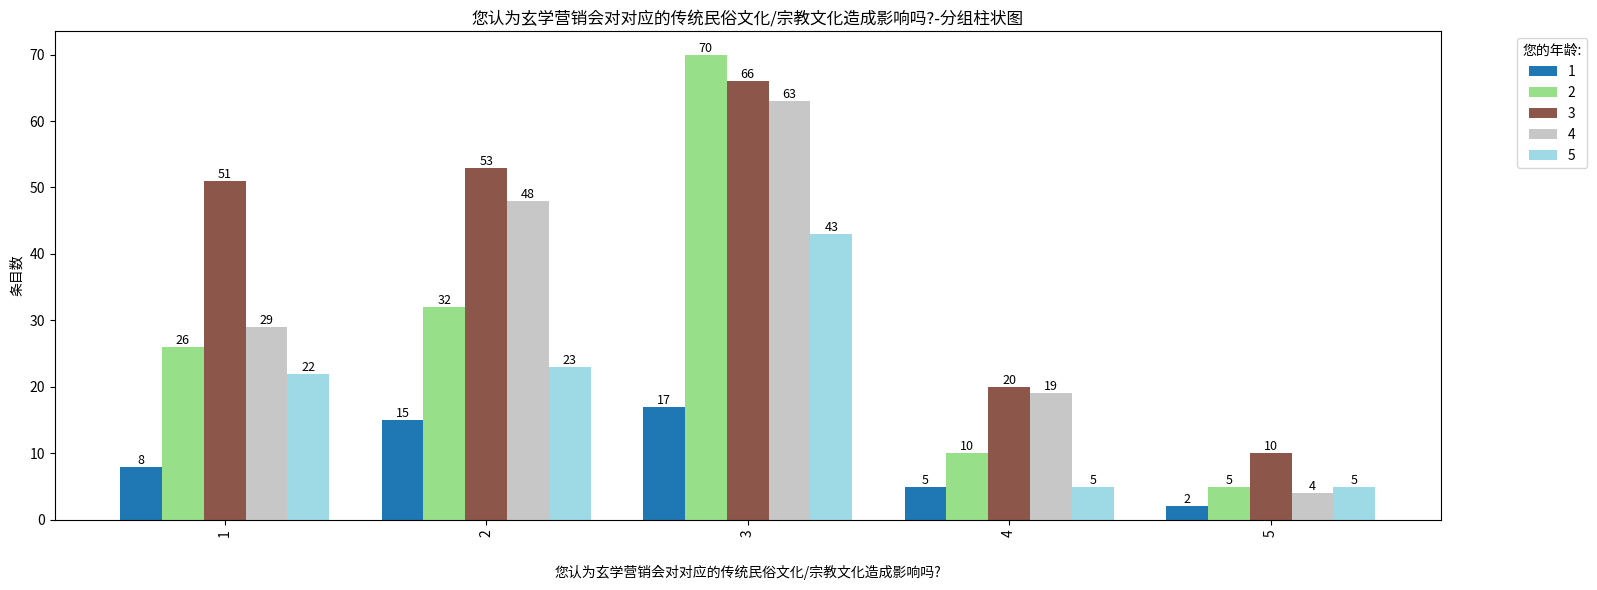

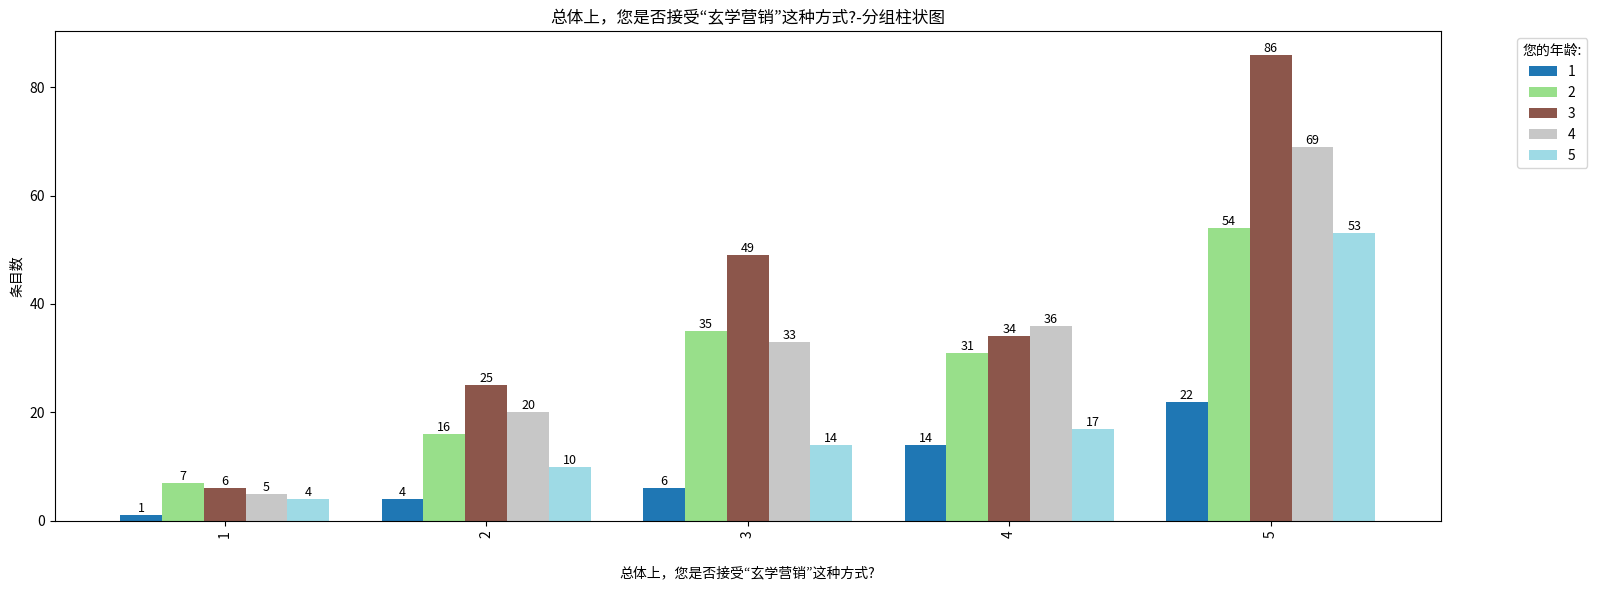

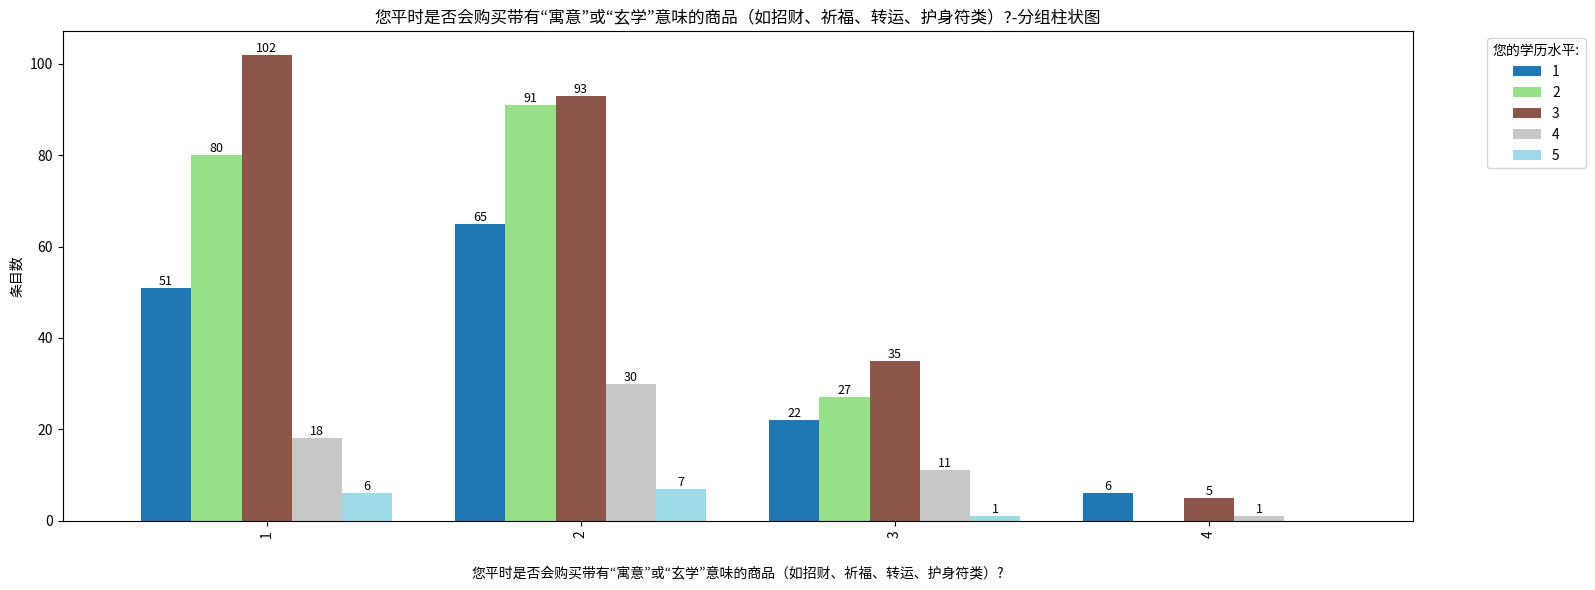

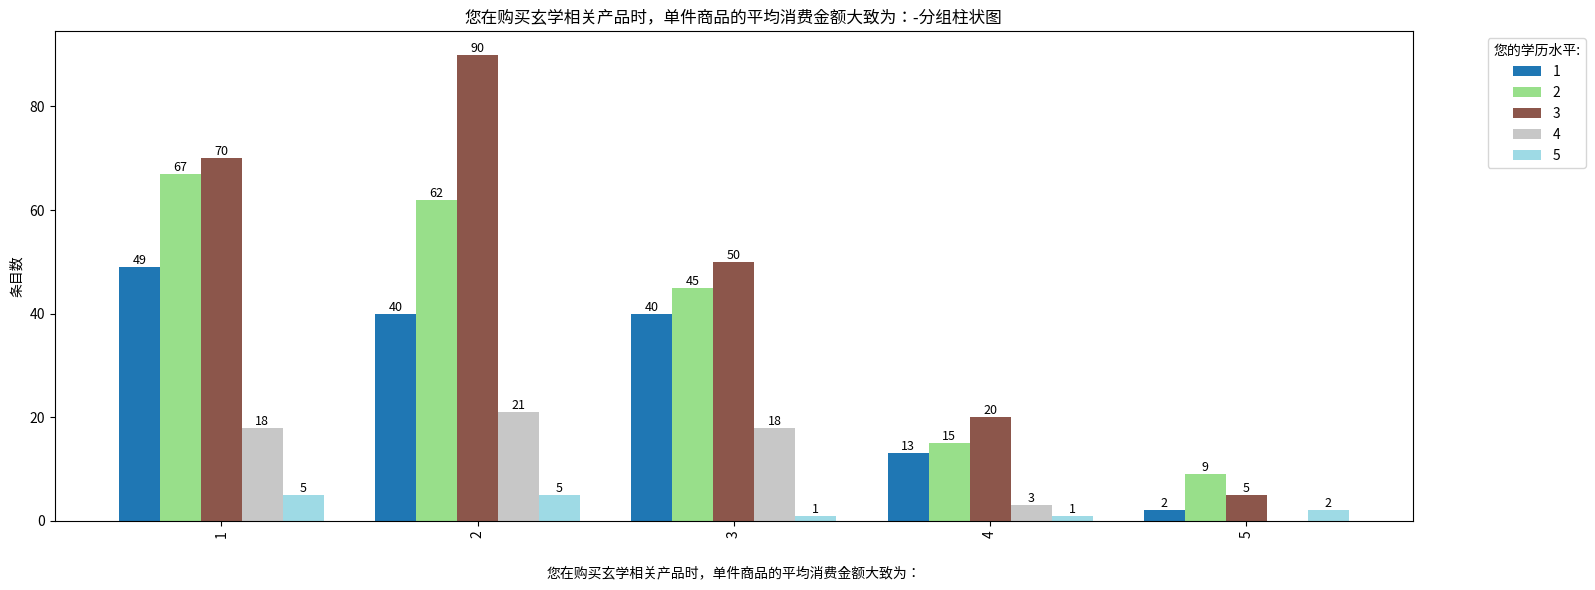

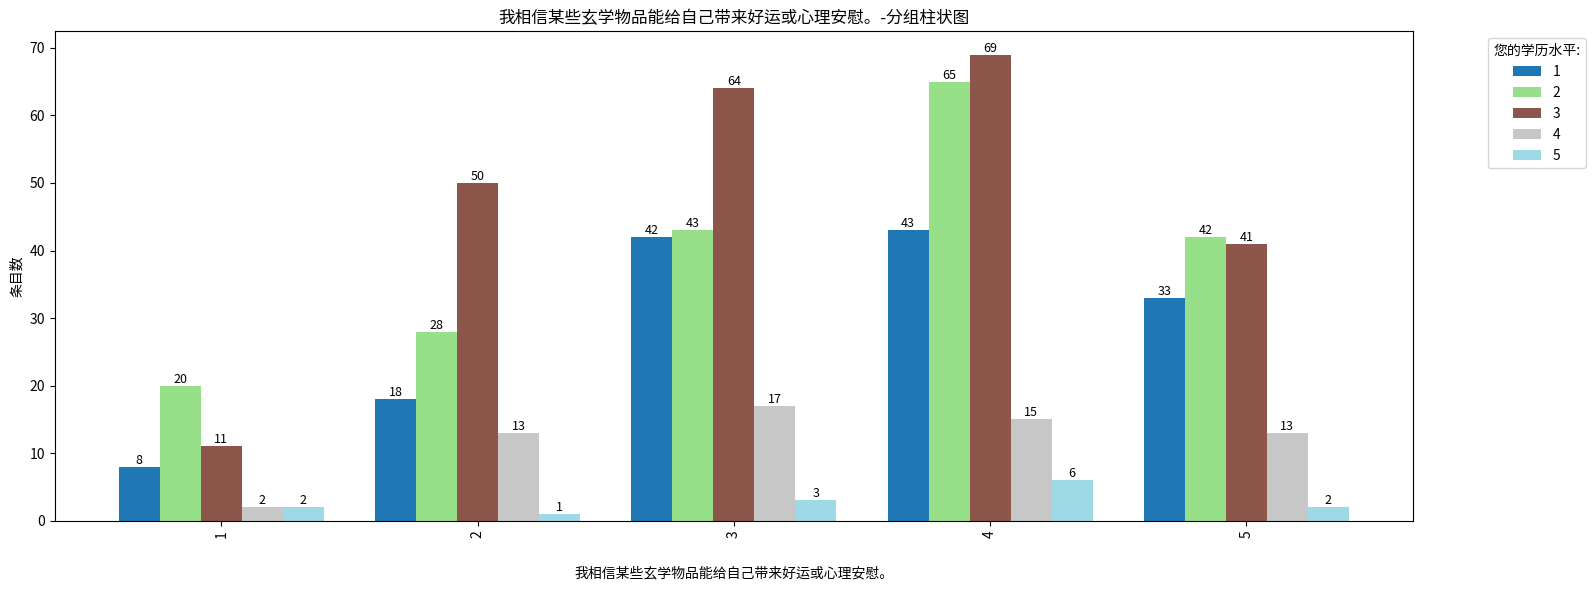

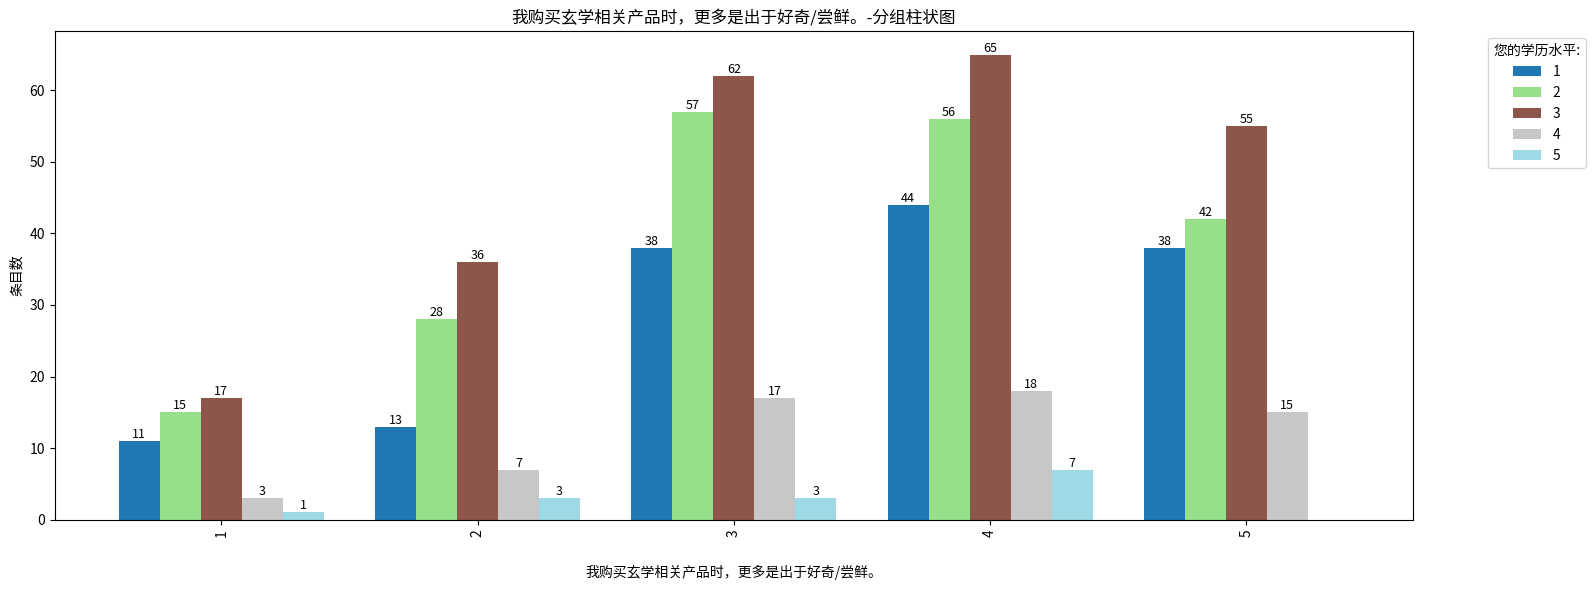

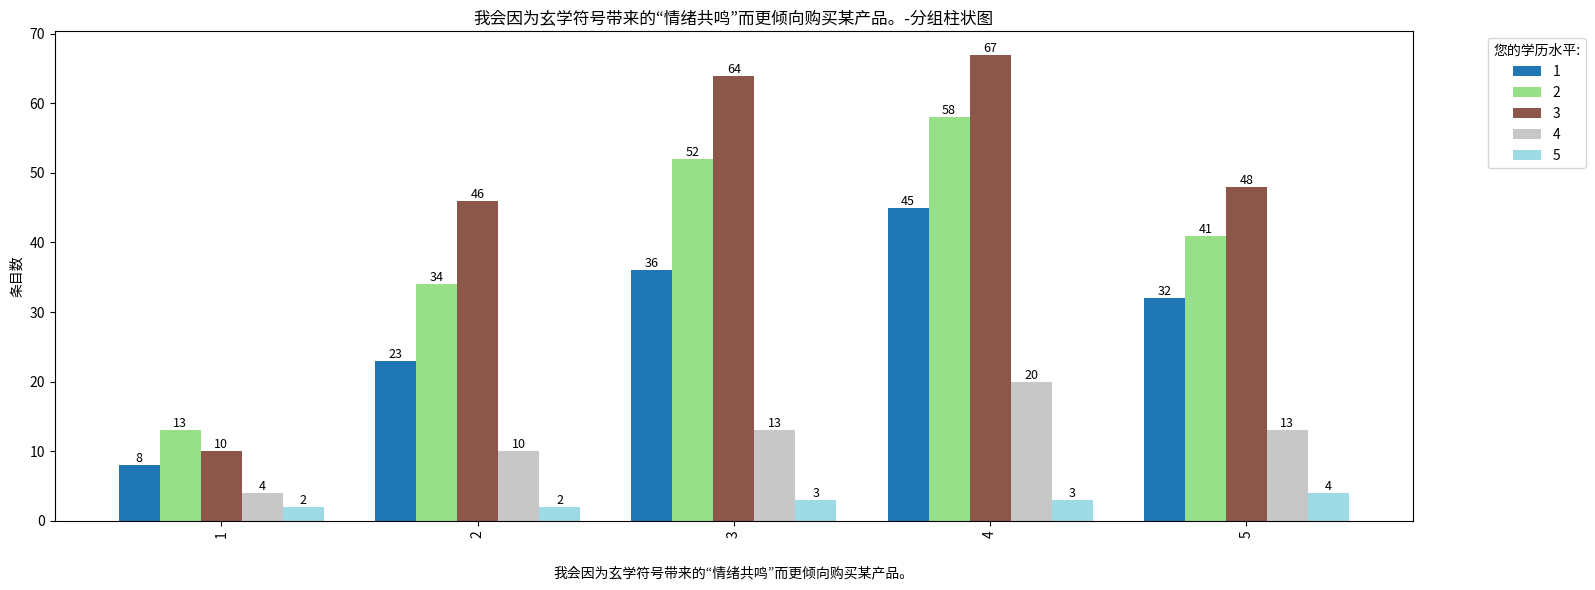

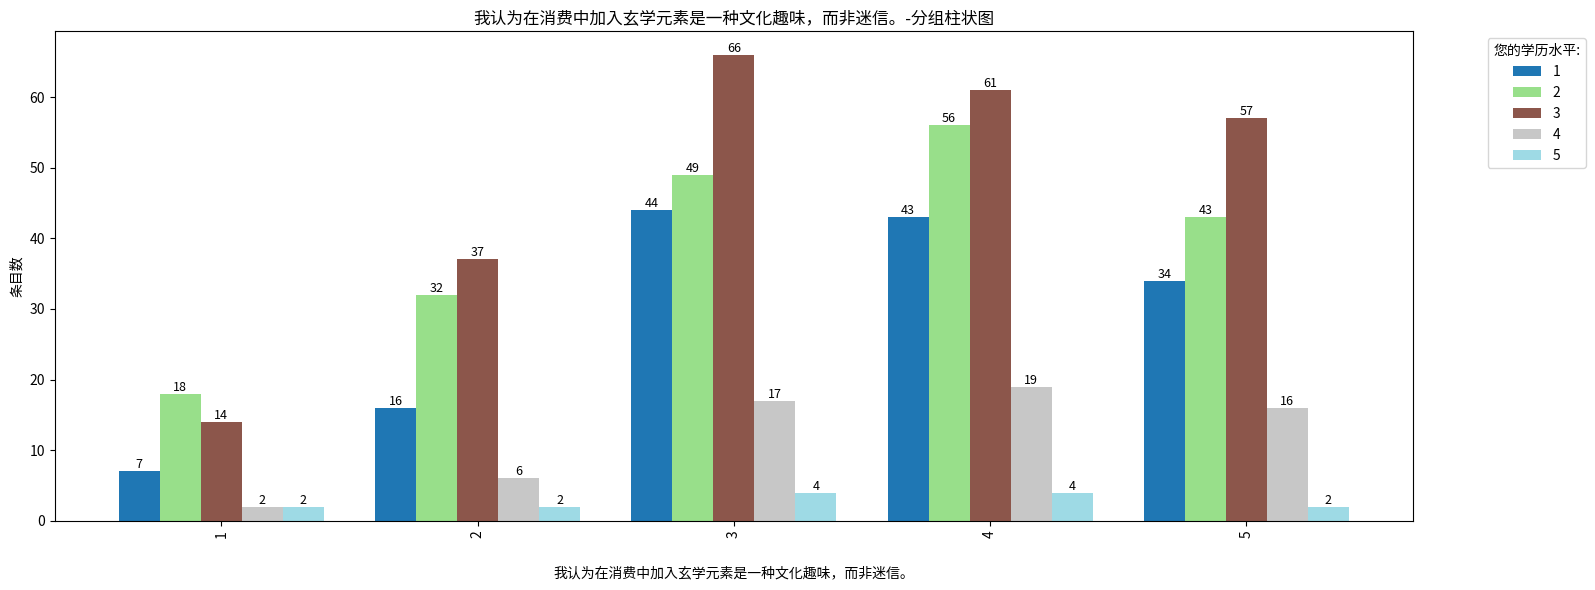

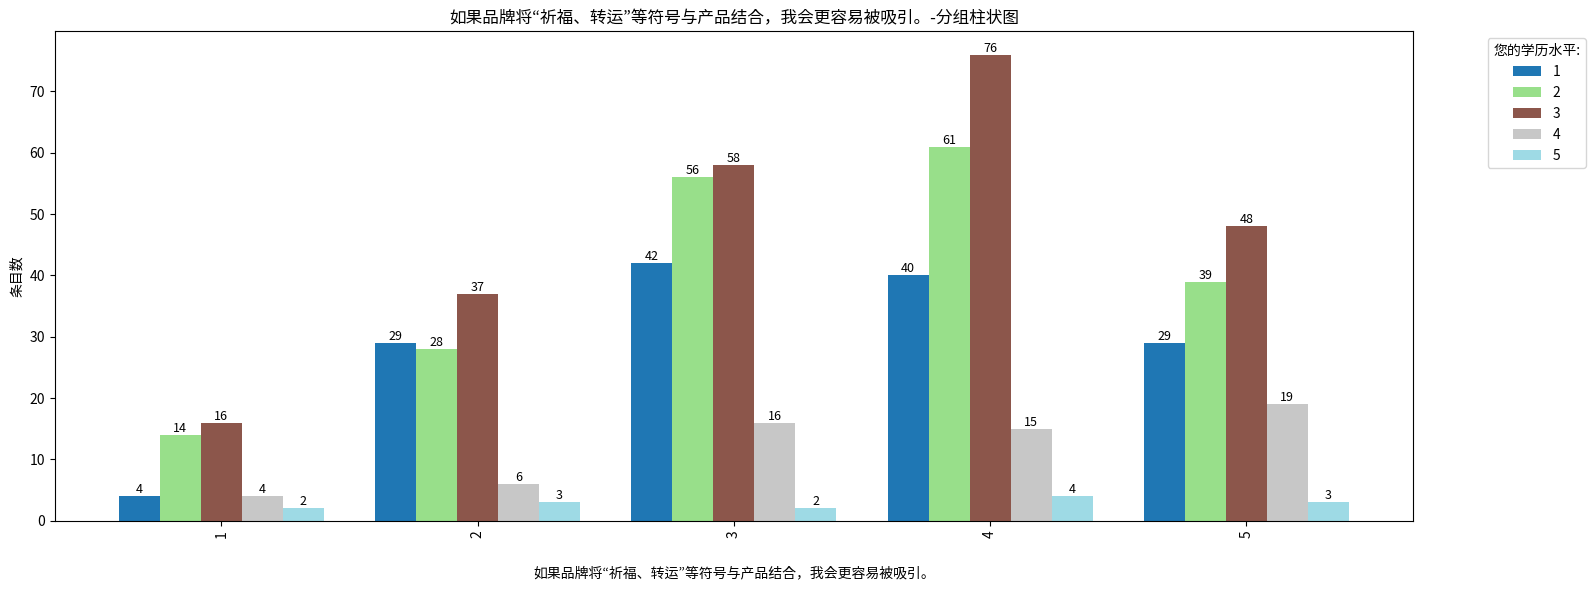

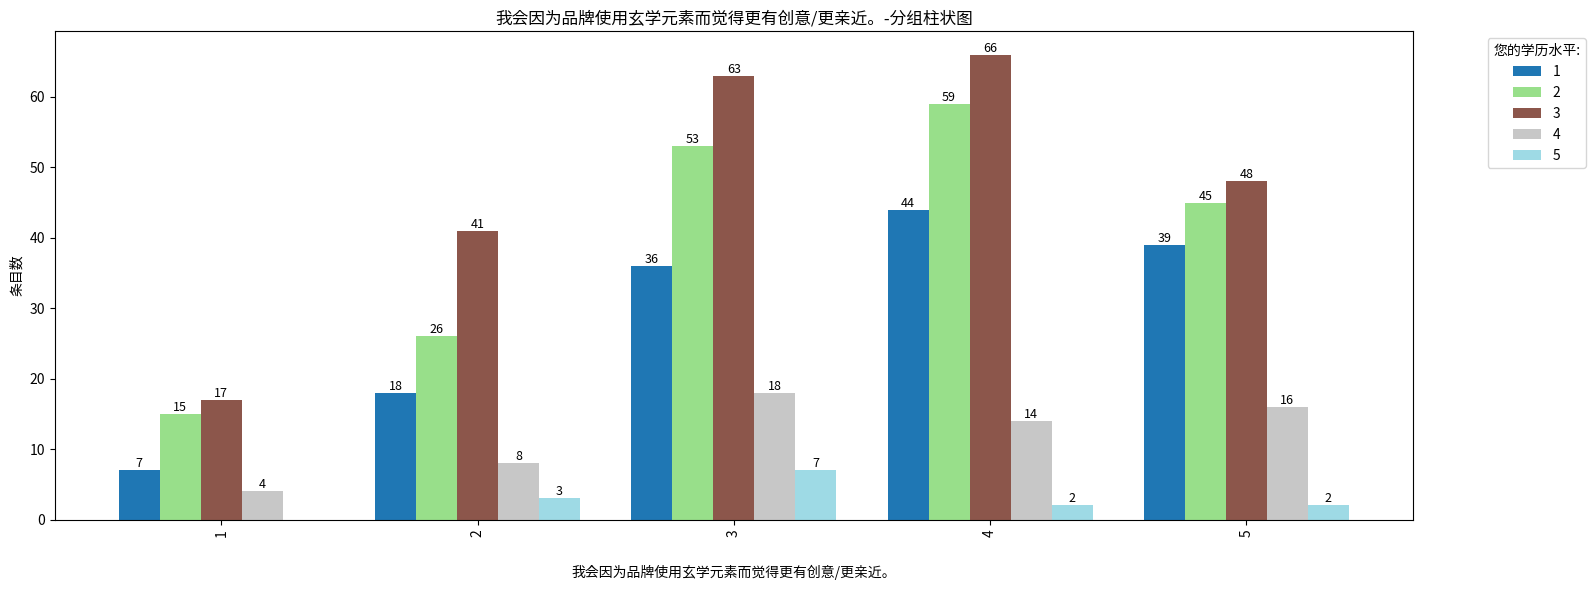

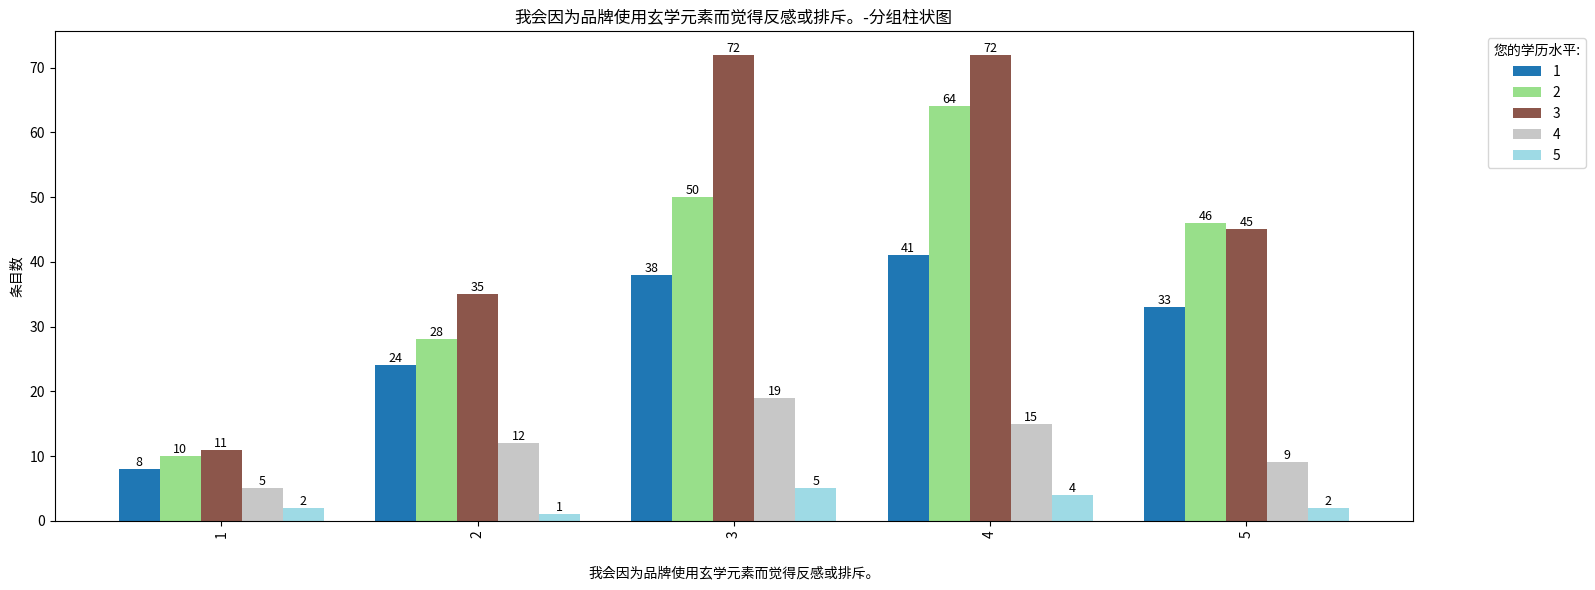

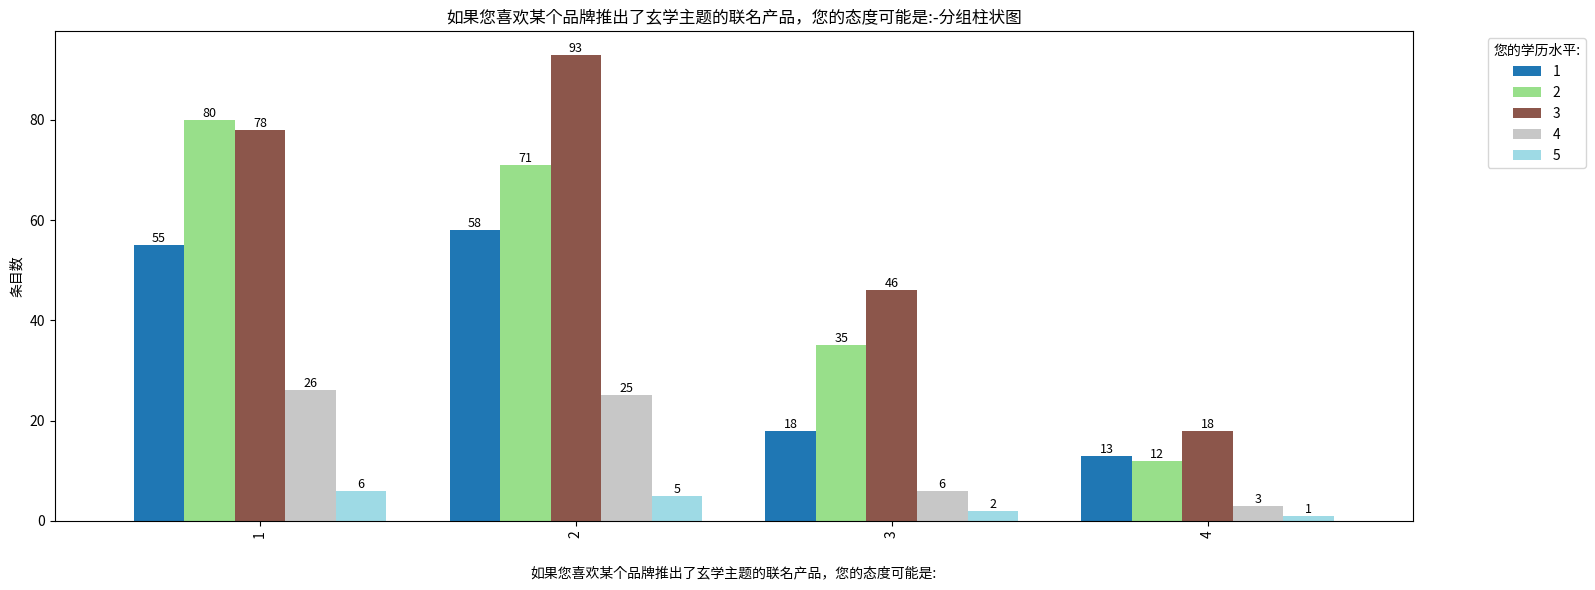

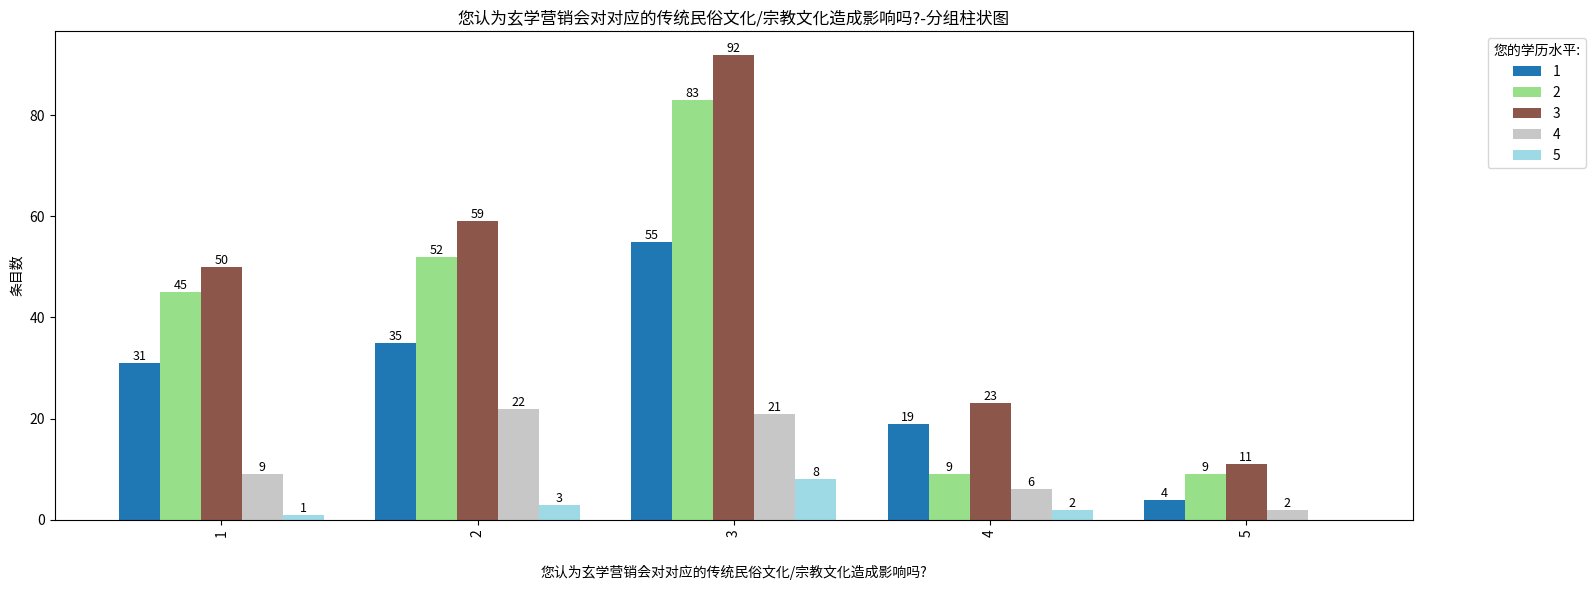

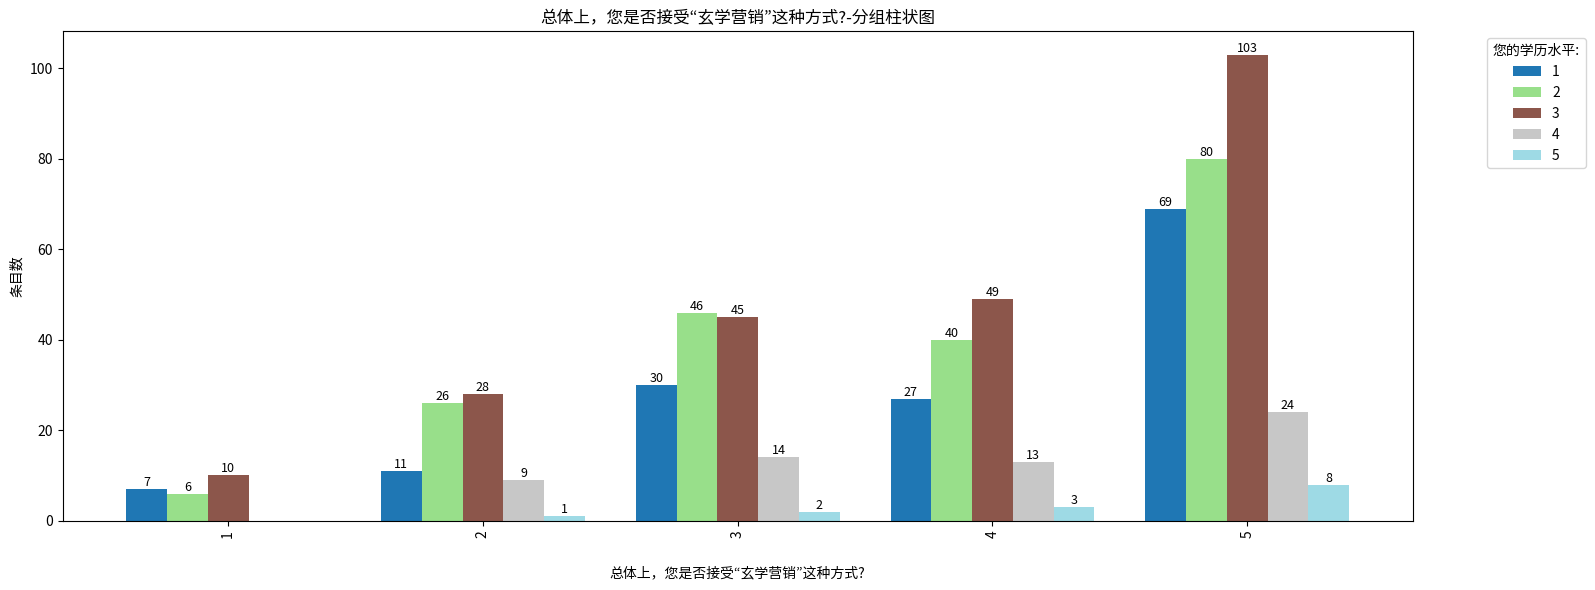

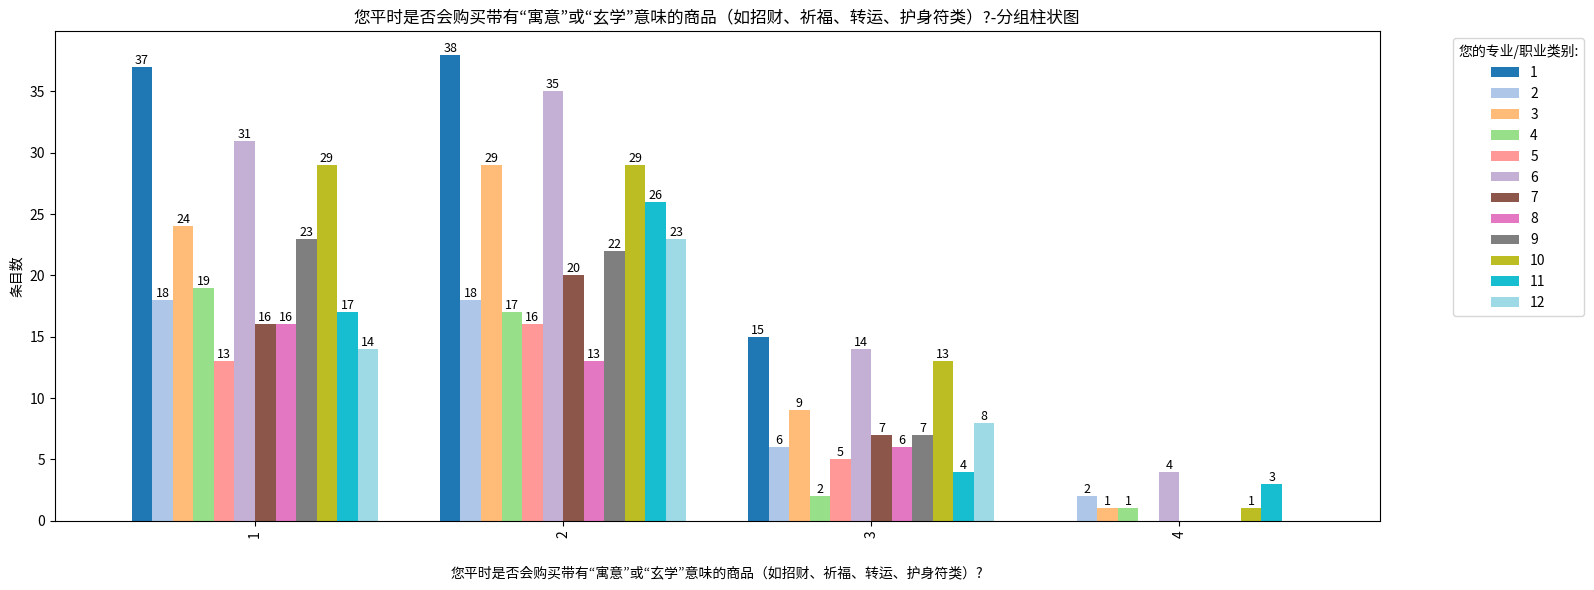

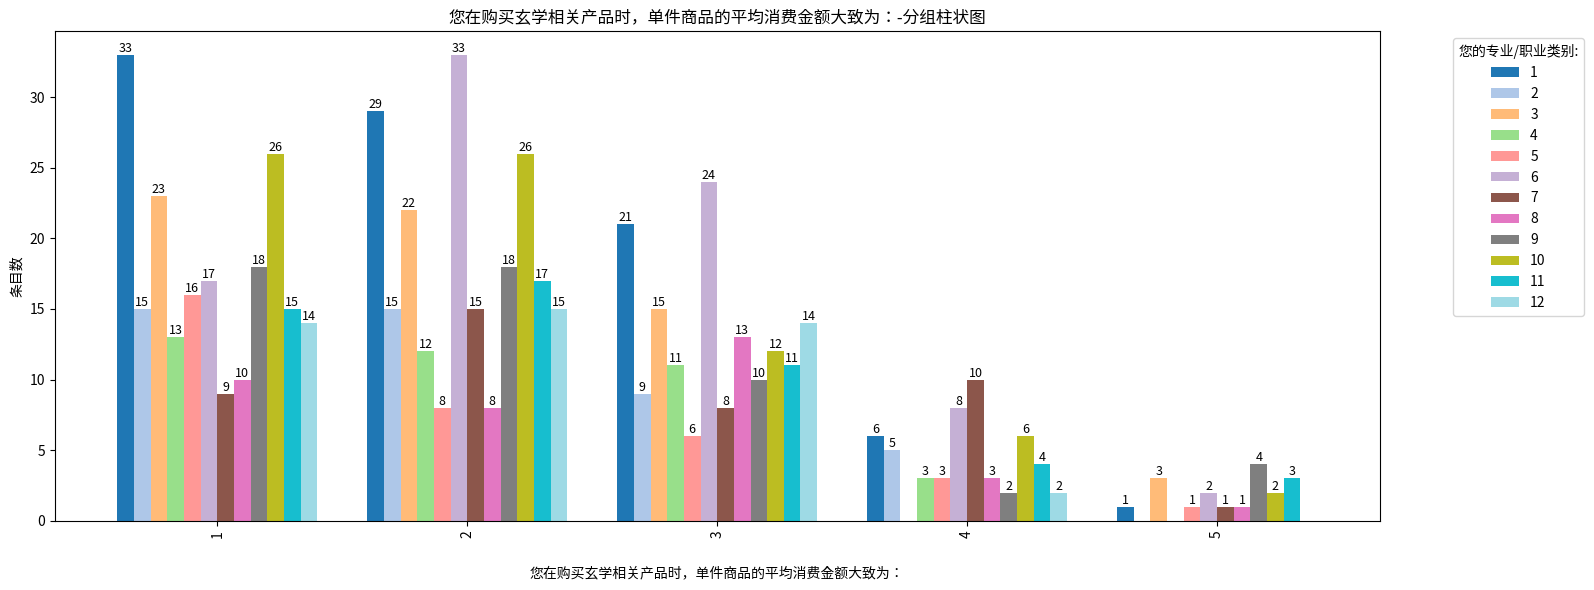

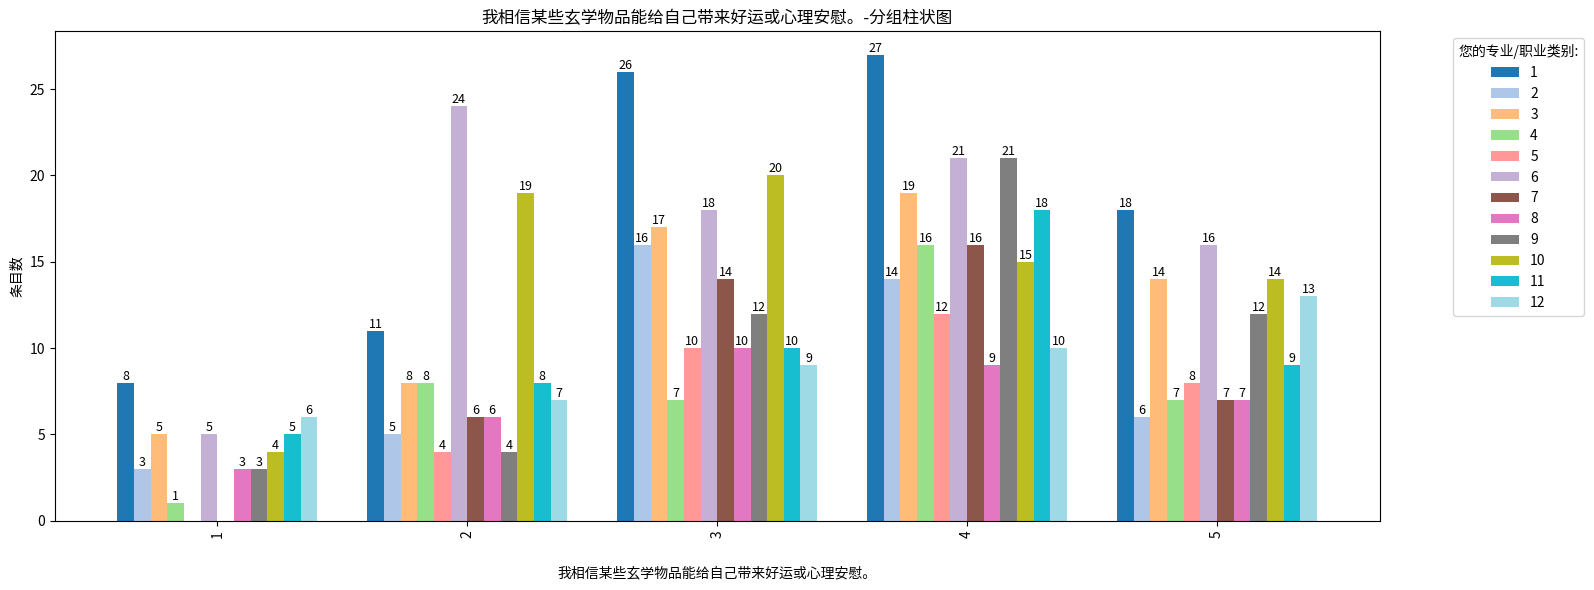

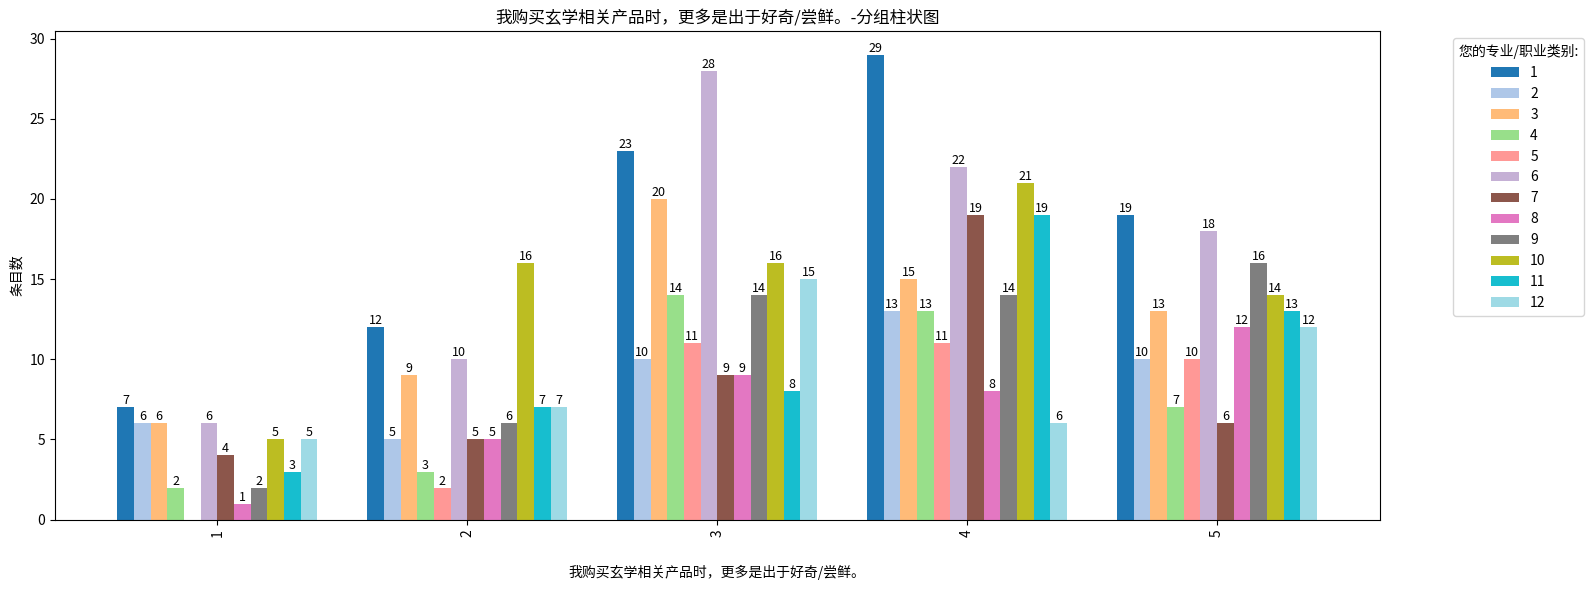

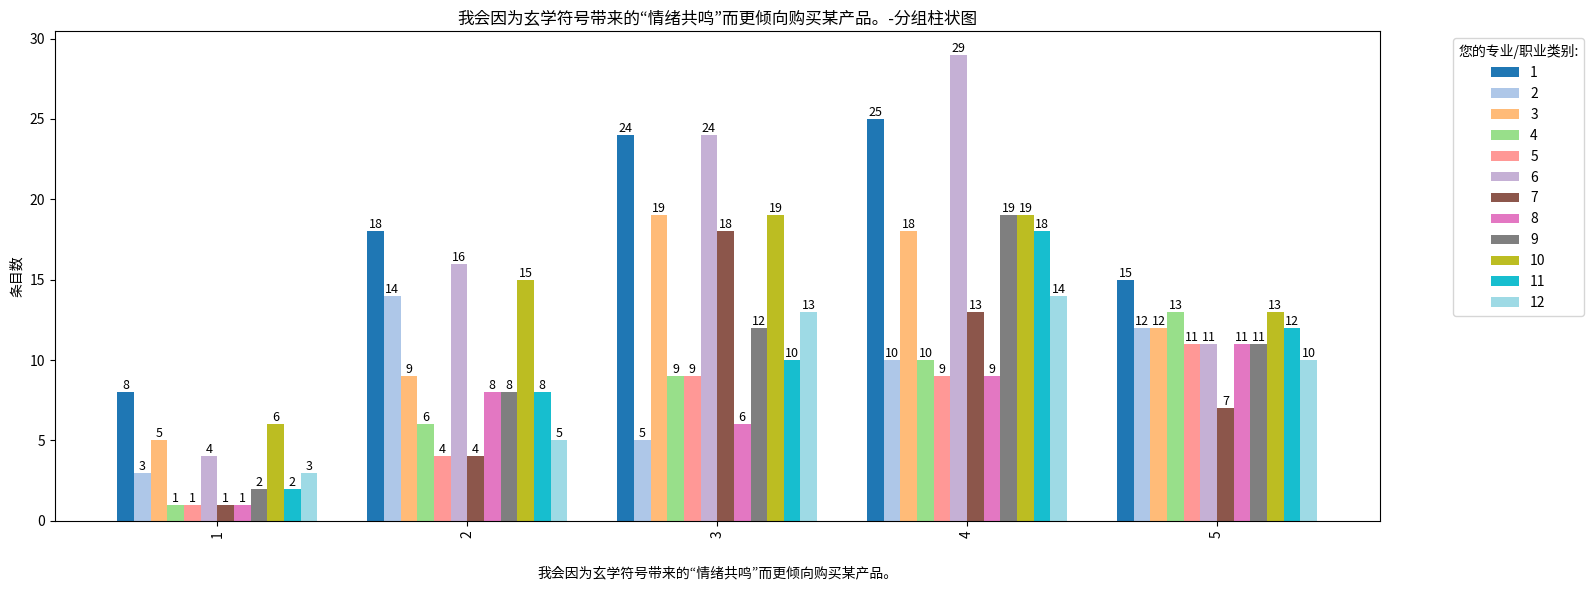

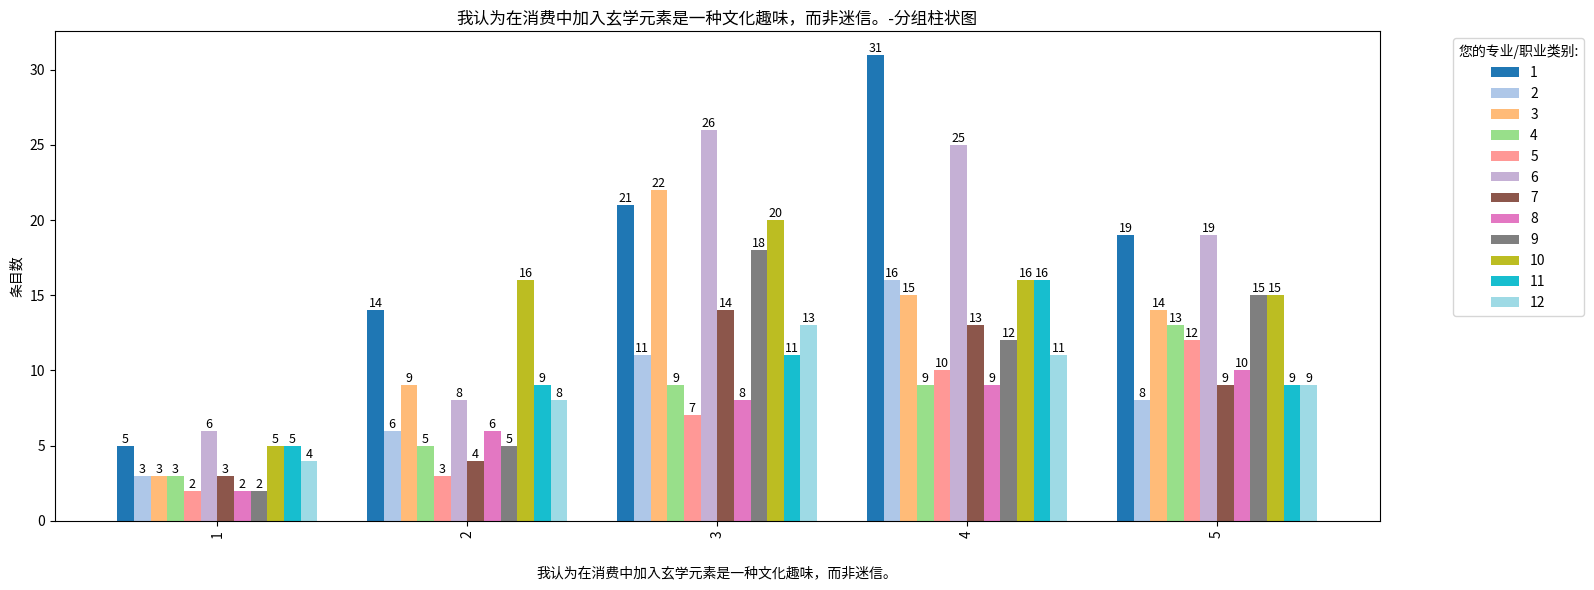

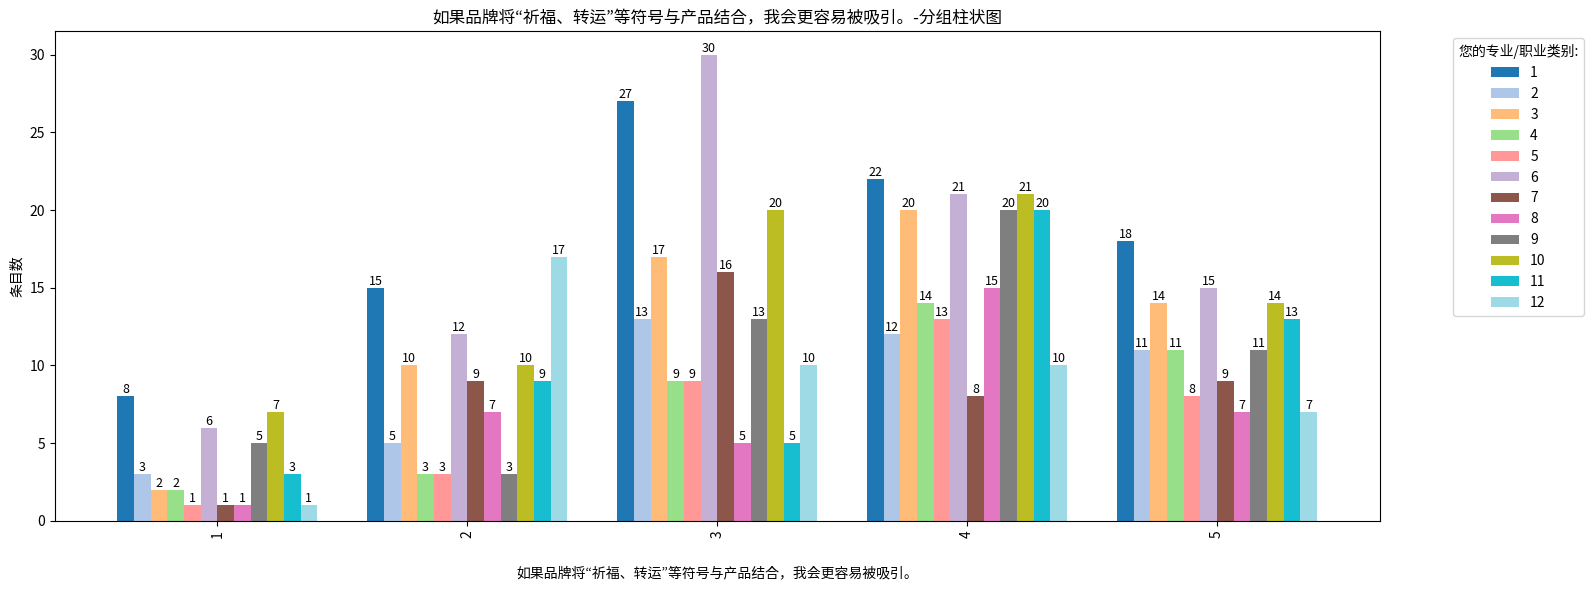

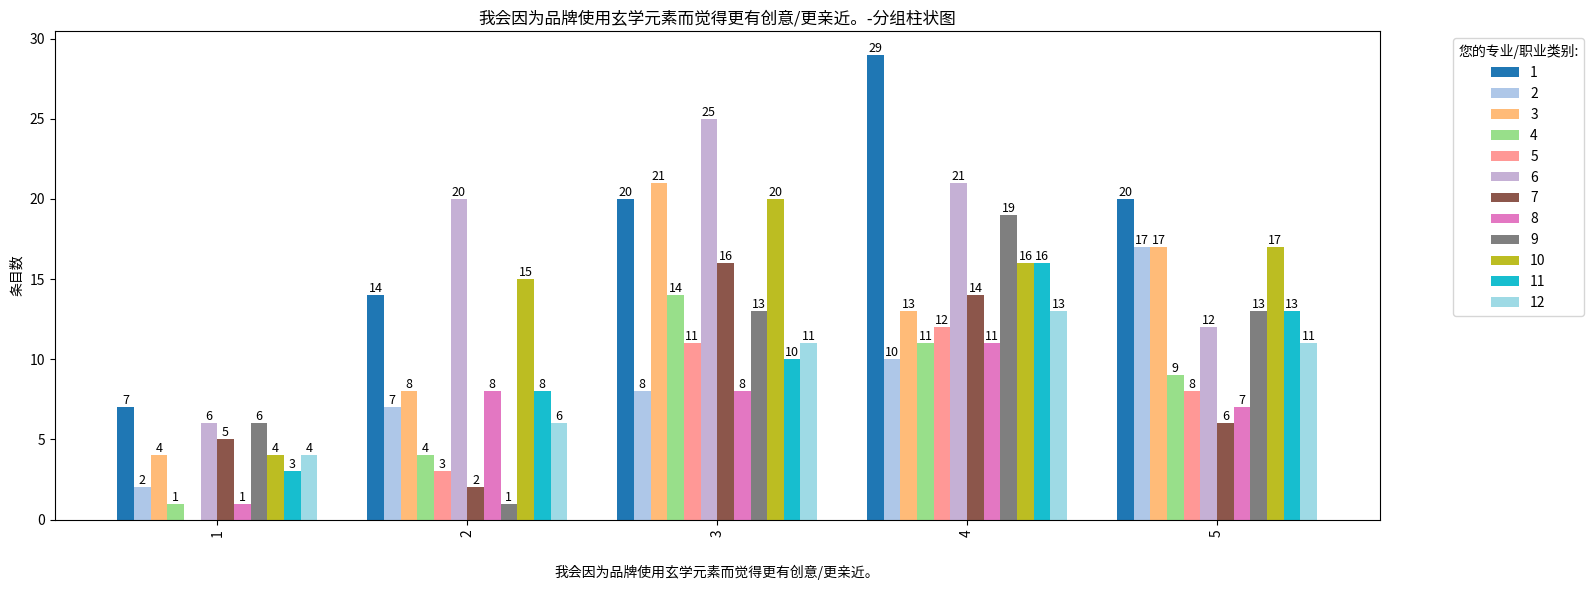

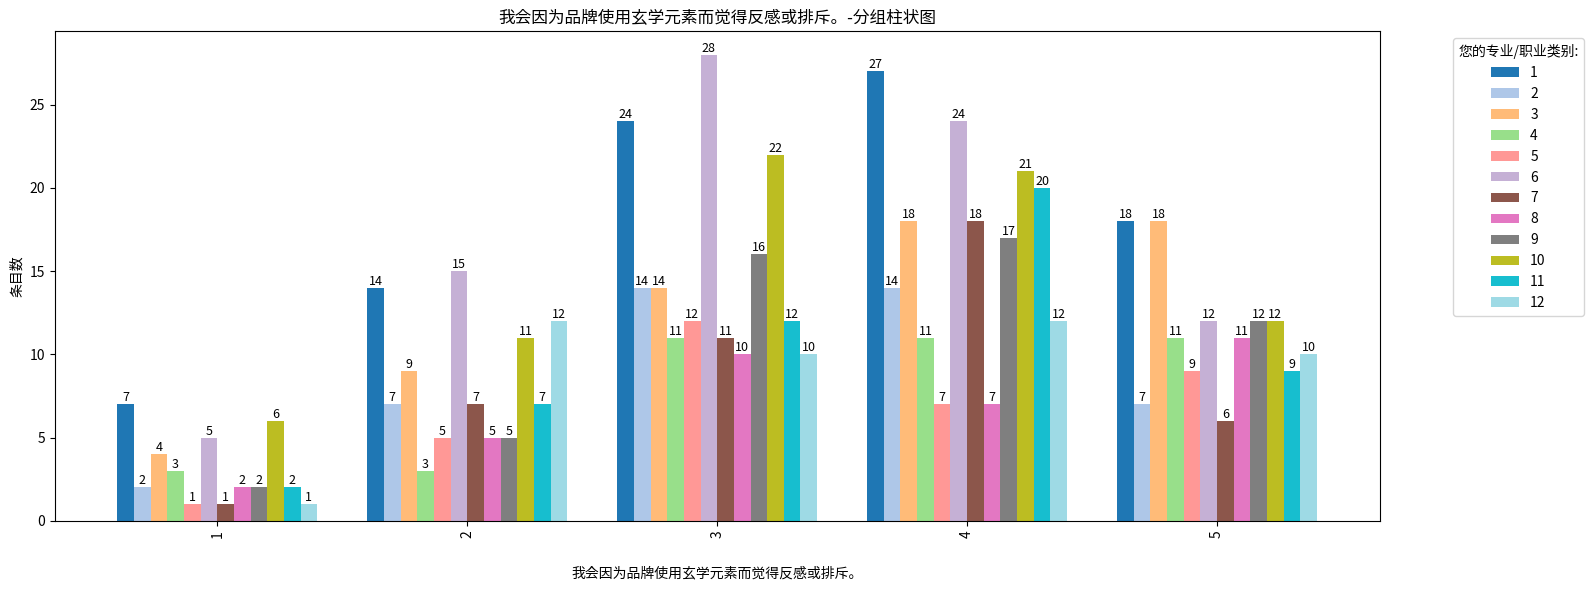

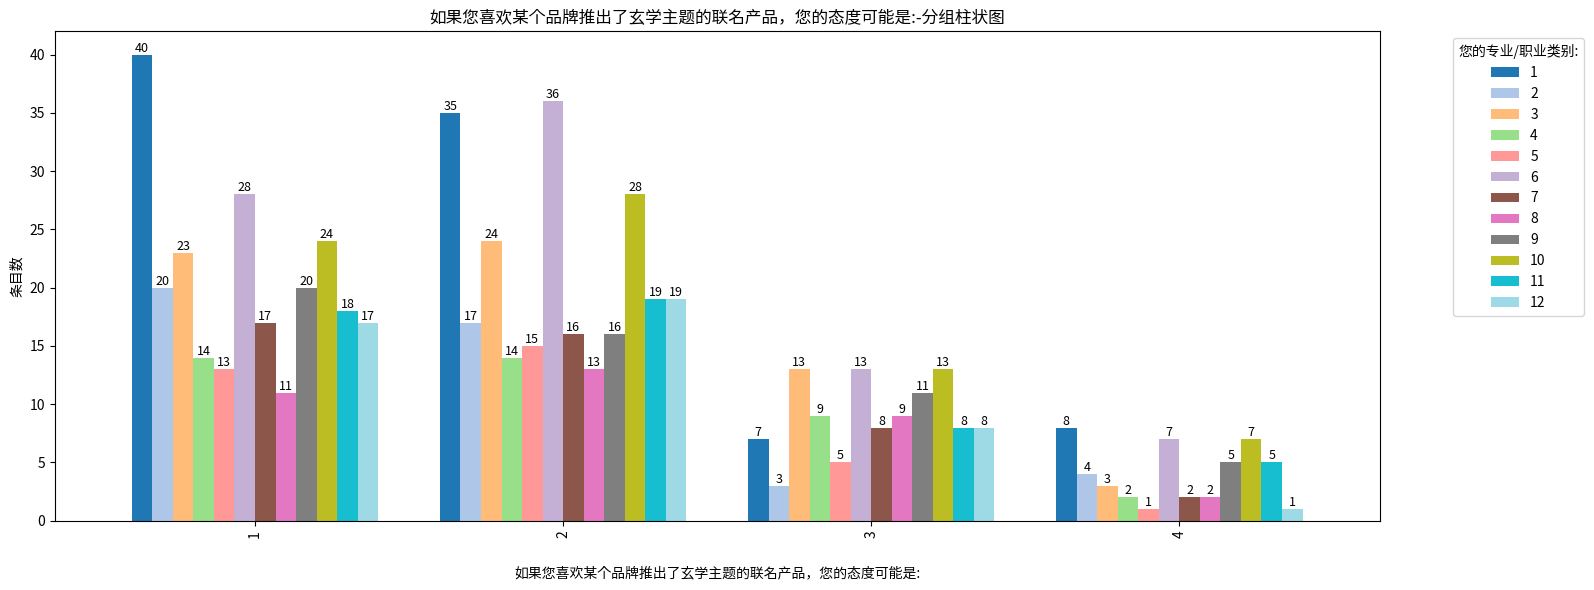

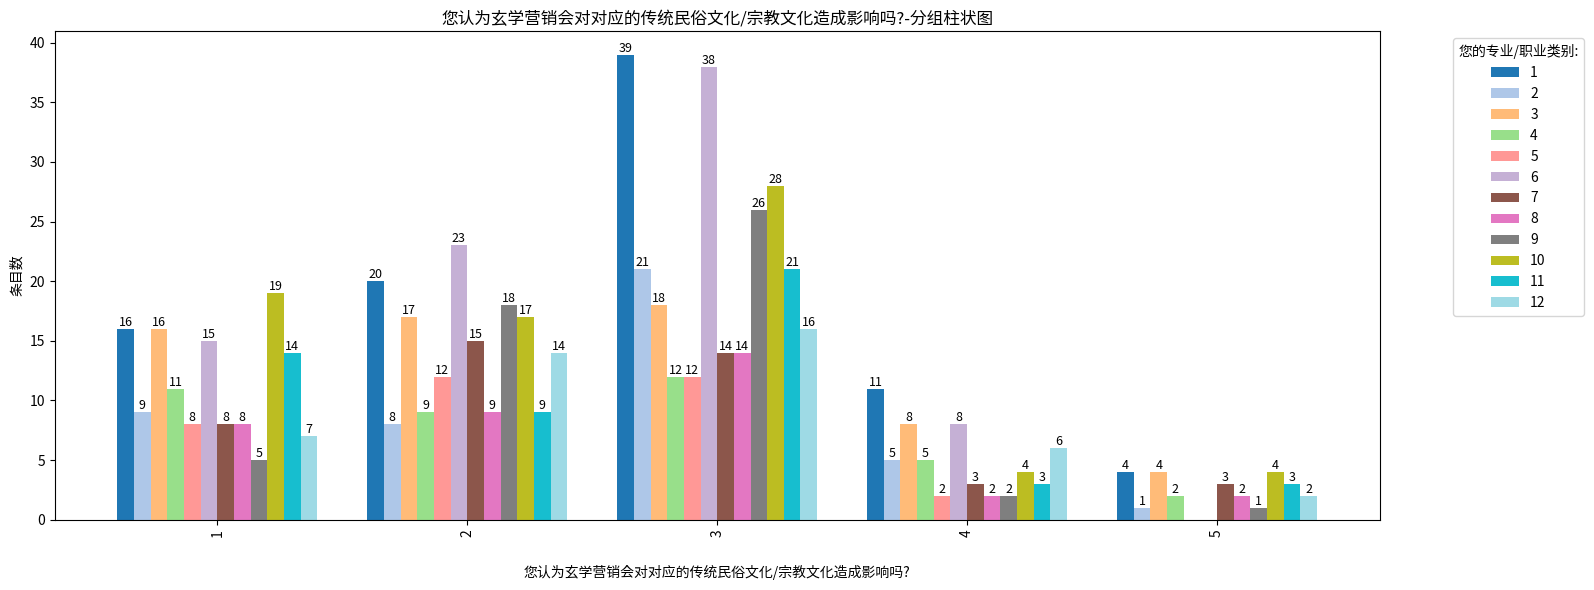

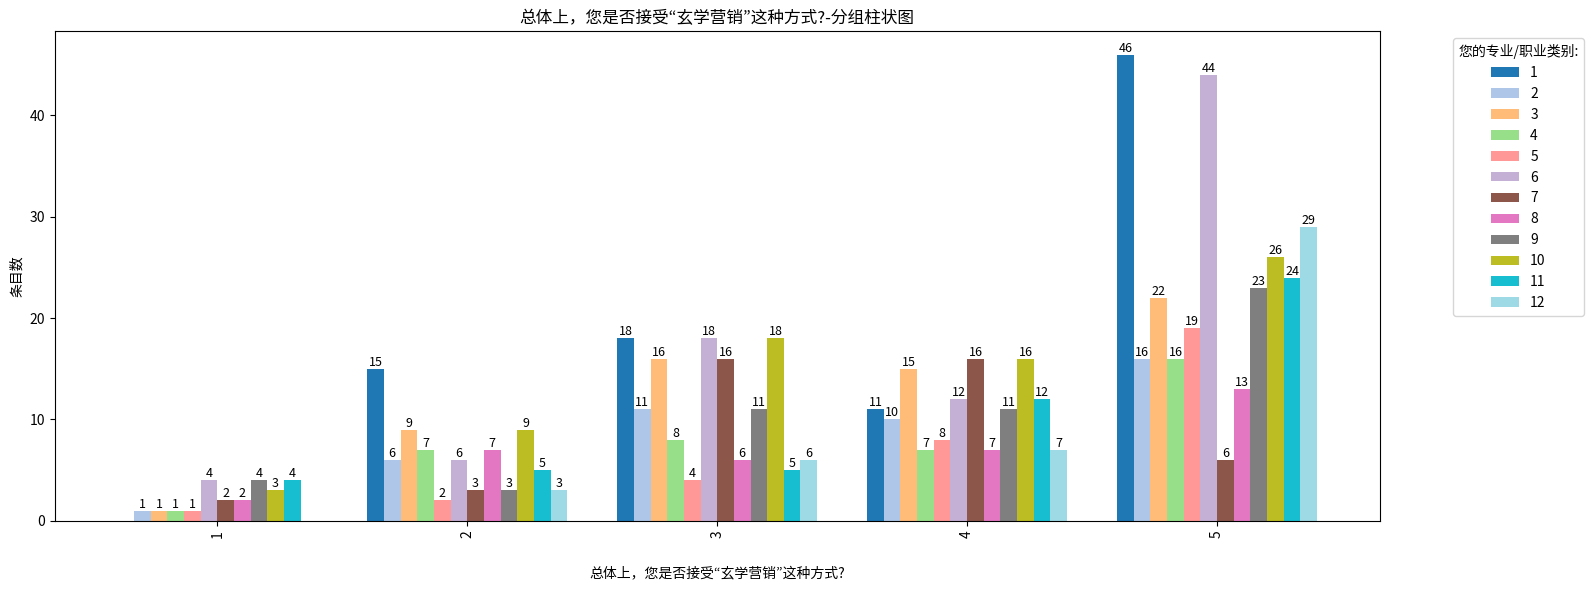

In [180]:
from itertools import product

for cause, single_choice_effect in product(causes, single_choice_effects):
    index_axis = df.columns[single_choice_effect]
    column_axis = cause
    plot_stacked_histogram(df, index_axis, column_axis, index_axis, stacked=False)

## Multi choice effect distribution versus cause

In [ ]:
def plot_stacked_histogram_for_multi(
    df: pd.DataFrame,
    index_axis,
    column_axis,
    index_axis_label,
    index_order,
    figsize=[8, 6],
    stacked=True,
    cmap="tab20",
):
    # 1. 统计每个 (y, x) 的组合出现的次数
    count_table = (
        df.groupby([index_axis, column_axis])
        .size()
        .unstack(fill_value=0)
        .reindex(index_order)
    )

    num_x = len(count_table.columns)
    num_y = len(count_table.index)
    width_density = 0.8 / 4
    if not stacked:
        width = min(width_density * num_x, 0.8)  # 越多类别，柱越细，但不小于 0.05
        fig_width = max(width_density * (num_x * num_y), 8)
        figsize[0] = fig_width
        # 2. 绘制堆叠柱状图
        ax = count_table.plot(
            kind="bar",
            figsize=figsize,
            stacked=stacked,
            width=width,
            colormap=cmap,  # 颜色方案，可根据喜好调整
            edgecolor=None,
        )
    else:
        fig_height = num_x * 1  # 类别越多，画布自动变宽
        figsize[1] = max(fig_height, 8)
        ax = count_table.plot(
            kind="bar",
            figsize=figsize,
            stacked=stacked,
            colormap=cmap,  # 颜色方案，可根据喜好调整
            edgecolor=None,
        )

    if stacked:
        label_type = "center"
    else:
        label_type = "edge"

    for container in ax.containers:
        if all(v == 0 for v in container.datavalues):
            continue  # 跳过整个容器（即完全为 0 的一组）
        labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type=label_type, fontsize=9)
    # 3. 设置图形样式
    ax.set_xticklabels([normalize_name(column_name)[0] for column_name in index_order])
    plt.xticks(rotation=60, ha="right")
    # plt.xlabel(index_axis_label, labelpad=20)
    plt.ylabel("条目数")
    if stacked:
        plt.title(f"{index_axis_label}-堆叠柱状图")
    else:
        plt.title(f"{index_axis_label}-分组柱状图")
    plt.legend(title=column_axis, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

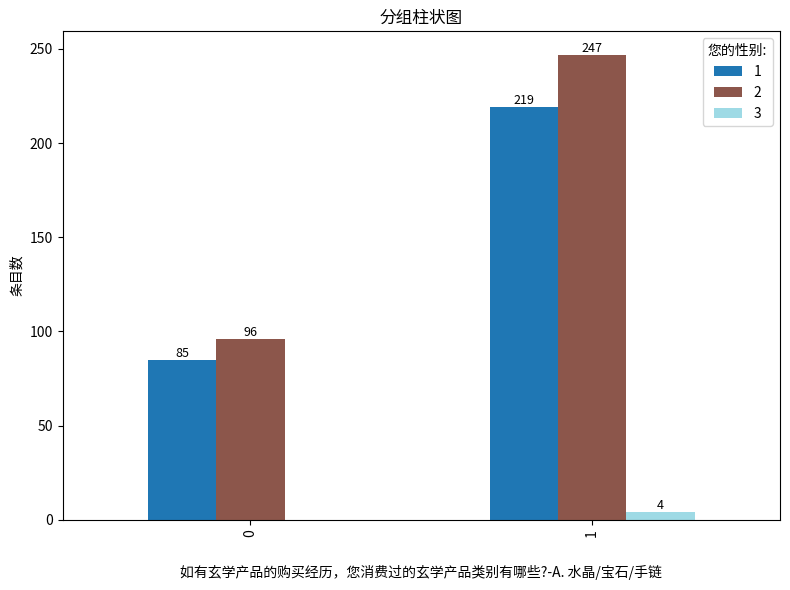

In [ ]:
# for name, choices in multi_choice_effects.items():
#     for cause, choice in product(causes, choices):
#         index_axis = df.columns[choice]
#         column_axis = cause
#         choice_name = idx_to_label(choice)
#         plot_stacked_histogram(
#             df, index_axis, column_axis, f"{name}-{choice_name}", stacked=False
#         )
#         break
#     break

If we draw a diagram for each choice in a multi-choice effect, we would only have yes/no-distribution, which is kind of waste of room. So we melt the dataframe to merge different choices yes option as different assessment of a single "merged variable", i.e. we recover the original multi-choice question and ignore the no option.

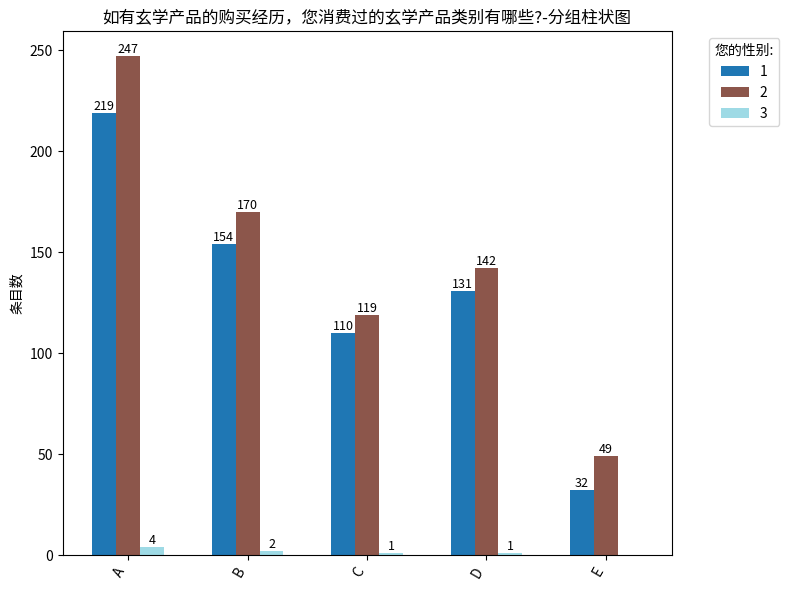

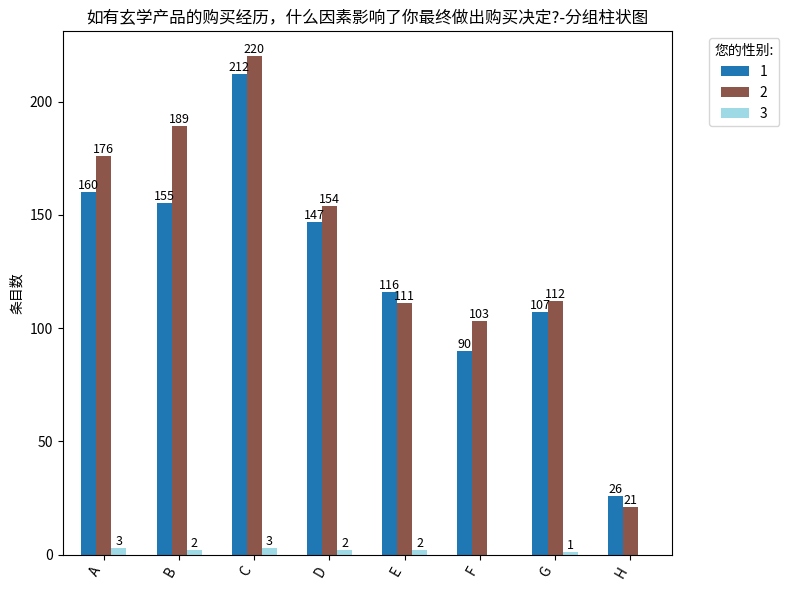

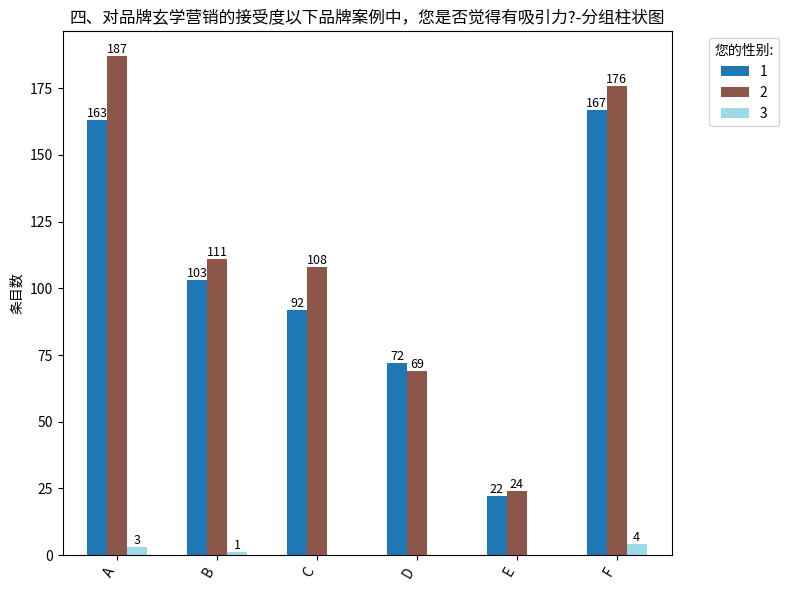

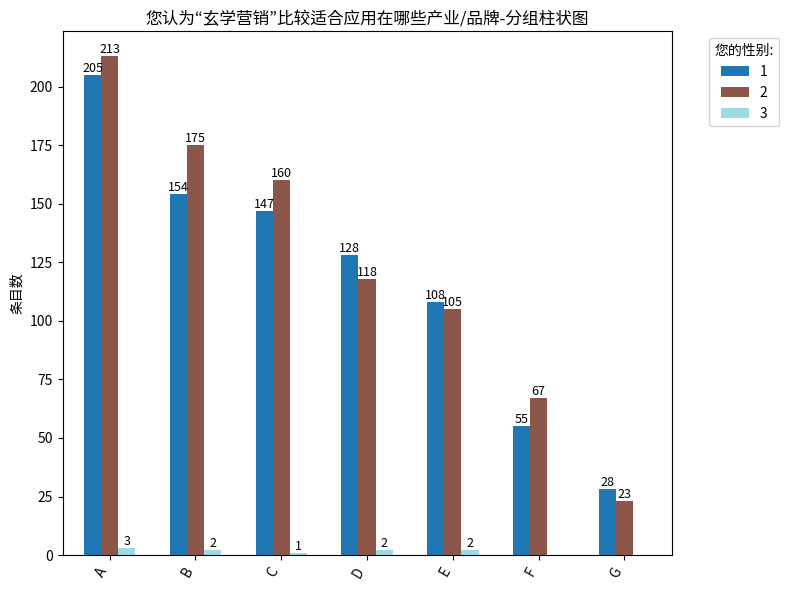

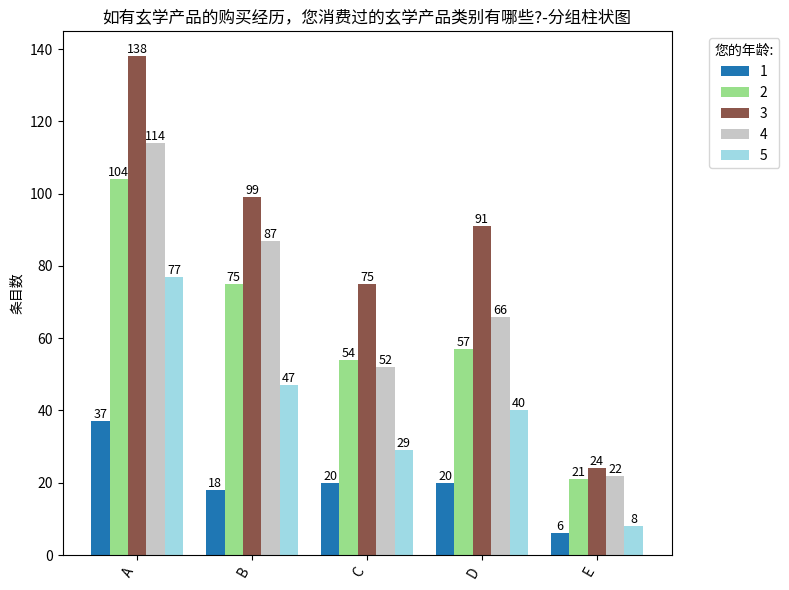

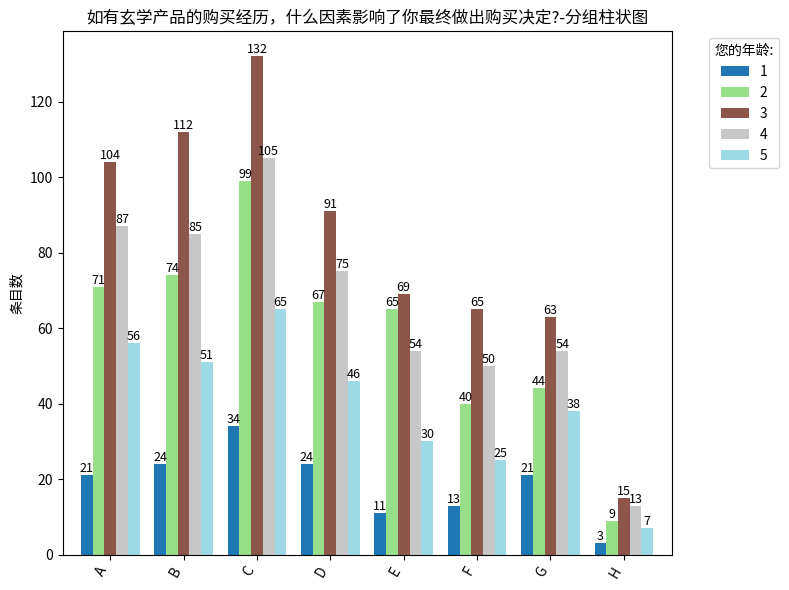

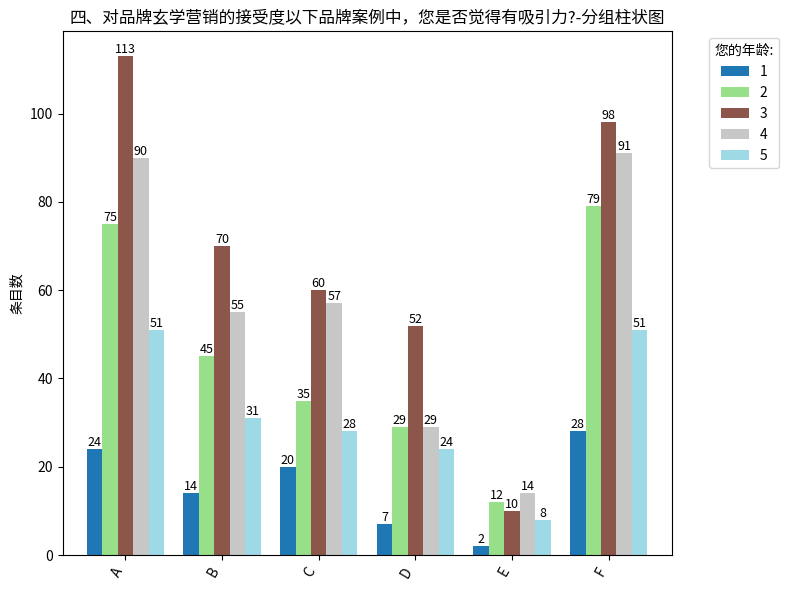

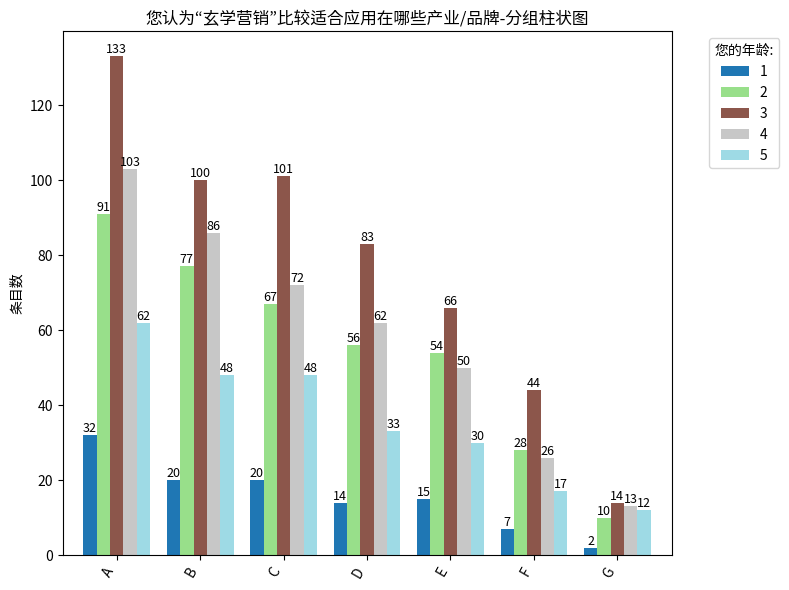

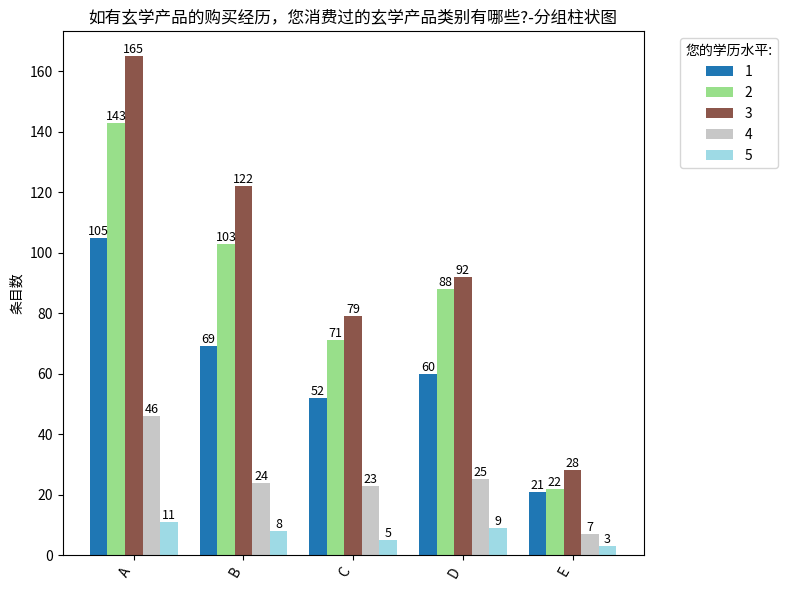

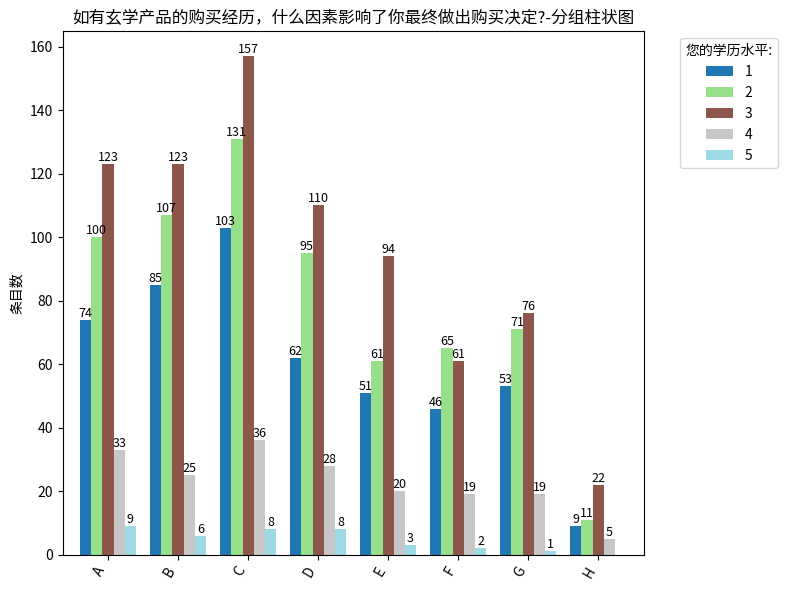

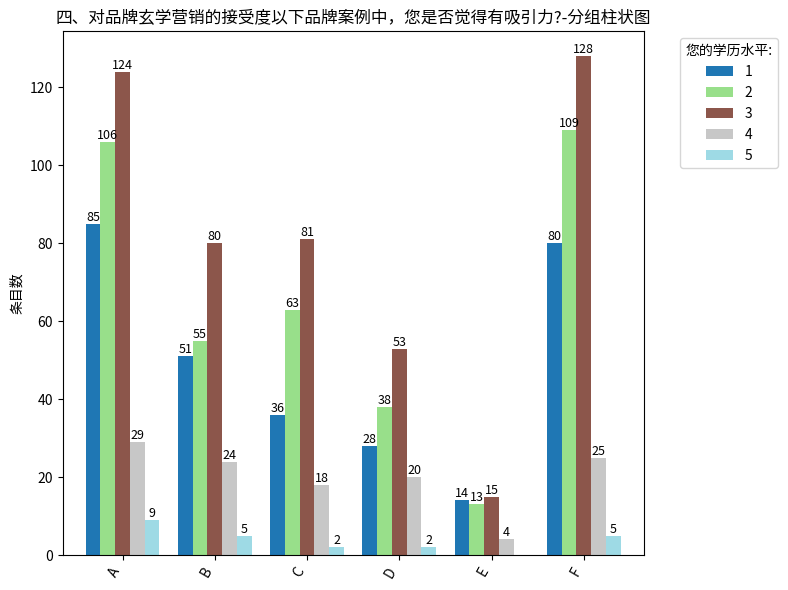

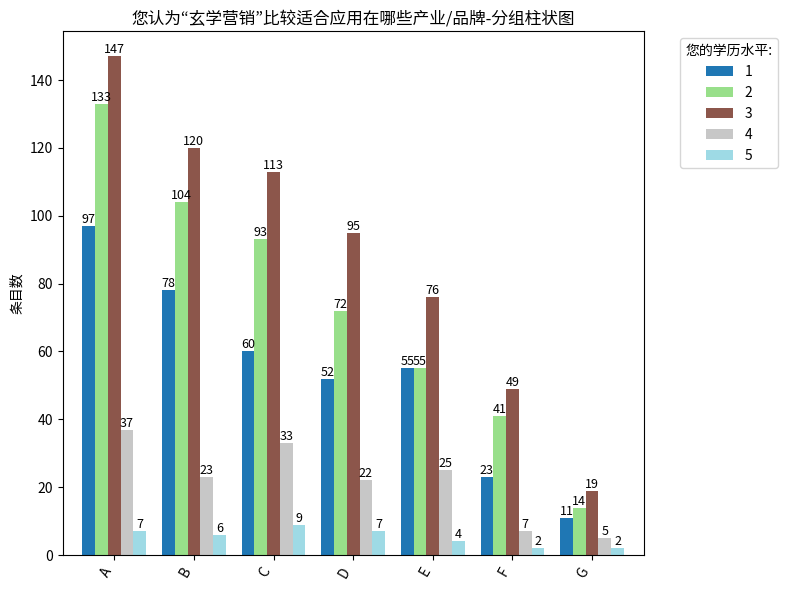

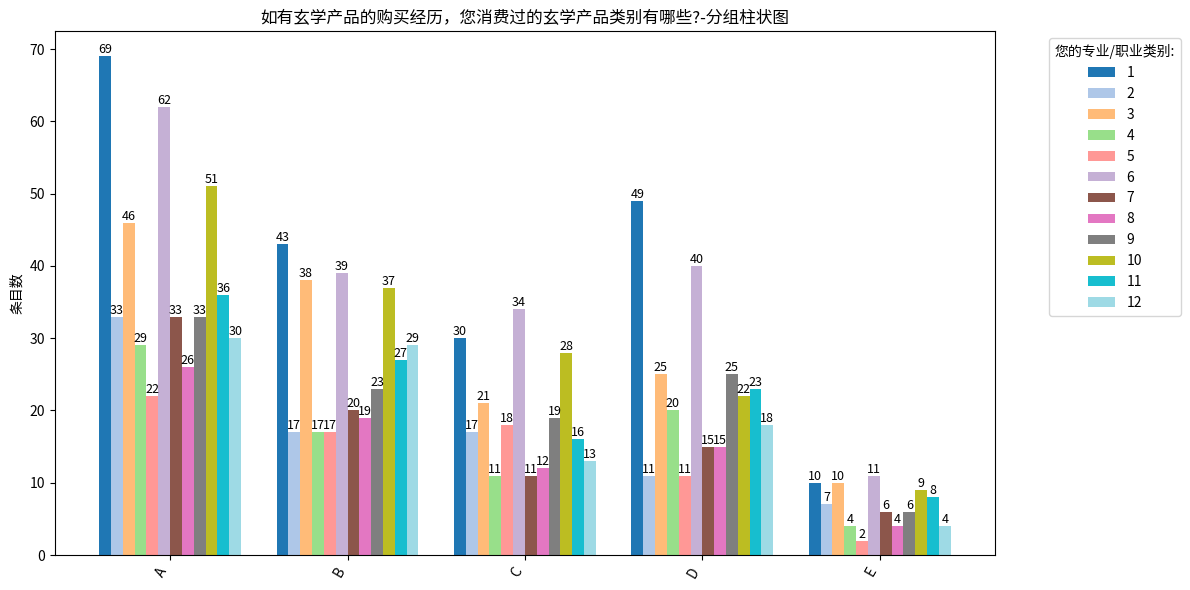

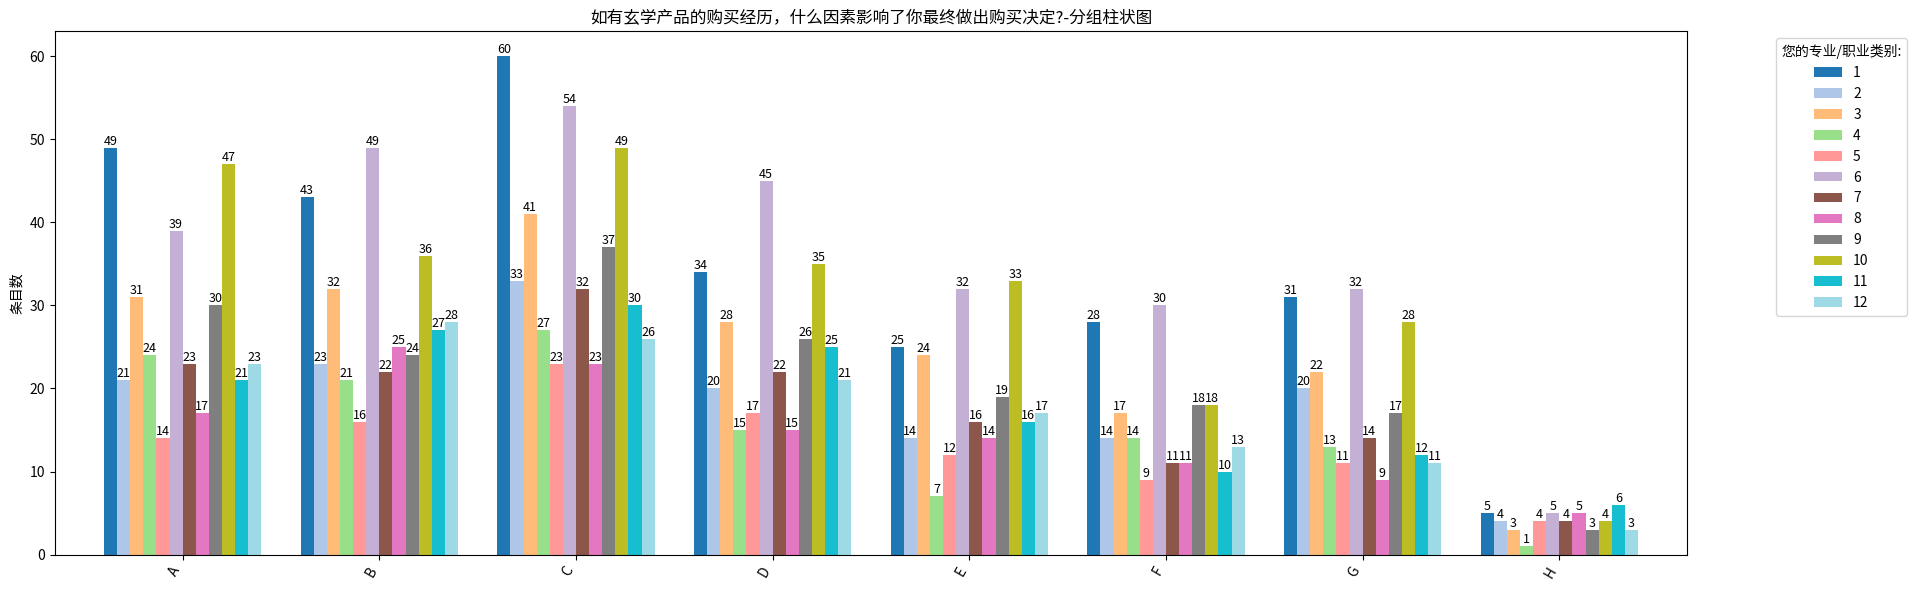

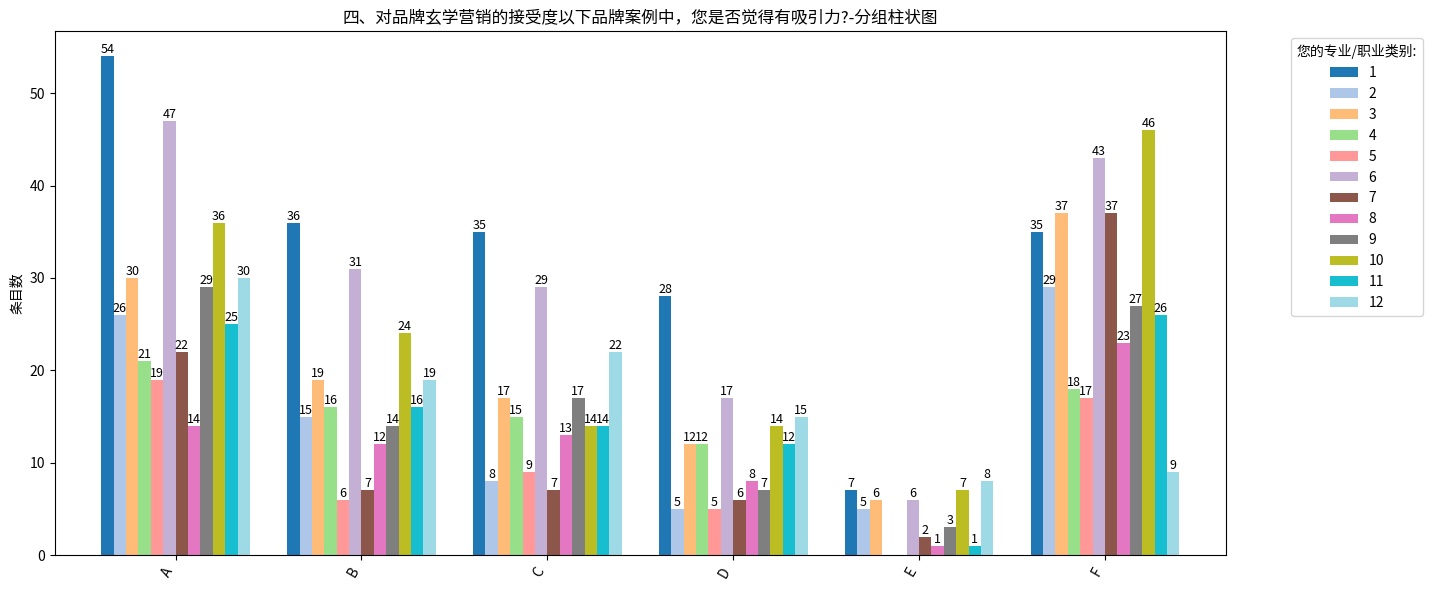

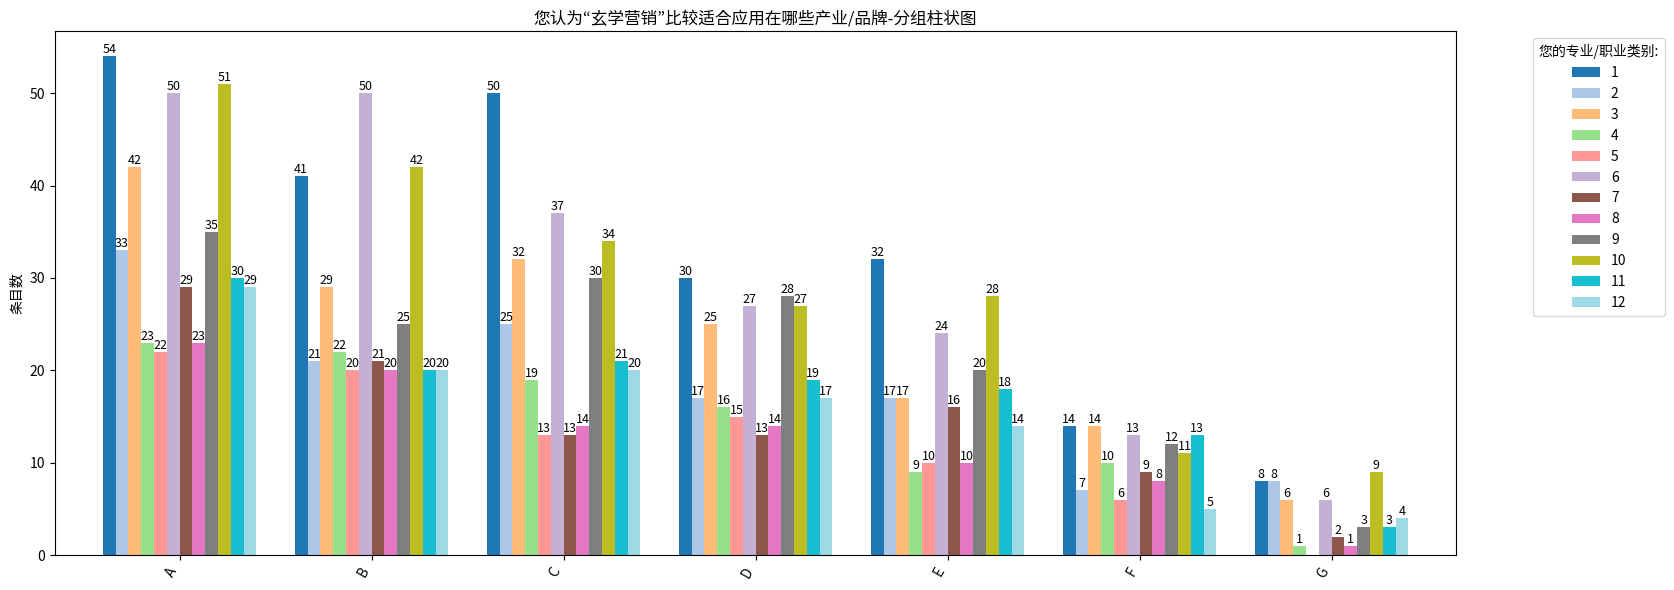

In [166]:
for cause in causes:
    for name, choices in multi_choice_effects.items():
        merged_columns = df.columns[choices]
        df_melted = df.melt(
            id_vars=cause,
            value_vars=merged_columns,
            var_name=name,
            value_name="value",
        )
        df_melted = df_melted[df_melted["value"] == 1]
        index_axis = name
        column_axis = cause
        plot_stacked_histogram_for_multi(
            df_melted,
            index_axis,
            column_axis,
            name,
            index_order=merged_columns,
            stacked=False,
        )

## Sort effect distribution versus cause

In [ ]:
sort_effects

{'您认为品牌使用“玄学营销”主要影响的是:': [41, 42, 43, 44]}

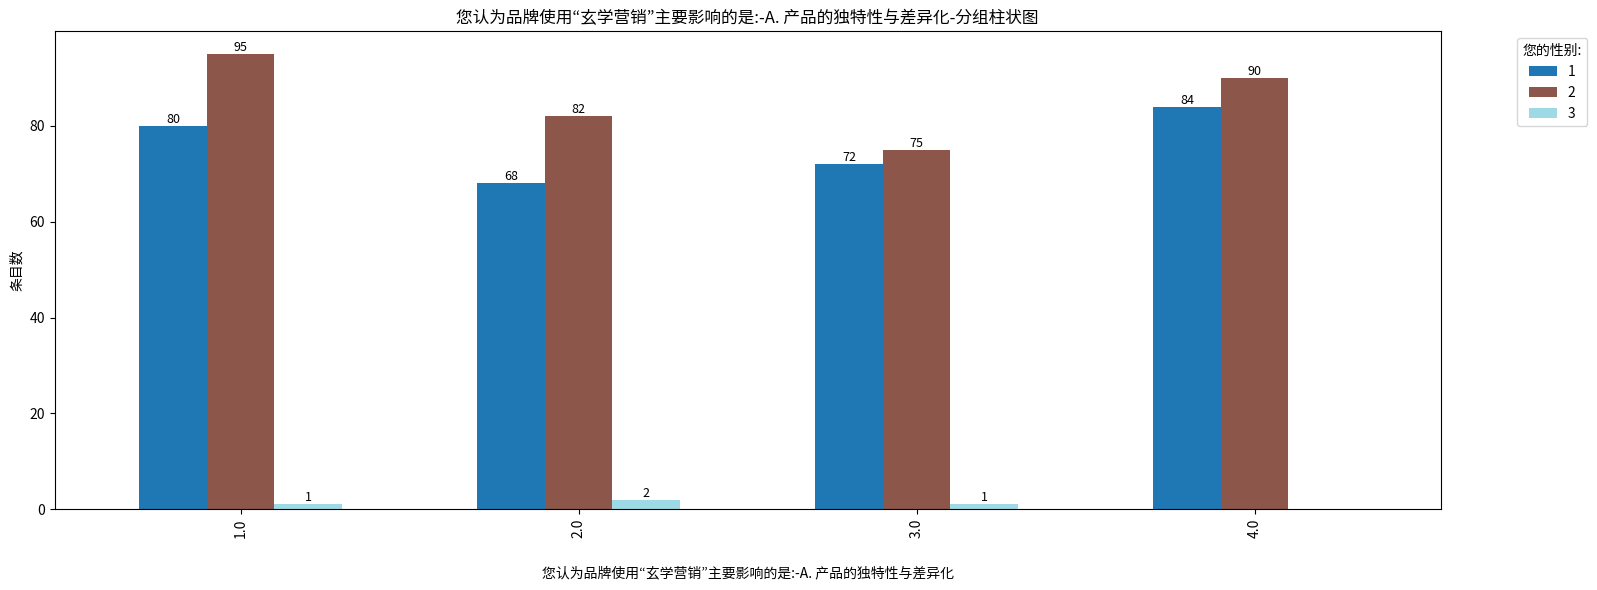

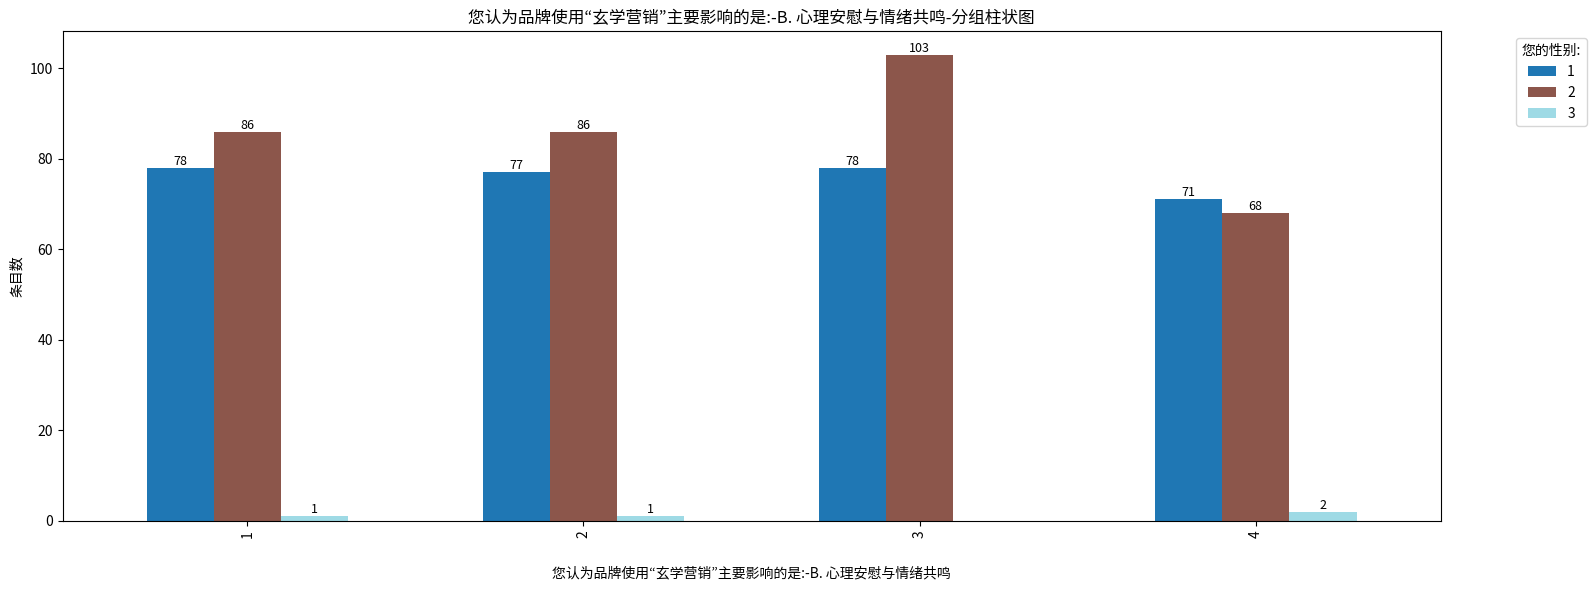

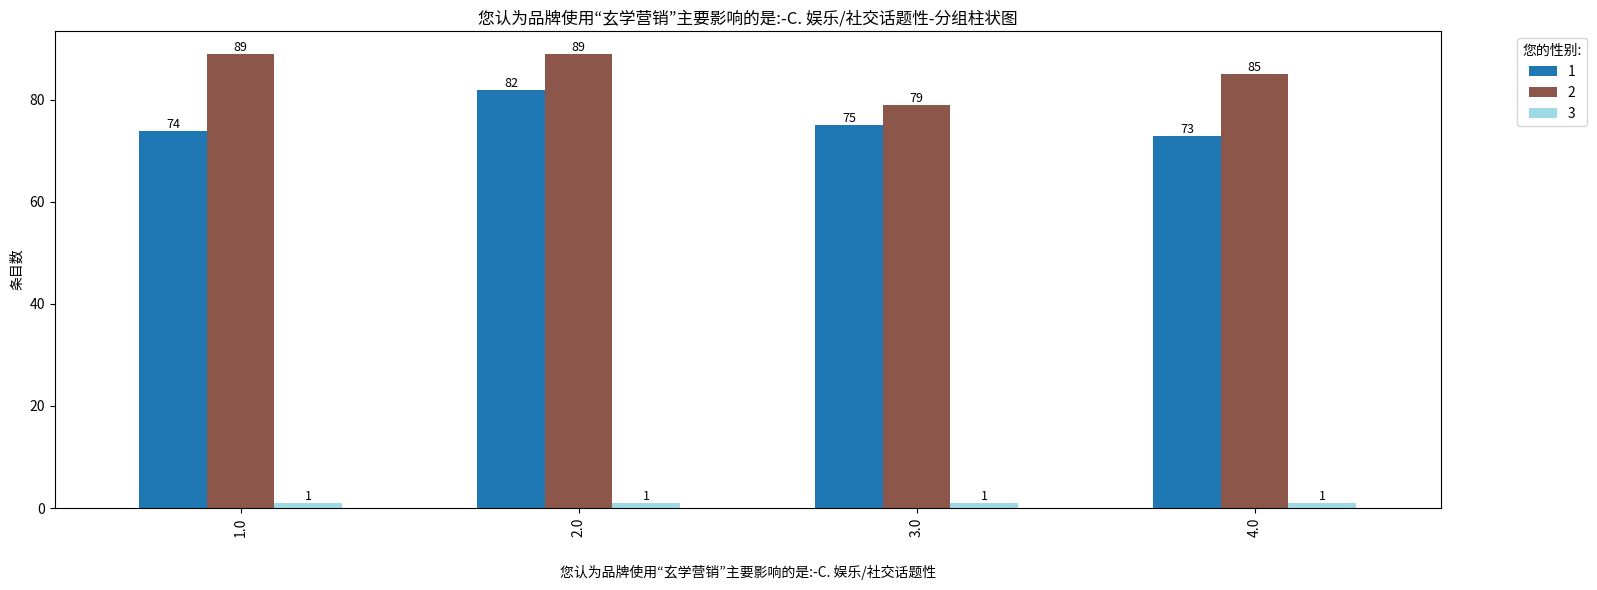

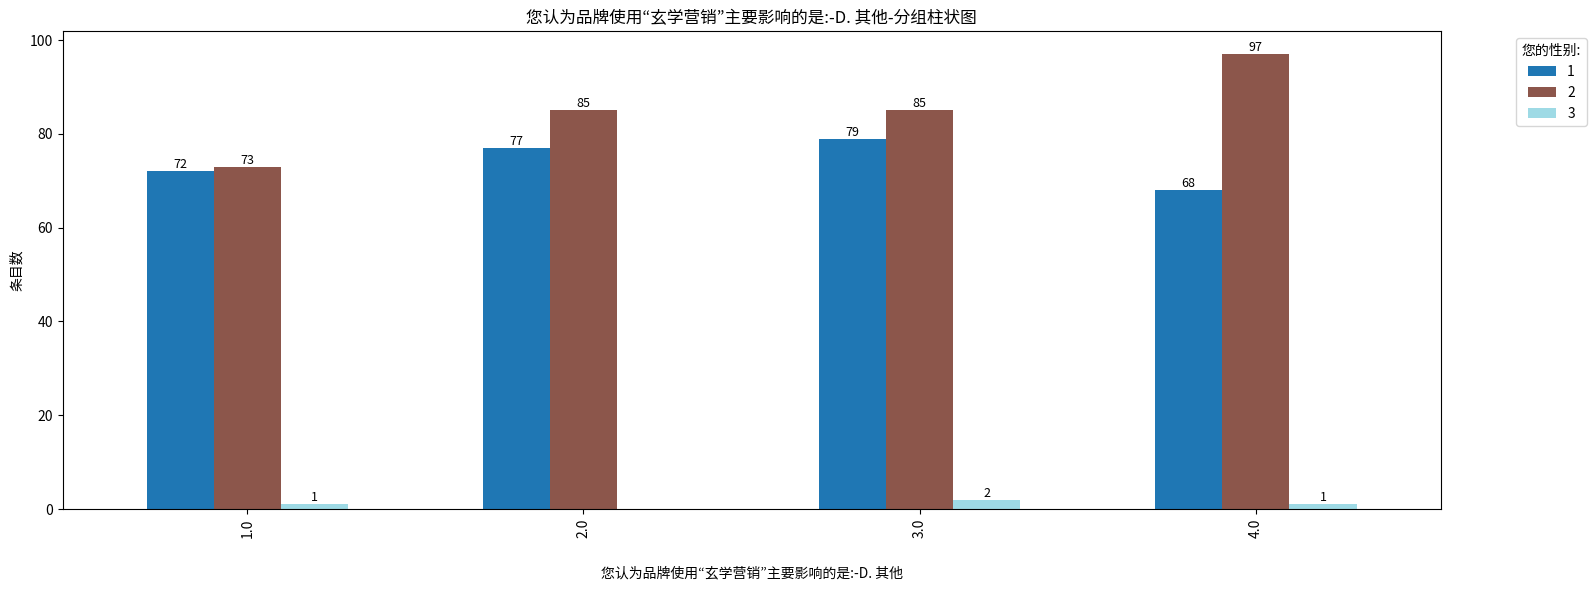

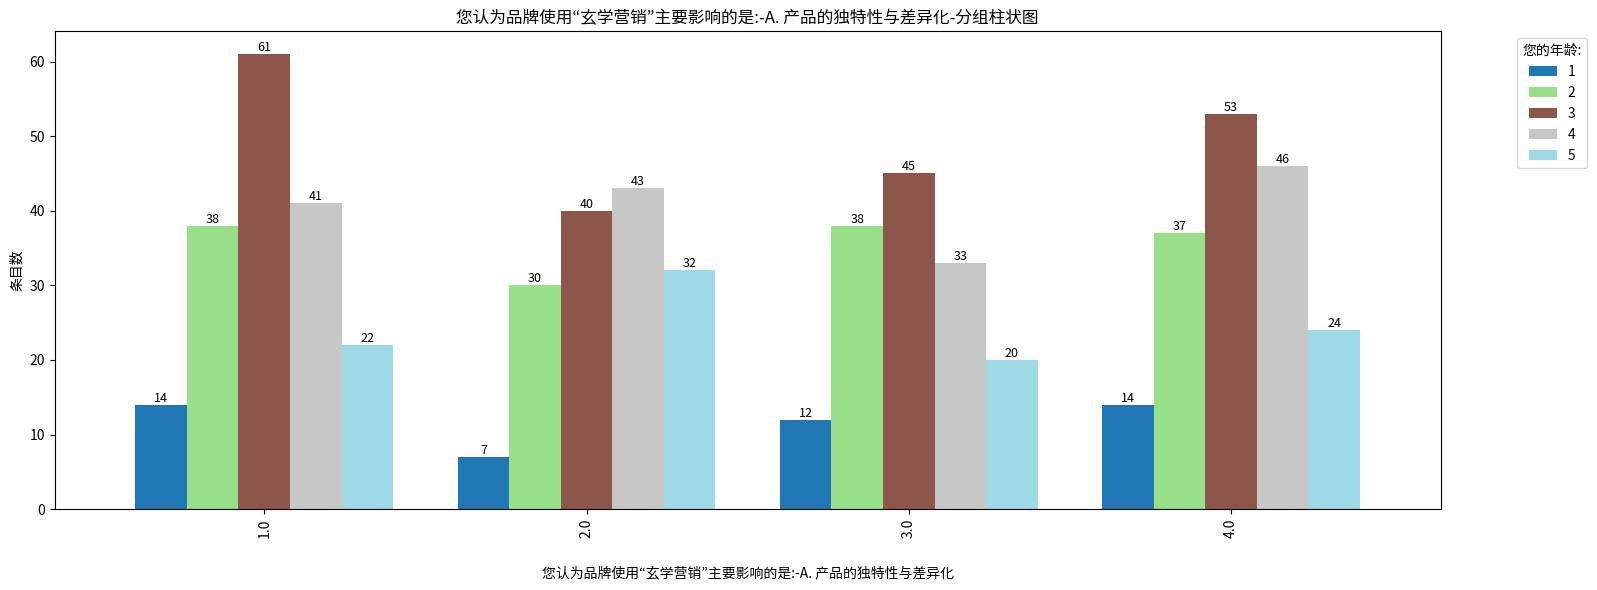

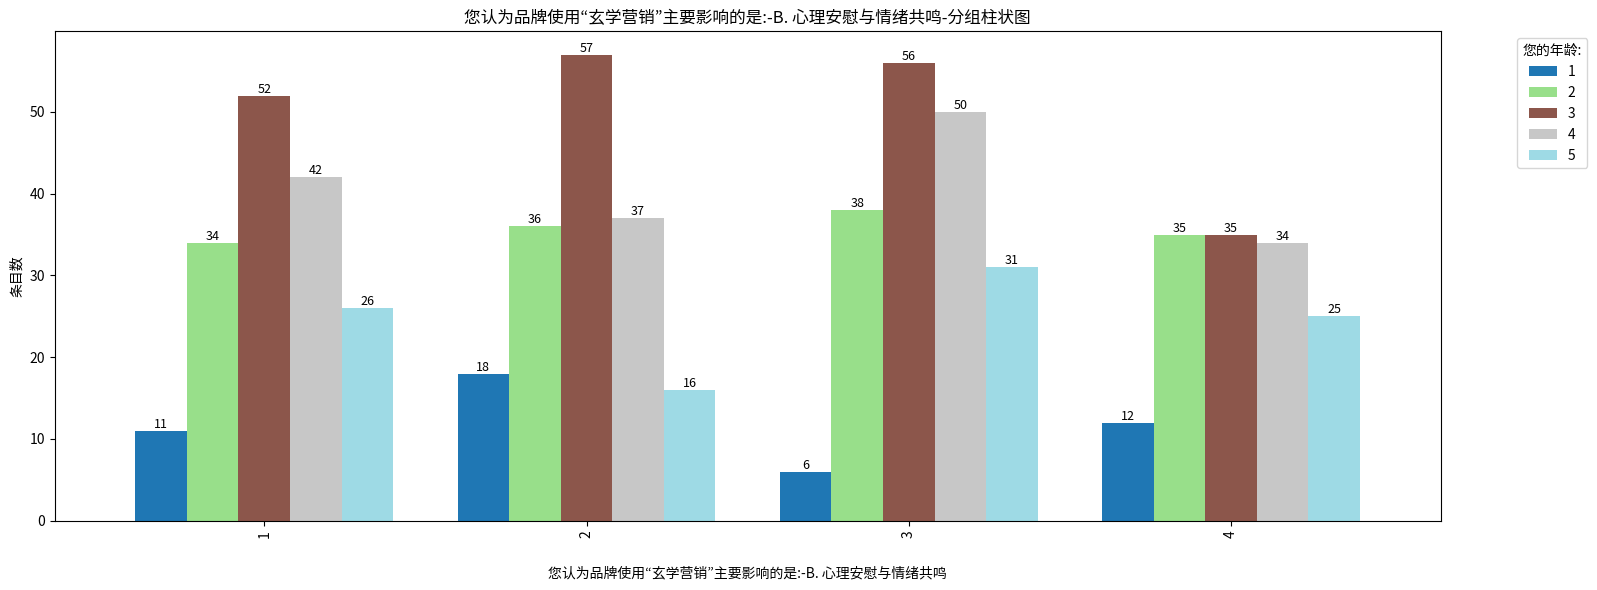

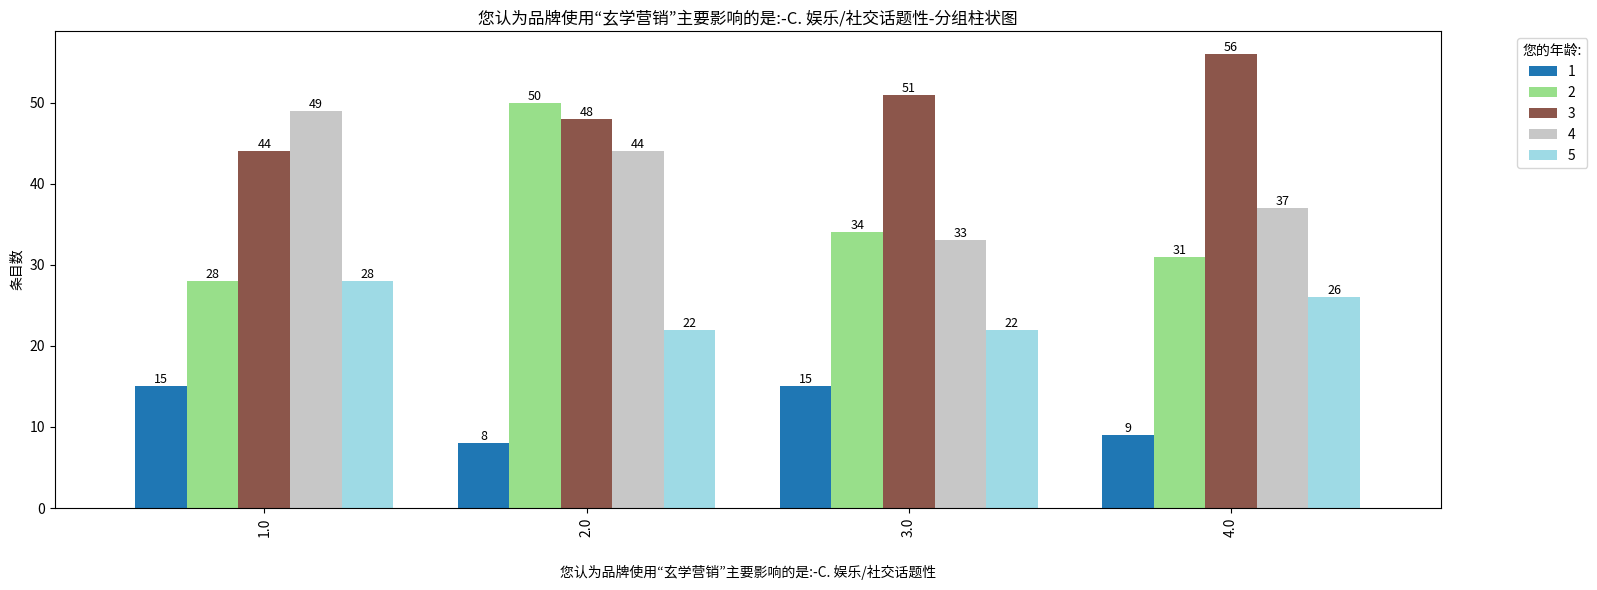

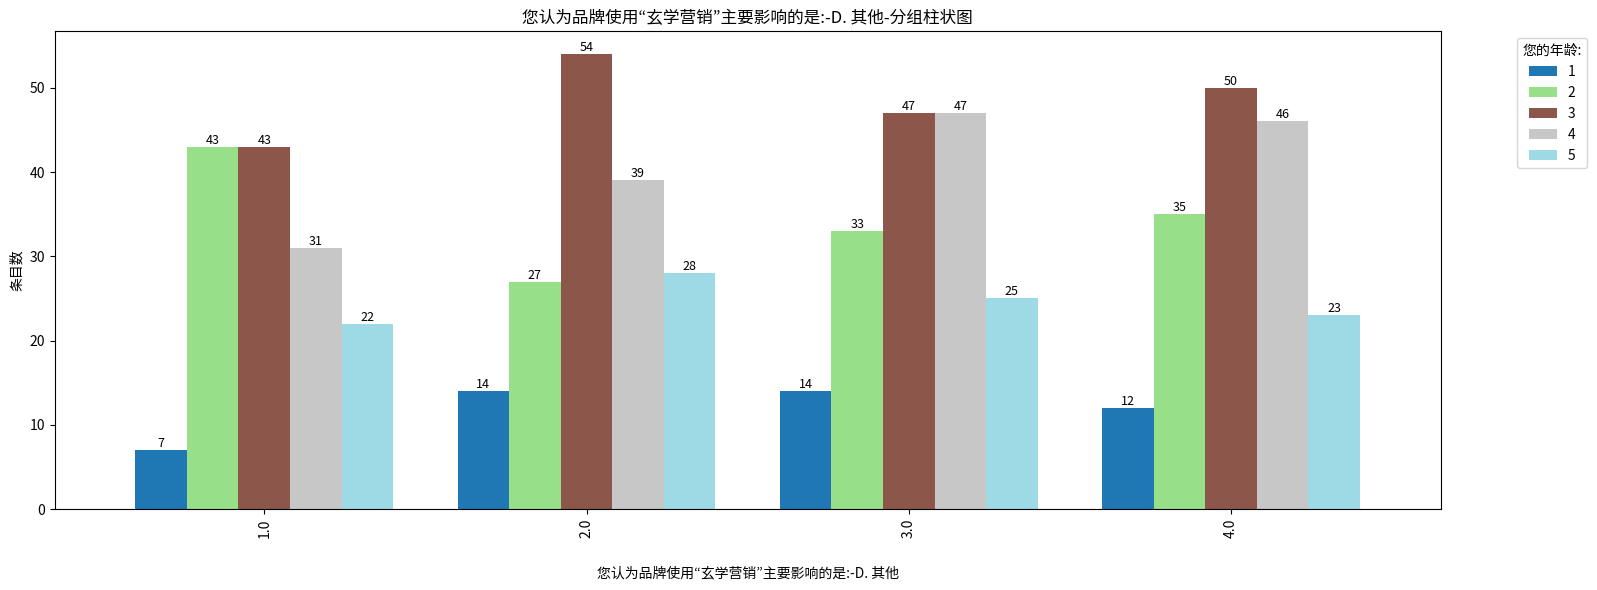

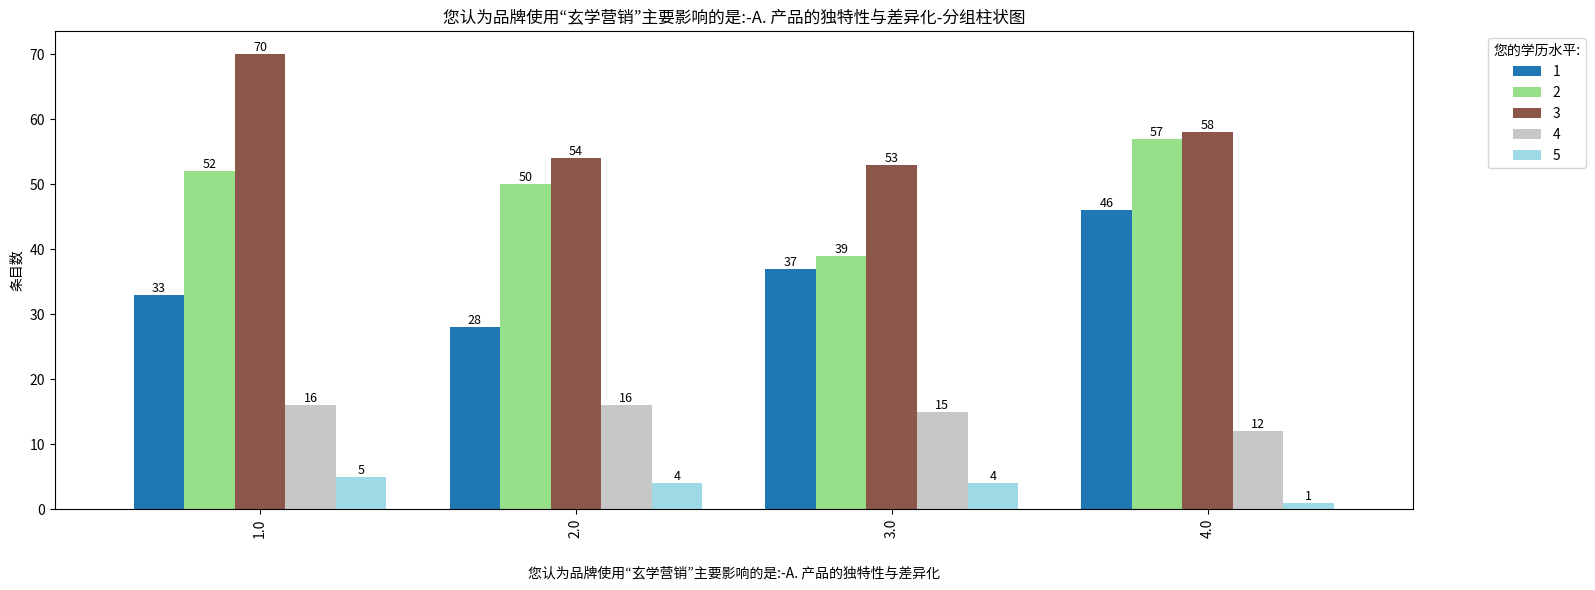

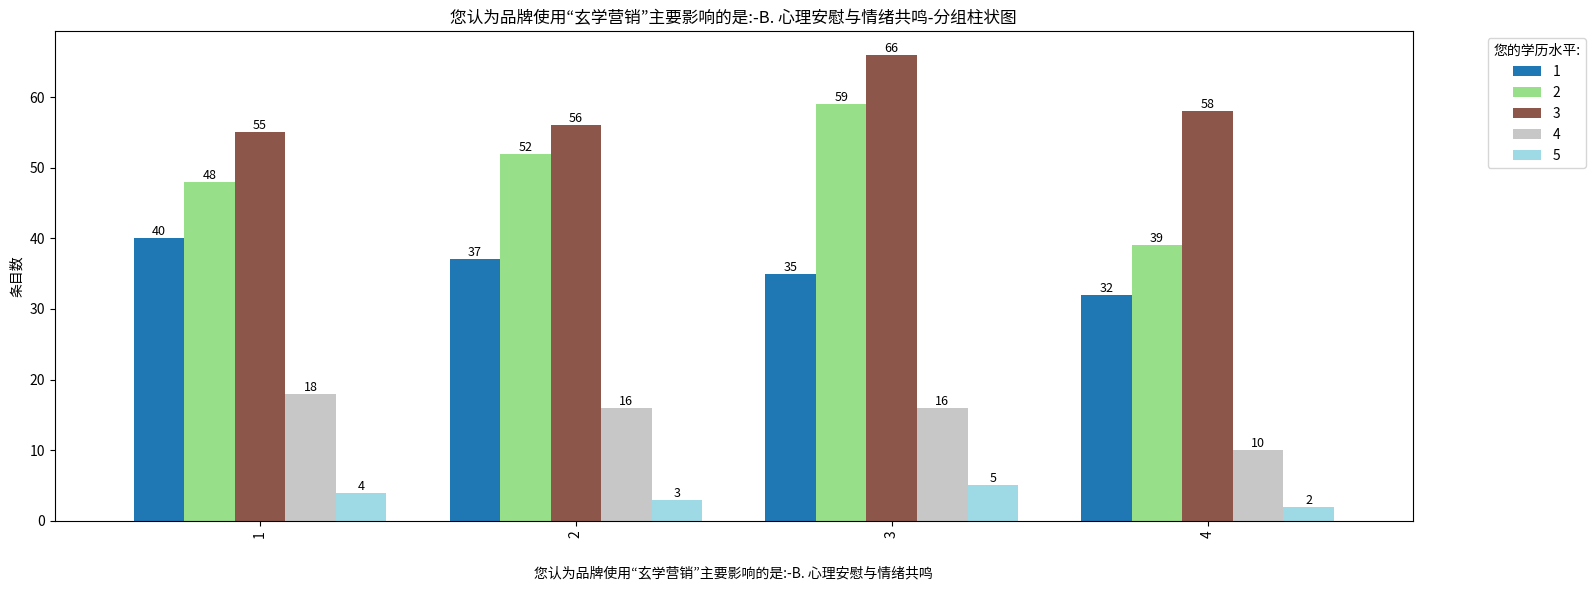

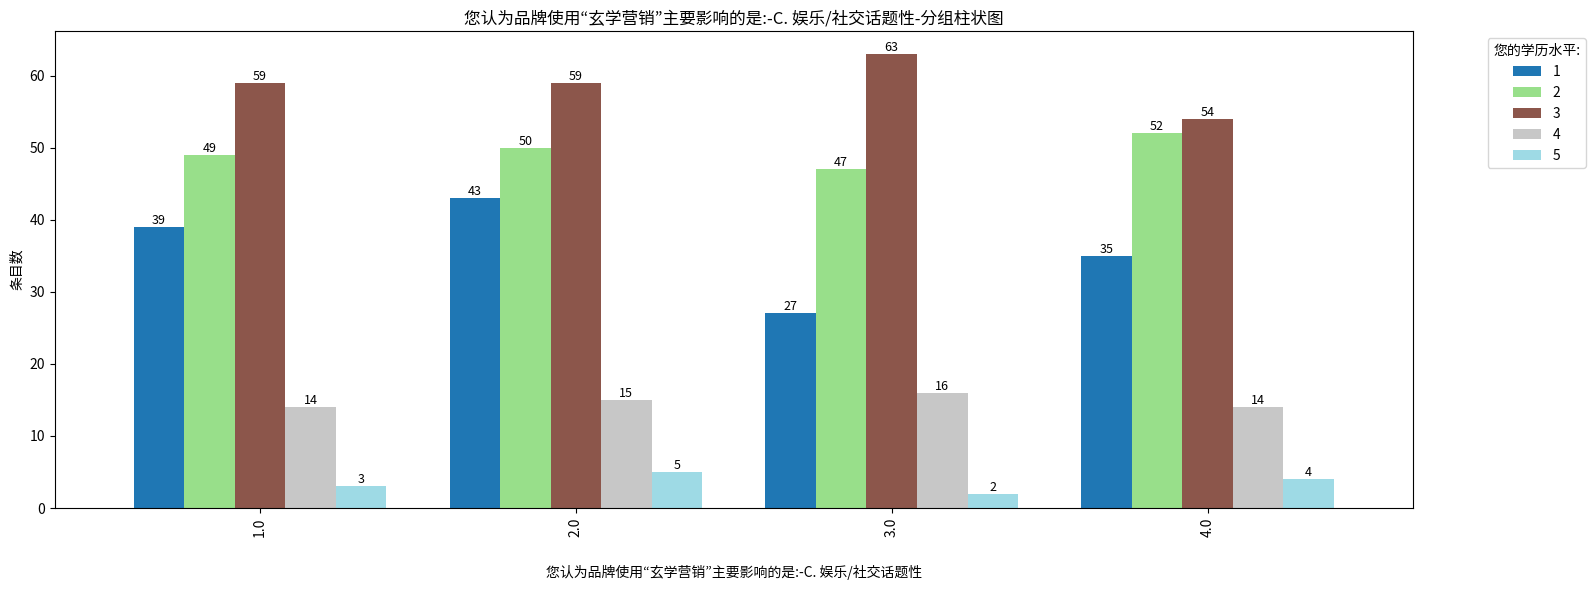

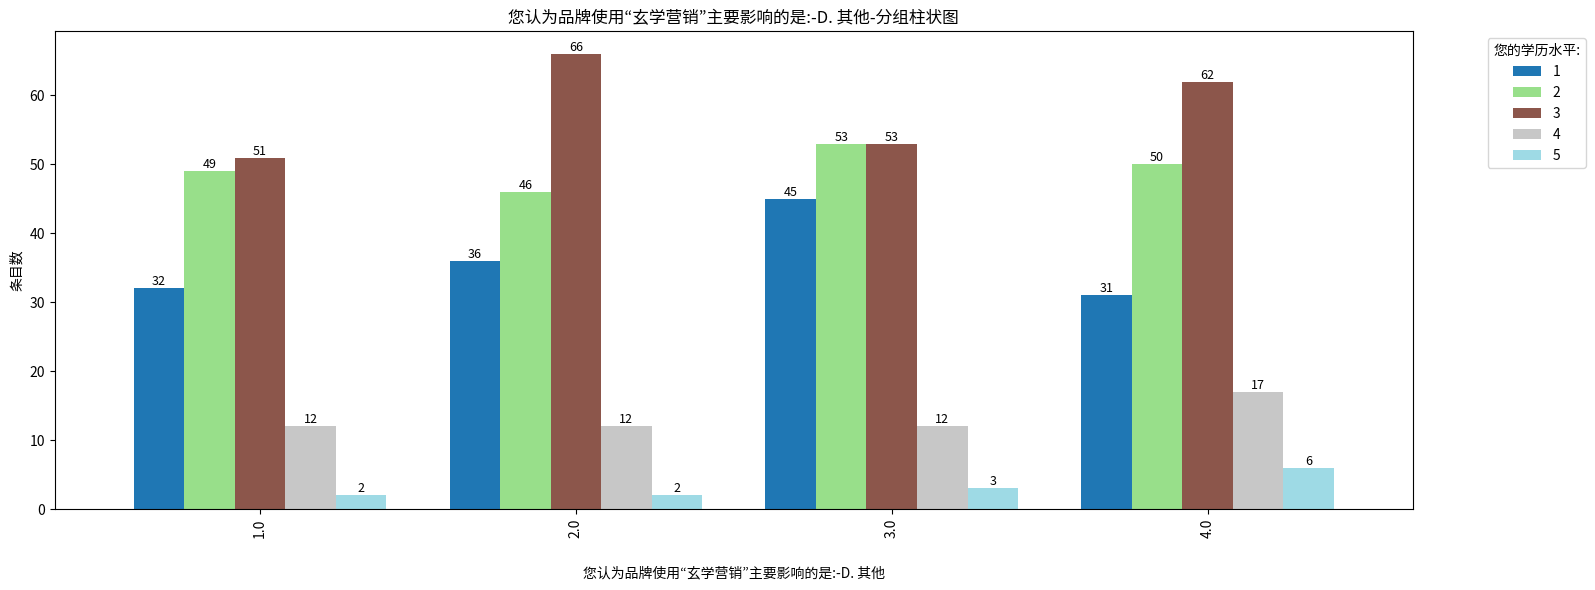

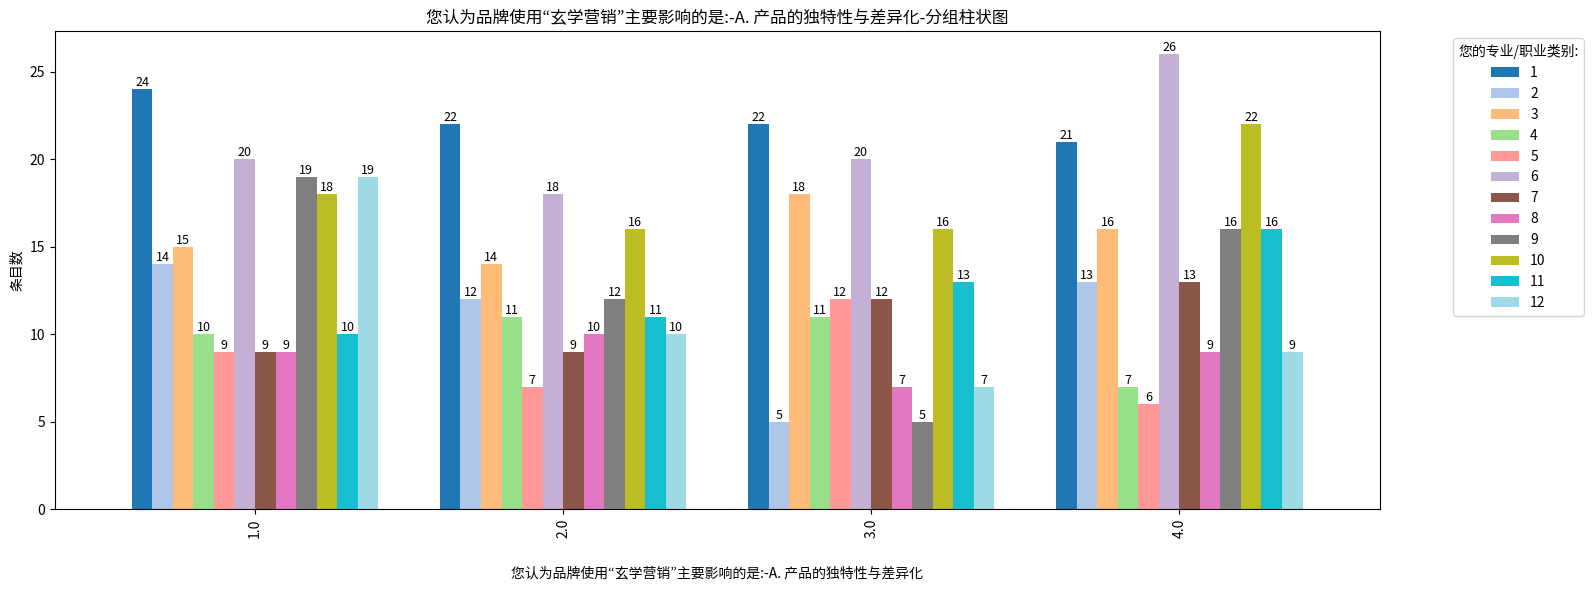

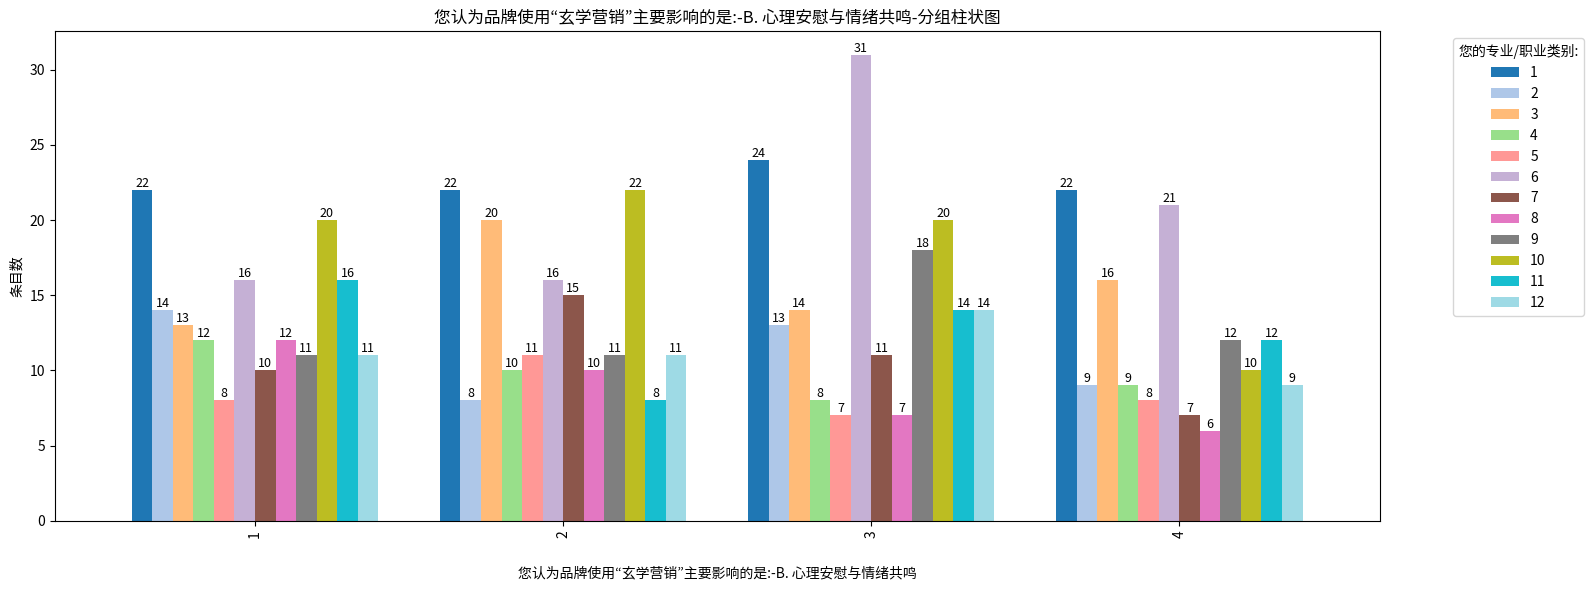

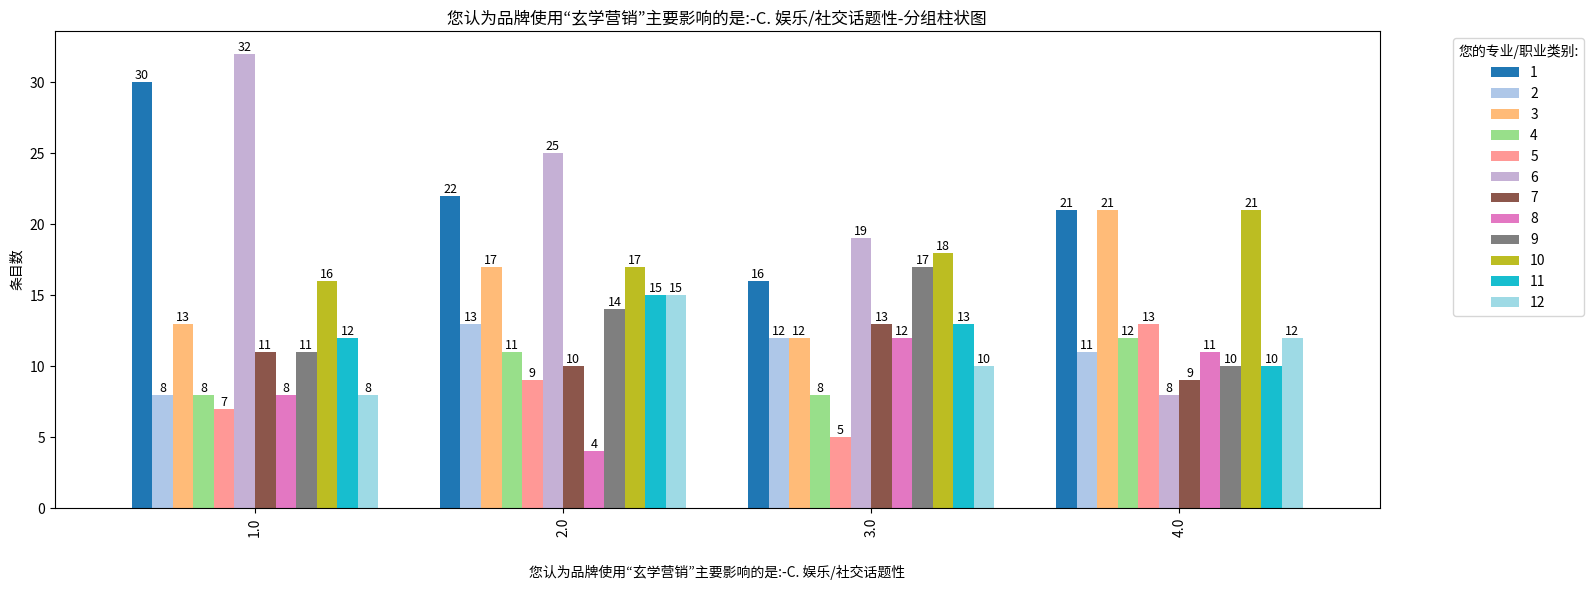

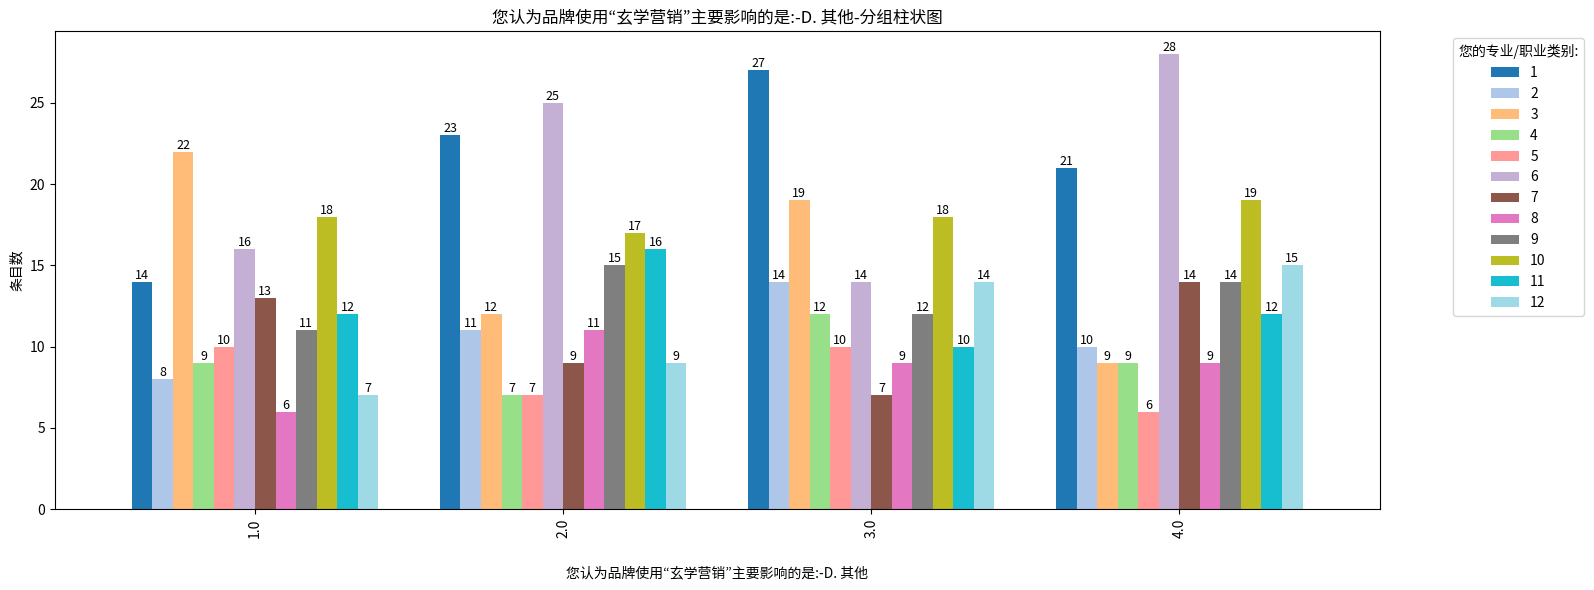

In [181]:
for name, effects in sort_effects.items():
    for cause, effect in product(causes, effects):
        index_axis = df.columns[effect]
        column_axis = cause
        effect_name = idx_to_label(effect)
        plot_stacked_histogram(
            df, index_axis, column_axis, f"{name}-{effect_name}", stacked=False
        )
        # break
    # break